#1. Load and Explore the Data

In [ ]:
pip install plotly[express]

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 16.5 MB/s eta 0:00:00


In [ ]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [ ]:
# load data
from google.colab import drive
drive.mount('/content/drive')

train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DL Data/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DL Data/test.csv')
bids = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DL Data/bids.csv')

Mounted at /content/drive


In [ ]:
# display the shape
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Bids shape:", bids.shape)

Train shape: (2013, 4)
Test shape: (4700, 3)
Bids shape: (7656334, 9)


In [ ]:
# visualize bids df
bids.head()

bid_id                              bidder_id auction merchandise  device  \
0       0  8dac2b259fd1c6d1120e519fb1ac14fbqvax8   ewmzr     jewelry  phone0   
1       1  668d393e858e8126275433046bbd35c6tywop   aeqok   furniture  phone1   
2       2  aa5f360084278b35d746fa6af3a7a1a5ra3xe   wa00e  home goods  phone2   
3       3  3939ac3ef7d472a59a9c5f893dd3e39fh9ofi   jefix     jewelry  phone4   
4       4  8393c48eaf4b8fa96886edc7cf27b372dsibi   jefix     jewelry  phone5   

               time country              ip              url  
0  9759243157894736      us   69.166.231.58  vasstdc27m7nks3  
1  9759243157894736      in   50.201.125.84  jmqlhflrzwuay9c  
2  9759243157894736      py  112.54.208.157  vasstdc27m7nks3  
3  9759243157894736      in   18.99.175.133  vasstdc27m7nks3  
4  9759243157894736      in    145.138.5.37  vasstdc27m7nks3

In [ ]:
# visualize train df
train.head()

bidder_id  \
0  91a3c57b13234af24875c56fb7e2b2f4rb56a   
1  624f258b49e77713fc34034560f93fb3hu3jo   
2  1c5f4fc669099bfbfac515cd26997bd12ruaj   
3  4bee9aba2abda51bf43d639013d6efe12iycd   
4  4ab12bc61c82ddd9c2d65e60555808acqgos1   

                         payment_account  \
0  a3d2de7675556553a5f08e4c88d2c228754av   
1  a3d2de7675556553a5f08e4c88d2c228v1sga   
2  a3d2de7675556553a5f08e4c88d2c2280cybl   
3  51d80e233f7b6a7dfdee484a3c120f3b2ita8   
4  a3d2de7675556553a5f08e4c88d2c22857ddh   

                                 address  outcome  
0  a3d2de7675556553a5f08e4c88d2c228vt0u4      0.0  
1  ae87054e5a97a8f840a3991d12611fdcrfbq3      0.0  
2  92520288b50f03907041887884ba49c0cl0pd      0.0  
3  4cb9717c8ad7e88a9a284989dd79b98dbevyi      0.0  
4  2a96c3ce94b3be921e0296097b88b56a7x1ji      0.0

In [ ]:
# check number of unique bidders in bids df
print("Bids unique bidders:" , bids['bidder_id'].nunique())

# check number of unique bidders in train df
print("Train unique bidders:" , train['bidder_id'].nunique())

Bids unique bidders: 6614
Train unique bidders: 2013


Insight:
- All of the rows in train df are unique bidders

#2. Data Cleaning

In [ ]:
# check the missing values in bids
bids.info(show_counts=True)
bids.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656334 entries, 0 to 7656333
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   bid_id       7656334 non-null  int64 
 1   bidder_id    7656334 non-null  object
 2   auction      7656334 non-null  object
 3   merchandise  7656334 non-null  object
 4   device       7656334 non-null  object
 5   time         7656334 non-null  int64 
 6   country      7647475 non-null  object
 7   ip           7656334 non-null  object
 8   url          7656334 non-null  object
dtypes: int64(2), object(7)
memory usage: 525.7+ MB


bid_id            0
bidder_id         0
auction           0
merchandise       0
device            0
time              0
country        8859
ip                0
url               0
dtype: int64

- There are 8,859 missing values in the **country** column. We will plot a graph to visualize the distribution of bids and assess whether these rows with null country values represent a significant portion of the overall bid data.

In [ ]:
# replace null country rows with unknown
tempbids = bids[['country','bidder_id']]
tempbids = tempbids.fillna('Unknown')

tempbids = tempbids.groupby('country')['bidder_id'].count().reset_index(name='bidder_count')

tempbids.sort_values(by='bidder_count', ascending=False)

country  bidder_count
85       in       1788731
133      ng        586586
82       id        453611
180      tr        319574
187      us        318103
..      ...           ...
7        an             2
71       gp             2
67       gi             2
115      mh             1
172      tc             1

[200 rows x 2 columns]

- India (in) has the highest number of bids, followed by Nigeria (ng) and Indonesia (id).
- The Turks and Caicos Islands (tc) recorded the fewest bids, with only a single entry.

In [ ]:
# Distribution of bids across countries
fig = px.bar(tempbids, x="country", y='bidder_count',title="Distribution of Bids across Country")

fig.update_yaxes(title_text="Bidder ID Count")
fig.update_xaxes(title_text="Country Code")
fig.show()

- We could see that the "Unknown" country rows form an insignificant proportion of the total bid population. As such, we will drop them.

In [ ]:
# drop the bid rows with missing country
bids = bids.dropna()

In [ ]:
bids.shape

(7647475, 9)

<h3> Merge datasets to explore completeness

In [ ]:
# merge train and bids
auction_df = pd.merge(train, bids, on='bidder_id', how='left')
auction_df

bidder_id  \
0        91a3c57b13234af24875c56fb7e2b2f4rb56a   
1        91a3c57b13234af24875c56fb7e2b2f4rb56a   
2        91a3c57b13234af24875c56fb7e2b2f4rb56a   
3        91a3c57b13234af24875c56fb7e2b2f4rb56a   
4        91a3c57b13234af24875c56fb7e2b2f4rb56a   
...                                        ...   
3068548  c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl   
3068549  c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl   
3068550  0381a69b7a061e9ace2798fd48f1f537mgq57   
3068551  84a769adc98498f52debfe57b93a0789556f4   
3068552  84a769adc98498f52debfe57b93a0789556f4   

                               payment_account  \
0        a3d2de7675556553a5f08e4c88d2c228754av   
1        a3d2de7675556553a5f08e4c88d2c228754av   
2        a3d2de7675556553a5f08e4c88d2c228754av   
3        a3d2de7675556553a5f08e4c88d2c228754av   
4        a3d2de7675556553a5f08e4c88d2c228754av   
...                                        ...   
3068548  a3d2de7675556553a5f08e4c88d2c22856leq   
3068549  a3d2de7675556553a5f08e4c88d2c22856leq   
3068550  fd87037ce0304077079c749f420f0b4c54uo0   
3068551  fbe0ce34d6546ebd9e4c63afc68b085byd2tf   
3068552  fbe0ce34d6546ebd9e4c63afc68b085byd2tf   

                                       address  outcome     bid_id auction  \
0        a3d2de7675556553a5f08e4c88d2c228vt0u4      0.0    85371.0   yitr4   
1        a3d2de7675556553a5f08e4c88d2c228vt0u4      0.0   274487.0   btpyy   
2        a3d2de7675556553a5f08e4c88d2c228vt0u4      0.0   527436.0   kj2ko   
3        a3d2de7675556553a5f08e4c88d2c228vt0u4      0.0   554135.0   1m5t8   
4        a3d2de7675556553a5f08e4c88d2c228vt0u4      0.0   607628.0   btpyy   
...                                        ...      ...        ...     ...   
3068548  d02c2b288b8aabd79ff47118aff41a2dqwzwc      0.0   609792.0   jefix   
3068549  d02c2b288b8aabd79ff47118aff41a2dqwzwc      0.0  2297899.0   jefix   
3068550  f030a221726fbcdfc4dc7dfd1b381a112hieq      0.0  3400601.0   jqx39   
3068551  a3d2de7675556553a5f08e4c88d2c228fib6p      0.0  2007255.0   ntjde   
3068552  a3d2de7675556553a5f08e4c88d2c228fib6p      0.0  2007533.0   ntjde   

              merchandise     device          time country               ip  \
0              home goods    phone35  9.759489e+15      ke    82.34.177.248   
1              home goods  phone1004  9.760249e+15      zm   202.130.71.167   
2              home goods     phone4  9.762261e+15      ke     22.54.76.225   
3              home goods     phone4  9.762431e+15      ke    32.13.237.126   
4              home goods     phone4  9.762789e+15      ke  202.236.188.240   
...                   ...        ...           ...     ...              ...   
3068548            mobile   phone316  9.762802e+15      id       28.18.7.49   
3068549            mobile    phone33  9.772601e+15      id  161.237.171.157   
3068550  office equipment    phone11  9.636754e+15      sa     54.212.21.87   
3068551           jewelry    phone59  9.770756e+15      ru       79.72.96.0   
3068552           jewelry    phone59  9.770758e+15      ru       79.72.96.0   

                     url  
0        vasstdc27m7nks3  
1        vasstdc27m7nks3  
2        vasstdc27m7nks3  
3        vasstdc27m7nks3  
4        vasstdc27m7nks3  
...                  ...  
3068548  ar89au37swuzvzz  
3068549  ar89au37swuzvzz  
3068550  cgb17jpn1ixq9hw  
3068551  9ov8hm82p20sxlz  
3068552  9ov8hm82p20sxlz  

[3068553 rows x 12 columns]

In [ ]:
# merge bids and test dataset
auction_test_df = pd.merge(test, bids, on='bidder_id', how='left')
auction_test_df

bidder_id  \
0        49bb5a3c944b8fc337981cc7a9ccae41u31d7   
1        49bb5a3c944b8fc337981cc7a9ccae41u31d7   
2        49bb5a3c944b8fc337981cc7a9ccae41u31d7   
3        49bb5a3c944b8fc337981cc7a9ccae41u31d7   
4        a921612b85a1494456e74c09393ccb65ylp4y   
...                                        ...   
4579021  7ade70030d559a6c255be2f6feca17acnrqs0   
4579022  7ade70030d559a6c255be2f6feca17acnrqs0   
4579023  7ade70030d559a6c255be2f6feca17acnrqs0   
4579024  7ade70030d559a6c255be2f6feca17acnrqs0   
4579025  7ade70030d559a6c255be2f6feca17acnrqs0   

                               payment_account  \
0        a3d2de7675556553a5f08e4c88d2c228htx90   
1        a3d2de7675556553a5f08e4c88d2c228htx90   
2        a3d2de7675556553a5f08e4c88d2c228htx90   
3        a3d2de7675556553a5f08e4c88d2c228htx90   
4        a3d2de7675556553a5f08e4c88d2c228rs17i   
...                                        ...   
4579021  a3d2de7675556553a5f08e4c88d2c228vo1hu   
4579022  a3d2de7675556553a5f08e4c88d2c228vo1hu   
4579023  a3d2de7675556553a5f08e4c88d2c228vo1hu   
4579024  a3d2de7675556553a5f08e4c88d2c228vo1hu   
4579025  a3d2de7675556553a5f08e4c88d2c228vo1hu   

                                       address     bid_id auction  \
0        5d9fa1b71f992e7c7a106ce4b07a0a754le7c  2714053.0   cl3cf   
1        5d9fa1b71f992e7c7a106ce4b07a0a754le7c  3785632.0   edggv   
2        5d9fa1b71f992e7c7a106ce4b07a0a754le7c  5788255.0   jqx39   
3        5d9fa1b71f992e7c7a106ce4b07a0a754le7c  6575051.0   jqx39   
4        a3d2de7675556553a5f08e4c88d2c228klidn  2536026.0   h2nr3   
...                                        ...        ...     ...   
4579021  a3d2de7675556553a5f08e4c88d2c228la8g8  7554183.0   18nth   
4579022  a3d2de7675556553a5f08e4c88d2c228la8g8  7579114.0   y3n7r   
4579023  a3d2de7675556553a5f08e4c88d2c228la8g8  7615313.0   32zny   
4579024  a3d2de7675556553a5f08e4c88d2c228la8g8  7618354.0   eajp3   
4579025  a3d2de7675556553a5f08e4c88d2c228la8g8  7619423.0   zlizu   

            merchandise     device          time country               ip  \
0            home goods   phone169  9.633127e+15      us   128.59.117.159   
1            home goods    phone65  9.638908e+15      cn   254.171.78.220   
2            home goods    phone65  9.698805e+15      in    102.115.72.52   
3            home goods    phone65  9.703350e+15      cn   210.90.145.131   
4        sporting goods   phone640  9.632413e+15      az    85.169.46.232   
...                 ...        ...           ...     ...              ...   
4579021          mobile  phone1456  9.708746e+15      in   132.96.164.171   
4579022          mobile   phone137  9.708869e+15      in    60.93.199.247   
4579023          mobile    phone16  9.709033e+15      in    89.10.179.164   
4579024          mobile    phone63  9.709047e+15      in   172.36.189.252   
4579025          mobile     phone4  9.709052e+15      in  110.184.192.251   

                     url  
0        8ohccaw6fhyc1gy  
1        vasstdc27m7nks3  
2        jezzg7twk0rqfuw  
3        vasstdc27m7nks3  
4        vasstdc27m7nks3  
...                  ...  
4579021  38jckvkm2td025a  
4579022  sdtsw48a54xxwiz  
4579023  0xjc9519d7y0zbt  
4579024  sdtsw48a54xxwiz  
4579025  vasstdc27m7nks3  

[4579026 rows x 11 columns]

In [ ]:
print("Merged train and bids dataset")
print("-----------------------------")

# number of unique bidders
print("unique bidders:" , auction_df['bidder_id'].nunique())

# number of unique bids
print("unique bids:" , auction_df['bid_id'].nunique())

# number of unique auctions
print("unique auctions:" , auction_df['auction'].nunique())

Merged train and bids dataset
-----------------------------
unique bidders: 2013
unique bids: 3068523
unique auctions: 12740


In [ ]:
# check data type
auction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3068553 entries, 0 to 3068552
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   bidder_id        object 
 1   payment_account  object 
 2   address          object 
 3   outcome          float64
 4   bid_id           float64
 5   auction          object 
 6   merchandise      object 
 7   device           object 
 8   time             float64
 9   country          object 
 10  ip               object 
 11  url              object 
dtypes: float64(3), object(9)
memory usage: 280.9+ MB


In [ ]:
# check for missing data
auction_df.isnull().sum().sort_values()

bidder_id           0
payment_account     0
address             0
outcome             0
bid_id             30
auction            30
merchandise        30
device             30
time               30
country            30
ip                 30
url                30
dtype: int64

- 30 bidder ids from train.csv are absent in bids.csv

In [ ]:
# check for missing data
auction_test_df.isnull().sum().sort_values()

bidder_id           0
payment_account     0
address             0
bid_id             74
auction            74
merchandise        74
device             74
time               74
country            74
ip                 74
url                74
dtype: int64

- 74 bidder ids from test.csv are absent in bids.csv

In [ ]:
# check for outcome of each missing bid_id
no_bids = auction_df[pd.isnull(auction_df['bid_id'])]['bidder_id'].unique()
auction_df[auction_df['bidder_id'].isin(no_bids)]['outcome']

17556      0.0
42347      0.0
129170     0.0
214545     0.0
221396     0.0
226052     0.0
254576     0.0
304556     0.0
332754     0.0
408851     0.0
576705     0.0
653556     0.0
656215     0.0
787145     0.0
789876     0.0
793882     0.0
809323     0.0
882251     0.0
1017481    0.0
1018332    0.0
1020082    0.0
1121622    0.0
1138519    0.0
1215956    0.0
1463694    0.0
1480392    0.0
1645902    0.0
1972390    0.0
2136570    0.0
2996814    0.0
Name: outcome, dtype: float64

- All 30 bidders are labeled as humans. Since our focus is on detecting bots, we can exclude these entries from the analysis.

In [ ]:
# drop bidders with no bids from train
auction_df = auction_df[auction_df['bidder_id'].isin(bids['bidder_id'])]
auction_df

bidder_id  \
0        91a3c57b13234af24875c56fb7e2b2f4rb56a   
1        91a3c57b13234af24875c56fb7e2b2f4rb56a   
2        91a3c57b13234af24875c56fb7e2b2f4rb56a   
3        91a3c57b13234af24875c56fb7e2b2f4rb56a   
4        91a3c57b13234af24875c56fb7e2b2f4rb56a   
...                                        ...   
3068548  c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl   
3068549  c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl   
3068550  0381a69b7a061e9ace2798fd48f1f537mgq57   
3068551  84a769adc98498f52debfe57b93a0789556f4   
3068552  84a769adc98498f52debfe57b93a0789556f4   

                               payment_account  \
0        a3d2de7675556553a5f08e4c88d2c228754av   
1        a3d2de7675556553a5f08e4c88d2c228754av   
2        a3d2de7675556553a5f08e4c88d2c228754av   
3        a3d2de7675556553a5f08e4c88d2c228754av   
4        a3d2de7675556553a5f08e4c88d2c228754av   
...                                        ...   
3068548  a3d2de7675556553a5f08e4c88d2c22856leq   
3068549  a3d2de7675556553a5f08e4c88d2c22856leq   
3068550  fd87037ce0304077079c749f420f0b4c54uo0   
3068551  fbe0ce34d6546ebd9e4c63afc68b085byd2tf   
3068552  fbe0ce34d6546ebd9e4c63afc68b085byd2tf   

                                       address  outcome     bid_id auction  \
0        a3d2de7675556553a5f08e4c88d2c228vt0u4      0.0    85371.0   yitr4   
1        a3d2de7675556553a5f08e4c88d2c228vt0u4      0.0   274487.0   btpyy   
2        a3d2de7675556553a5f08e4c88d2c228vt0u4      0.0   527436.0   kj2ko   
3        a3d2de7675556553a5f08e4c88d2c228vt0u4      0.0   554135.0   1m5t8   
4        a3d2de7675556553a5f08e4c88d2c228vt0u4      0.0   607628.0   btpyy   
...                                        ...      ...        ...     ...   
3068548  d02c2b288b8aabd79ff47118aff41a2dqwzwc      0.0   609792.0   jefix   
3068549  d02c2b288b8aabd79ff47118aff41a2dqwzwc      0.0  2297899.0   jefix   
3068550  f030a221726fbcdfc4dc7dfd1b381a112hieq      0.0  3400601.0   jqx39   
3068551  a3d2de7675556553a5f08e4c88d2c228fib6p      0.0  2007255.0   ntjde   
3068552  a3d2de7675556553a5f08e4c88d2c228fib6p      0.0  2007533.0   ntjde   

              merchandise     device          time country               ip  \
0              home goods    phone35  9.759489e+15      ke    82.34.177.248   
1              home goods  phone1004  9.760249e+15      zm   202.130.71.167   
2              home goods     phone4  9.762261e+15      ke     22.54.76.225   
3              home goods     phone4  9.762431e+15      ke    32.13.237.126   
4              home goods     phone4  9.762789e+15      ke  202.236.188.240   
...                   ...        ...           ...     ...              ...   
3068548            mobile   phone316  9.762802e+15      id       28.18.7.49   
3068549            mobile    phone33  9.772601e+15      id  161.237.171.157   
3068550  office equipment    phone11  9.636754e+15      sa     54.212.21.87   
3068551           jewelry    phone59  9.770756e+15      ru       79.72.96.0   
3068552           jewelry    phone59  9.770758e+15      ru       79.72.96.0   

                     url  
0        vasstdc27m7nks3  
1        vasstdc27m7nks3  
2        vasstdc27m7nks3  
3        vasstdc27m7nks3  
4        vasstdc27m7nks3  
...                  ...  
3068548  ar89au37swuzvzz  
3068549  ar89au37swuzvzz  
3068550  cgb17jpn1ixq9hw  
3068551  9ov8hm82p20sxlz  
3068552  9ov8hm82p20sxlz  

[3068523 rows x 12 columns]

In [ ]:
# check for missing data
auction_df.isnull().sum().sort_values()

bidder_id          0
payment_account    0
address            0
outcome            0
bid_id             0
auction            0
merchandise        0
device             0
time               0
country            0
ip                 0
url                0
dtype: int64

In [ ]:
# check for missing data
auction_test_df.isnull().sum().sort_values()

bidder_id           0
payment_account     0
address             0
bid_id             74
auction            74
merchandise        74
device             74
time               74
country            74
ip                 74
url                74
dtype: int64

In [ ]:
# Fill missing data for numeric columns with a default value of 0
auction_test_df['bid_id'] = auction_test_df['bid_id'].fillna(0)
auction_test_df['time'] = auction_test_df['time'].fillna(0)

# Fill missing data for categorical columns with a default value of 'Unknown' or an empty string
auction_test_df['auction'] = auction_test_df['auction'].fillna('Unknown')
auction_test_df['merchandise'] = auction_test_df['merchandise'].fillna('Unknown')
auction_test_df['device'] = auction_test_df['device'].fillna('Unknown')
auction_test_df['country'] = auction_test_df['country'].fillna('Unknown')
auction_test_df['ip'] = auction_test_df['ip'].fillna('Unknown')
auction_test_df['url'] = auction_test_df['url'].fillna('Unknown')
auction_test_df['address'] = auction_test_df['address'].fillna('Unknown')

# For 'payment_account' column, let's fill missing data with an empty string
auction_test_df['payment_account'] = auction_test_df['payment_account'].fillna('')

# Display the updated dataframe to confirm
print(auction_test_df.isnull().sum())

bidder_id          0
payment_account    0
address            0
bid_id             0
auction            0
merchandise        0
device             0
time               0
country            0
ip                 0
url                0
dtype: int64


In [ ]:
# check for duplicates
auction_df.duplicated().sum()

np.int64(0)

In [ ]:
# reorganize columns order for readibility
auction_df = auction_df[['bid_id', 'auction',
                         'merchandise', 'device', 'time',
                         'country', 'ip', 'url',
                         'bidder_id', 'payment_account',
                         'address', 'outcome']]

auction_df

bid_id auction       merchandise     device          time country  \
0          85371.0   yitr4        home goods    phone35  9.759489e+15      ke   
1         274487.0   btpyy        home goods  phone1004  9.760249e+15      zm   
2         527436.0   kj2ko        home goods     phone4  9.762261e+15      ke   
3         554135.0   1m5t8        home goods     phone4  9.762431e+15      ke   
4         607628.0   btpyy        home goods     phone4  9.762789e+15      ke   
...            ...     ...               ...        ...           ...     ...   
3068548   609792.0   jefix            mobile   phone316  9.762802e+15      id   
3068549  2297899.0   jefix            mobile    phone33  9.772601e+15      id   
3068550  3400601.0   jqx39  office equipment    phone11  9.636754e+15      sa   
3068551  2007255.0   ntjde           jewelry    phone59  9.770756e+15      ru   
3068552  2007533.0   ntjde           jewelry    phone59  9.770758e+15      ru   

                      ip              url  \
0          82.34.177.248  vasstdc27m7nks3   
1         202.130.71.167  vasstdc27m7nks3   
2           22.54.76.225  vasstdc27m7nks3   
3          32.13.237.126  vasstdc27m7nks3   
4        202.236.188.240  vasstdc27m7nks3   
...                  ...              ...   
3068548       28.18.7.49  ar89au37swuzvzz   
3068549  161.237.171.157  ar89au37swuzvzz   
3068550     54.212.21.87  cgb17jpn1ixq9hw   
3068551       79.72.96.0  9ov8hm82p20sxlz   
3068552       79.72.96.0  9ov8hm82p20sxlz   

                                     bidder_id  \
0        91a3c57b13234af24875c56fb7e2b2f4rb56a   
1        91a3c57b13234af24875c56fb7e2b2f4rb56a   
2        91a3c57b13234af24875c56fb7e2b2f4rb56a   
3        91a3c57b13234af24875c56fb7e2b2f4rb56a   
4        91a3c57b13234af24875c56fb7e2b2f4rb56a   
...                                        ...   
3068548  c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl   
3068549  c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl   
3068550  0381a69b7a061e9ace2798fd48f1f537mgq57   
3068551  84a769adc98498f52debfe57b93a0789556f4   
3068552  84a769adc98498f52debfe57b93a0789556f4   

                               payment_account  \
0        a3d2de7675556553a5f08e4c88d2c228754av   
1        a3d2de7675556553a5f08e4c88d2c228754av   
2        a3d2de7675556553a5f08e4c88d2c228754av   
3        a3d2de7675556553a5f08e4c88d2c228754av   
4        a3d2de7675556553a5f08e4c88d2c228754av   
...                                        ...   
3068548  a3d2de7675556553a5f08e4c88d2c22856leq   
3068549  a3d2de7675556553a5f08e4c88d2c22856leq   
3068550  fd87037ce0304077079c749f420f0b4c54uo0   
3068551  fbe0ce34d6546ebd9e4c63afc68b085byd2tf   
3068552  fbe0ce34d6546ebd9e4c63afc68b085byd2tf   

                                       address  outcome  
0        a3d2de7675556553a5f08e4c88d2c228vt0u4      0.0  
1        a3d2de7675556553a5f08e4c88d2c228vt0u4      0.0  
2        a3d2de7675556553a5f08e4c88d2c228vt0u4      0.0  
3        a3d2de7675556553a5f08e4c88d2c228vt0u4      0.0  
4        a3d2de7675556553a5f08e4c88d2c228vt0u4      0.0  
...                                        ...      ...  
3068548  d02c2b288b8aabd79ff47118aff41a2dqwzwc      0.0  
3068549  d02c2b288b8aabd79ff47118aff41a2dqwzwc      0.0  
3068550  f030a221726fbcdfc4dc7dfd1b381a112hieq      0.0  
3068551  a3d2de7675556553a5f08e4c88d2c228fib6p      0.0  
3068552  a3d2de7675556553a5f08e4c88d2c228fib6p      0.0  

[3068523 rows x 12 columns]

In [ ]:
# reorganize columns order for readibility
auction_test_df = auction_test_df[['bid_id', 'auction',
                         'merchandise', 'device', 'time',
                         'country', 'ip', 'url',
                         'bidder_id', 'payment_account',
                         'address']]

auction_test_df

bid_id auction     merchandise     device          time country  \
0        2714053.0   cl3cf      home goods   phone169  9.633127e+15      us   
1        3785632.0   edggv      home goods    phone65  9.638908e+15      cn   
2        5788255.0   jqx39      home goods    phone65  9.698805e+15      in   
3        6575051.0   jqx39      home goods    phone65  9.703350e+15      cn   
4        2536026.0   h2nr3  sporting goods   phone640  9.632413e+15      az   
...            ...     ...             ...        ...           ...     ...   
4579021  7554183.0   18nth          mobile  phone1456  9.708746e+15      in   
4579022  7579114.0   y3n7r          mobile   phone137  9.708869e+15      in   
4579023  7615313.0   32zny          mobile    phone16  9.709033e+15      in   
4579024  7618354.0   eajp3          mobile    phone63  9.709047e+15      in   
4579025  7619423.0   zlizu          mobile     phone4  9.709052e+15      in   

                      ip              url  \
0         128.59.117.159  8ohccaw6fhyc1gy   
1         254.171.78.220  vasstdc27m7nks3   
2          102.115.72.52  jezzg7twk0rqfuw   
3         210.90.145.131  vasstdc27m7nks3   
4          85.169.46.232  vasstdc27m7nks3   
...                  ...              ...   
4579021   132.96.164.171  38jckvkm2td025a   
4579022    60.93.199.247  sdtsw48a54xxwiz   
4579023    89.10.179.164  0xjc9519d7y0zbt   
4579024   172.36.189.252  sdtsw48a54xxwiz   
4579025  110.184.192.251  vasstdc27m7nks3   

                                     bidder_id  \
0        49bb5a3c944b8fc337981cc7a9ccae41u31d7   
1        49bb5a3c944b8fc337981cc7a9ccae41u31d7   
2        49bb5a3c944b8fc337981cc7a9ccae41u31d7   
3        49bb5a3c944b8fc337981cc7a9ccae41u31d7   
4        a921612b85a1494456e74c09393ccb65ylp4y   
...                                        ...   
4579021  7ade70030d559a6c255be2f6feca17acnrqs0   
4579022  7ade70030d559a6c255be2f6feca17acnrqs0   
4579023  7ade70030d559a6c255be2f6feca17acnrqs0   
4579024  7ade70030d559a6c255be2f6feca17acnrqs0   
4579025  7ade70030d559a6c255be2f6feca17acnrqs0   

                               payment_account  \
0        a3d2de7675556553a5f08e4c88d2c228htx90   
1        a3d2de7675556553a5f08e4c88d2c228htx90   
2        a3d2de7675556553a5f08e4c88d2c228htx90   
3        a3d2de7675556553a5f08e4c88d2c228htx90   
4        a3d2de7675556553a5f08e4c88d2c228rs17i   
...                                        ...   
4579021  a3d2de7675556553a5f08e4c88d2c228vo1hu   
4579022  a3d2de7675556553a5f08e4c88d2c228vo1hu   
4579023  a3d2de7675556553a5f08e4c88d2c228vo1hu   
4579024  a3d2de7675556553a5f08e4c88d2c228vo1hu   
4579025  a3d2de7675556553a5f08e4c88d2c228vo1hu   

                                       address  
0        5d9fa1b71f992e7c7a106ce4b07a0a754le7c  
1        5d9fa1b71f992e7c7a106ce4b07a0a754le7c  
2        5d9fa1b71f992e7c7a106ce4b07a0a754le7c  
3        5d9fa1b71f992e7c7a106ce4b07a0a754le7c  
4        a3d2de7675556553a5f08e4c88d2c228klidn  
...                                        ...  
4579021  a3d2de7675556553a5f08e4c88d2c228la8g8  
4579022  a3d2de7675556553a5f08e4c88d2c228la8g8  
4579023  a3d2de7675556553a5f08e4c88d2c228la8g8  
4579024  a3d2de7675556553a5f08e4c88d2c228la8g8  
4579025  a3d2de7675556553a5f08e4c88d2c228la8g8  

[4579026 rows x 11 columns]

#3. Exploratory Data Analysis

## Descriptive Statistics

In [ ]:
# Count unique values in key columns
stats = {
    'Total Bidders': auction_df['bidder_id'].nunique(),
    'Total Bids': auction_df['bid_id'].nunique(),
    'Total Devices': auction_df['device'].nunique(),
    'Total IPs': auction_df['ip'].nunique(),
    'Total URLs': auction_df['url'].nunique(),
    'Total Merchandise Categories': auction_df['merchandise'].nunique(),
    'Total Countries': auction_df['country'].nunique(),
    'Total Auctions': auction_df['auction'].nunique()
}

# Print summary
for key, value in stats.items():
    print(f"{key}: {value:,}")

Total Bidders: 1,983
Total Bids: 3,068,523
Total Devices: 5,726
Total IPs: 1,028,810
Total URLs: 663,265
Total Merchandise Categories: 10
Total Countries: 198
Total Auctions: 12,740


In [ ]:
# Filter rows where outcome is 0 (human)
human = auction_df[auction_df['outcome'] == 0.0]

# Count unique values among human bidders
print("Unique counts for human bidders")
print("-------------------------------")
print(human.nunique())

Unique counts for human bidders
-------------------------------
bid_id             2656370
auction              12231
merchandise             10
device                5151
time                720853
country                191
ip                  833432
url                 609454
bidder_id             1880
payment_account       1880
address               1880
outcome                  1
dtype: int64


In [ ]:
# Filter rows where outcome is 1 (robot)
robot = auction_df[auction_df['outcome'] == 1.0]

# Count unique values among robot bidders
print("Unique counts for robot bidders")
print("-------------------------------")
print(robot.nunique())

Unique counts for robot bidders
-------------------------------
bid_id             412153
auction              6390
merchandise             7
device               3072
time               313063
country               191
ip                 229986
url                 54834
bidder_id             103
payment_account       103
address               103
outcome                 1
dtype: int64


- auction_df after data cleaning: 1880 bidders classified as humans and 103 classified as robots.

## Proportion of Human vs Bot in training dataset

No. of bots in train data = 1910
No. of humans in train data = 103
Percentage of human bidders in train data: 94.88%
Percentage of robot bidders in train data: 5.12%


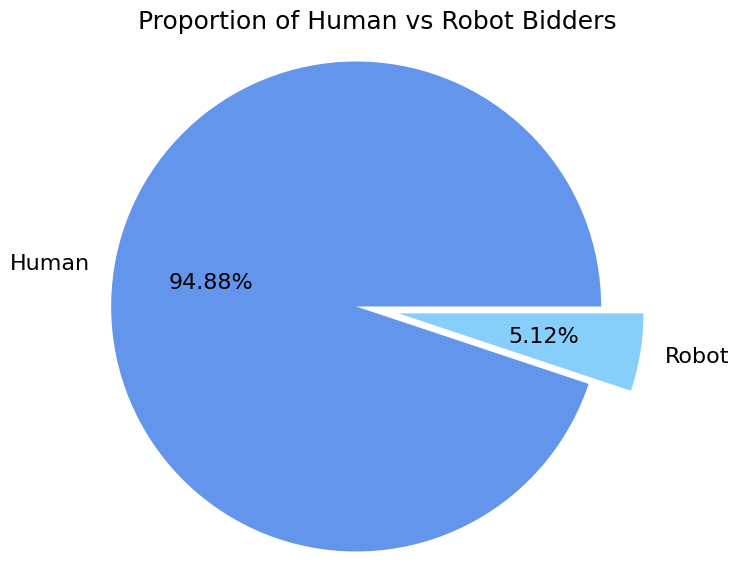

In [ ]:
# total
total_bidders = train['bidder_id'].nunique()

# Count bots and humans
human_bids = len(train[train['outcome'] == 0.0])
robot_bids = len(train[train['outcome'] == 1.0])

print(f"No. of bots in train data = {human_bids}")
print(f"No. of humans in train data = {robot_bids}")

human = human_bids/total_bidders
robot = robot_bids/total_bidders

# Percentage of human vs bot
print("Percentage of human bidders in train data: {:.2%}".format(human))
print("Percentage of robot bidders in train data: {:.2%}".format(robot))

# graph human vs. bot
_, ax = plt.subplots(figsize=(9, 7))

#add colors
colors = ['cornflowerblue', 'lightskyblue']

# pie chart parameters
pie_data = [human, robot]
pie_labels = ('Human', 'Robot')
pie_labels_explode_coefficients = (0, 0.175)

# Show the chart
ax.pie(pie_data, labels=pie_labels, autopct='%1.2f%%', colors=colors,
       shadow=False, explode=pie_labels_explode_coefficients,  textprops={'fontsize': 16})
ax.set_title("Proportion of Human vs Robot Bidders", fontsize=18)
plt.axis('equal')
plt.show()

- There is an **imbalance distribution** of class (bot to humans) in the training dataset.

## Studying the distribution of features per bidder

In [ ]:
# Group data by bidder_id
data_grouped_by_bidder = auction_df.groupby('bidder_id')

# Define the feature columns and display names
features = [
    ('bids', 'bid_id'),
    ('auctions', 'auction'),
    ('countries', 'country'),
    ('IPs', 'ip'),
    ('devices', 'device'),
    ('urls', 'url')
]

# Prepare a list to collect stats
summary_stats = []

# Loop through each feature and compute the stats
for name, column in features:
    unique_counts = data_grouped_by_bidder[column].nunique()
    stats_dict = {
        'Feature': name,
        'Mean': unique_counts.mean(),
        'Median': unique_counts.median(),
        'Mode': unique_counts.mode()[0] if not unique_counts.mode().empty else np.nan,
        'Max': unique_counts.max(),
        'Min': unique_counts.min()
    }
    summary_stats.append(stats_dict)

# Create DataFrame of all feature stats
stats_df = pd.DataFrame(summary_stats)
stats_df

Feature         Mean  Median  Mode     Max  Min
0       bids  1547.414523    18.0     1  515032    1
1   auctions    62.614725    10.0     1    1623    1
2  countries    13.307110     3.0     1     178    1
3        IPs   674.225920    12.0     1  111843    1
4    devices    78.565809     8.0     1    2618    1
5       urls   345.923853     5.0     1   81376    1

Insights:
1. Significant Skew and Presence of Outliers
- There is a large gap between the **mean** and **median** values for several features, indicating heavy skewness—particularly in:
  - Bids per user (mean: 1547, median: 18)
  - IPs per user (mean: 674, median: 12)
  - URLs per user (mean: 345, median: 5)

2. Mode Consistency
- The mode for all features is consistently 1, suggesting that many users interacted with only one unique value per feature.

3. Minimal Skew for Country Count
- Among all features, the number of countries per user shows the smallest gap between mean (13) and median (3), indicating a relatively more balanced distribution.



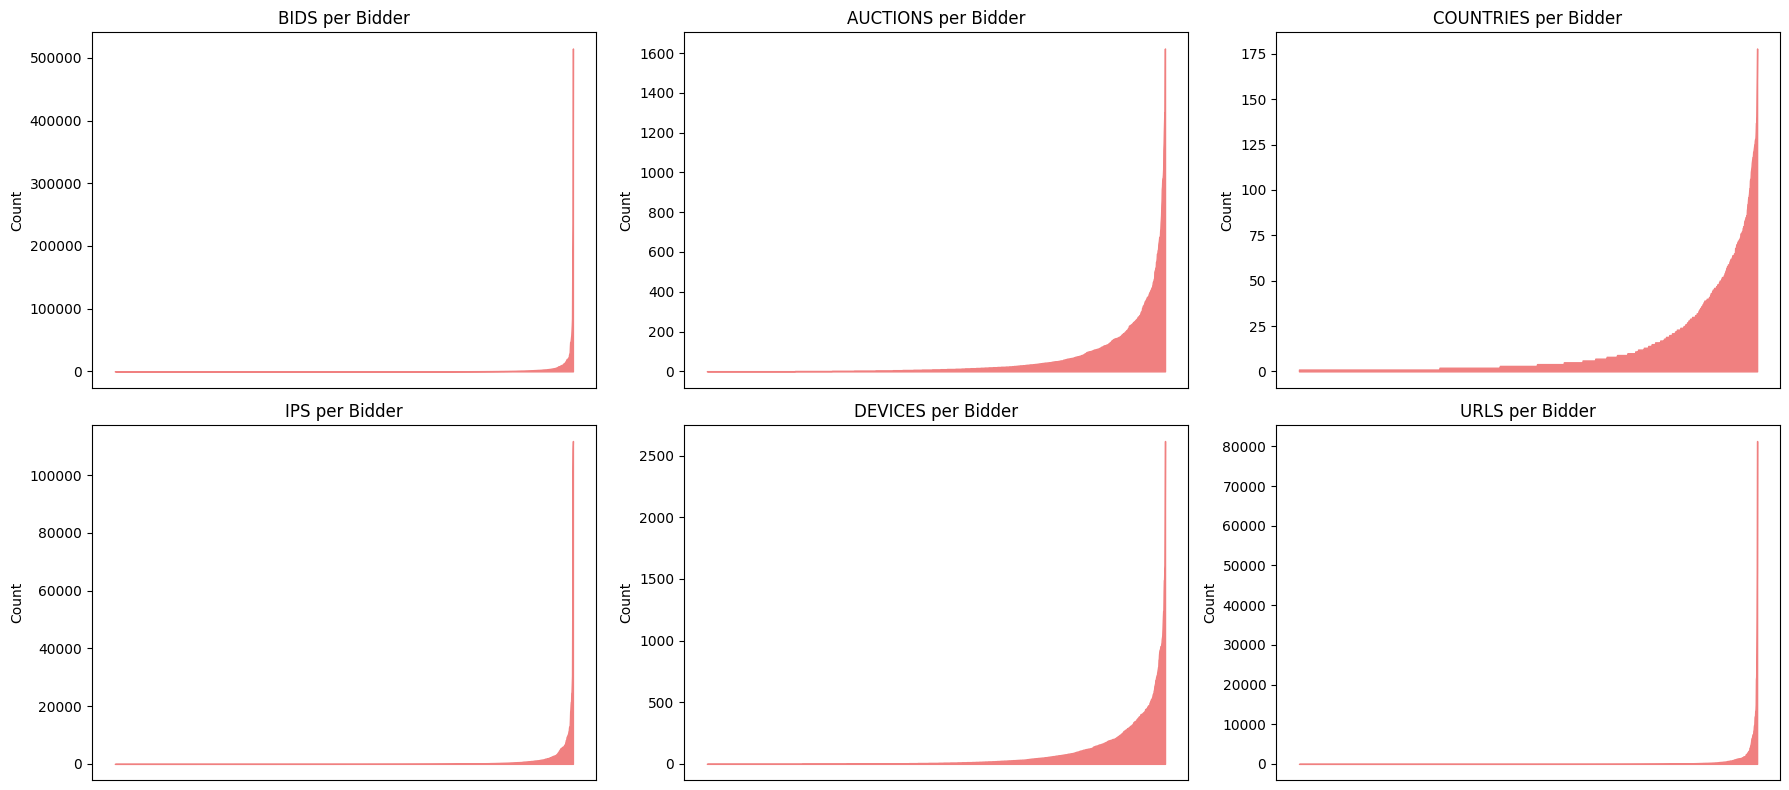

In [ ]:
# Prepare figure with 2 rows and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))
axes = axes.flatten()  # Flatten to easily iterate

# Loop through features and axes
for i, (feat, column) in enumerate(features):
    unique_counts = data_grouped_by_bidder[column].nunique().sort_values()

    # Plot on subplot
    axes[i].fill_between(range(len(unique_counts)), unique_counts, color='lightcoral')
    axes[i].set_title(f"{feat.upper()} per Bidder", fontsize=12)
    axes[i].set_ylabel("Count")
    axes[i].set_xticks([])

# Adjust layout
plt.tight_layout()
plt.show()

- Each graph represents a feature with bidder IDs on the x-axis (sorted in ascending order) and frequency counts on the y-axis. For the first feature, 'BIDS per Bidder', the chart shows that one or a few users submitted over 500,000 bids, while the vast majority of bidders placed only a few — typically just one — since every bidder in the dataset has made at least one bid.
- All six features show a highly right-skewed distribution, indicating that the vast majority of users have very low interaction counts, while a small number of users have extremely high values.

## Studying the distribution of robots versus humans

<h3> Merchandise
<h6>  


*   Number of Human and Robot bids per Merchandise






In [ ]:
# Display unique merchandise types
print("Unique merchandise types:", auction_df['merchandise'].unique())

Unique merchandise types: ['home goods' 'office equipment' 'sporting goods' 'books and music'
 'mobile' 'jewelry' 'computers' 'clothing' 'furniture' 'auto parts']


In [ ]:
merch_df = auction_df[['merchandise', 'outcome']]

# Create a pivot table to count number of outcomes per merchandise category
merch_human_bot = merch_df.pivot_table(
    index='merchandise',
    columns='outcome',
    values='outcome',
    aggfunc=lambda x: len(x),
    fill_value=0
)

# Visualize the counts with a heatmap-style table
merch_human_bot.style.background_gradient(cmap='Blues', axis=0)


Observations:
- Bots are highly active in specific merchandise categories such as sporting goods, mobile, jewelry, and home goods.
- Computers category shows more bot activity than human activity even though bot proportion is smaller.
- **Clothing**, **furniture**, and **auto parts** categories appear to be almost exclusively targeted by **human** users, robots did not bid on these merchandises (zero bid).
- Sporting goods are most favourite merchandise for both human and robot

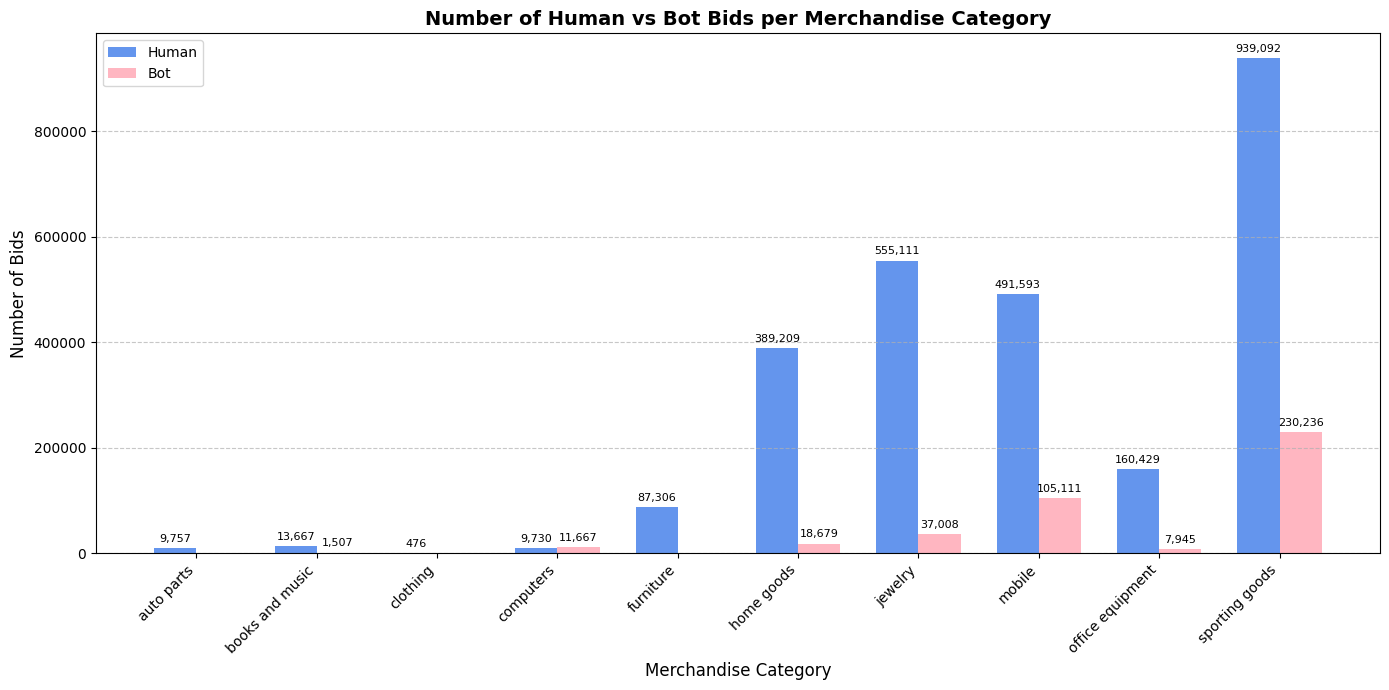

In [ ]:
# visualize human vs bot per merchandise
merch_human_bot.columns = ['Human', 'Bot']

# Data preparation
labels = merch_human_bot.index
human_counts = merch_human_bot['Human']
bot_counts = merch_human_bot['Bot']
x = np.arange(len(labels))
bar_width = 0.35

# Plot setup
fig, ax = plt.subplots(figsize=(14, 7))
bars1 = ax.bar(x - bar_width/2, human_counts, bar_width, label='Human', color='cornflowerblue')
bars2 = ax.bar(x + bar_width/2, bot_counts, bar_width, label='Bot', color='lightpink')

# Add value labels on top of bars
for bar in bars1:
    height = bar.get_height()
    if height > 0:
        ax.annotate(f'{height:,}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

for bar in bars2:
    height = bar.get_height()
    if height > 0:
        ax.annotate(f'{height:,}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

# Customize axis and layout
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_xlabel('Merchandise Category', fontsize=12)
ax.set_ylabel('Number of Bids', fontsize=12)
ax.set_title('Number of Human vs Bot Bids per Merchandise Category', fontsize=14, weight='bold')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<h3> Bids, Auction, Country, Device, IPs and URLs
<h6>

*   mean, standard deviation, min and max for humans vs robots for comparison



**<h4> Human Distribution**

In [ ]:
# Filter human users
humans = auction_df[auction_df['outcome'] == 0]

# Group by bidder_id
data_grouped_by_bidder = humans.groupby('bidder_id')

# Define features to analyze
features = [('bids', 'bid_id'), ('auctions', 'auction'), ('countries', 'country'),
            ('IPs', 'ip'), ('devices', 'device'), ('urls', 'url')]

# Dictionary to hold summary stats
feature_stats_humans = {}

# Calculate nunique per bidder for each feature
for name, column in features:
    unique_counts = data_grouped_by_bidder[column].nunique()
    feature_stats_humans[name] = unique_counts

# Create a DataFrame of all features
human_stats_df = pd.DataFrame(feature_stats_humans)

# Get statistical summary for all features
human_summary = human_stats_df.describe().T
human_summary

count         mean           std  min  25%   50%     75%       max
bids       1880.0  1412.962766  14600.063010  1.0  3.0  14.0  143.50  515032.0
auctions   1880.0    58.098936    142.966111  1.0  2.0   9.0   41.00    1623.0
countries  1880.0    12.594149     22.750742  1.0  1.0   3.0   10.25     163.0
IPs        1880.0   580.419681   4139.681862  1.0  2.0  11.0   88.00  109159.0
devices    1880.0    73.912234    184.527117  1.0  2.0   8.0   51.25    2618.0
urls       1880.0   335.056383   2735.899448  1.0  1.0   4.0   34.00   81376.0

**<h4> Robot Distribution**

In [ ]:
# Filter robot users
robots = auction_df[auction_df['outcome'] == 1]

# Group by bidder_id
data_grouped_by_bidder = robots.groupby('bidder_id')

# Define features to analyze
features = [('bids', 'bid_id'), ('auctions', 'auction'), ('countries', 'country'),
            ('IPs', 'ip'), ('devices', 'device'), ('urls', 'url')]

# Dictionary to hold summary stats
feature_stats_robots = {}

# Calculate nunique per bidder for each feature
for name, column in features:
    unique_counts = data_grouped_by_bidder[column].nunique()
    feature_stats_robots[name] = unique_counts

# Create a DataFrame of all features
robot_stats_df = pd.DataFrame(feature_stats_robots)

# Get statistical summary for all features
robot_summary = robot_stats_df.describe().T
robot_summary

count         mean           std  min    25%    50%     75%  \
bids       103.0  4001.485437  16362.068351  1.0  287.5  716.0  2332.5   
auctions   103.0   145.038835    195.103186  1.0   23.0   74.0   170.5   
countries  103.0    26.320388     31.021881  1.0    3.0   13.0    40.5   
IPs        103.0  2386.417476  11262.555837  1.0   34.0  290.0  1089.0   
devices    103.0   163.504854    222.721398  1.0    4.5   78.0   219.0   
urls       103.0   544.281553   1163.586683  1.0    4.5   88.0   591.0   

                max  
bids       161849.0  
auctions     1018.0  
countries     178.0  
IPs        111843.0  
devices      1143.0  
urls         8551.0

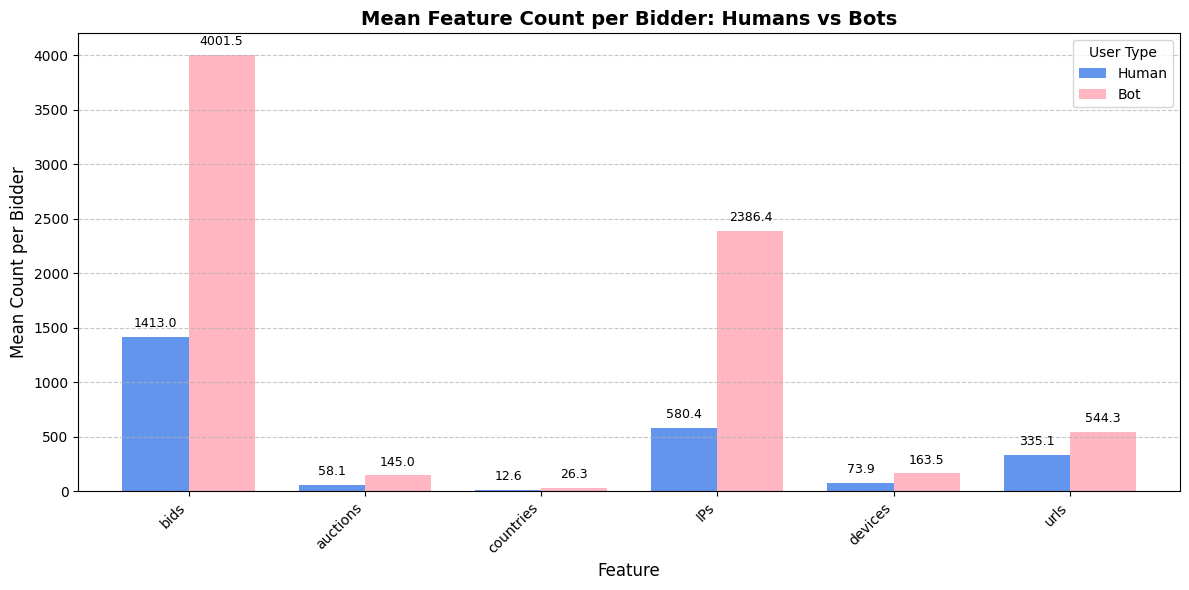

In [ ]:
# Combine into one DataFrame for comparison
mean_comparison_df = pd.DataFrame({
    'Human': human_summary['mean'],
    'Bot': robot_summary['mean']
})

# Define color palette
colors = ['cornflowerblue', 'lightpink']

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars with custom width and color
bars = mean_comparison_df.plot(
    kind='bar',
    ax=ax,
    color=colors,
    width=0.75,
)

# Title and labels
ax.set_title('Mean Feature Count per Bidder: Humans vs Bots', fontsize=14, weight='bold')
ax.set_ylabel('Mean Count per Bidder', fontsize=12)
ax.set_xlabel('Feature', fontsize=12)
ax.set_xticklabels(mean_comparison_df.index, rotation=45, ha='right')

# Annotate bar values
for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{height:.1f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 5), textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)

# Add grid for clarity
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Style and legend
ax.legend(title='User Type')
plt.tight_layout()
plt.show()


Observations:

- Mean for bids per bidder for humans is a lot less than bots. Similar observation for most of the other columns (auction, country, IP, url, device)

#4. Feature Engineering

In [ ]:
auction_df.head()

bid_id auction merchandise     device          time country  \
0   85371.0   yitr4  home goods    phone35  9.759489e+15      ke   
1  274487.0   btpyy  home goods  phone1004  9.760249e+15      zm   
2  527436.0   kj2ko  home goods     phone4  9.762261e+15      ke   
3  554135.0   1m5t8  home goods     phone4  9.762431e+15      ke   
4  607628.0   btpyy  home goods     phone4  9.762789e+15      ke   

                ip              url                              bidder_id  \
0    82.34.177.248  vasstdc27m7nks3  91a3c57b13234af24875c56fb7e2b2f4rb56a   
1   202.130.71.167  vasstdc27m7nks3  91a3c57b13234af24875c56fb7e2b2f4rb56a   
2     22.54.76.225  vasstdc27m7nks3  91a3c57b13234af24875c56fb7e2b2f4rb56a   
3    32.13.237.126  vasstdc27m7nks3  91a3c57b13234af24875c56fb7e2b2f4rb56a   
4  202.236.188.240  vasstdc27m7nks3  91a3c57b13234af24875c56fb7e2b2f4rb56a   

                         payment_account  \
0  a3d2de7675556553a5f08e4c88d2c228754av   
1  a3d2de7675556553a5f08e4c88d2c228754av   
2  a3d2de7675556553a5f08e4c88d2c228754av   
3  a3d2de7675556553a5f08e4c88d2c228754av   
4  a3d2de7675556553a5f08e4c88d2c228754av   

                                 address  outcome  
0  a3d2de7675556553a5f08e4c88d2c228vt0u4      0.0  
1  a3d2de7675556553a5f08e4c88d2c228vt0u4      0.0  
2  a3d2de7675556553a5f08e4c88d2c228vt0u4      0.0  
3  a3d2de7675556553a5f08e4c88d2c228vt0u4      0.0  
4  a3d2de7675556553a5f08e4c88d2c228vt0u4      0.0

In [ ]:
auction_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3068523 entries, 0 to 3068552
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   bid_id           float64
 1   auction          object 
 2   merchandise      object 
 3   device           object 
 4   time             float64
 5   country          object 
 6   ip               object 
 7   url              object 
 8   bidder_id        object 
 9   payment_account  object 
 10  address          object 
 11  outcome          float64
dtypes: float64(3), object(9)
memory usage: 304.3+ MB


In [ ]:
# number of unique rows
auction_df.nunique()

bid_id             3068523
auction              12740
merchandise             10
device                5726
time                742582
country                198
ip                 1028810
url                 663265
bidder_id             1983
payment_account       1983
address               1983
outcome                  2
dtype: int64

- Number of unique bidder_id = 1983

Since the auction_df is the dataset used to derive new features at the bidder level. The final dataset must contain 1983 rows.

In [ ]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Bids shape:", bids.shape)
print("Auction_df shape:", auction_df.shape)
print("Auction_test_df shape:", auction_test_df.shape)

Train shape: (2013, 4)
Test shape: (4700, 3)
Bids shape: (7647475, 9)
Auction_df shape: (3068523, 12)
Auction_test_df shape: (4579026, 11)


In [ ]:
auction_df.columns

Index(['bid_id', 'auction', 'merchandise', 'device', 'time', 'country', 'ip',
       'url', 'bidder_id', 'payment_account', 'address', 'outcome'],
      dtype='object')

## MLP

<h3> 1. Basic Activity Counts (per bidder)
<h6> Features created:<br>

- total_bids: Total number of bids
- total_auctions: Number of unique auctions
- total_devices: Unique devices used
- total_ips: Unique IPs used
- total_urls: Unique URLs accessed
- total_countries: Unique countries used
- total_merchandise: Number of distinct merchandise categories

In [ ]:
# Group bids by bidder_id to extract basic count features
basic_counts = auction_df.groupby('bidder_id').agg(
    total_bids=('bid_id', 'count'),
    total_auctions=('auction', 'nunique'),
    total_devices=('device', 'nunique'),
    total_ips=('ip', 'nunique'),
    total_urls=('url', 'nunique'),
    total_countries=('country', 'nunique'),
    total_merchandise=('merchandise', 'nunique')
).reset_index()

# Preview
basic_counts.head()


bidder_id  total_bids  total_auctions  \
0  001068c415025a009fee375a12cff4fcnht8y           1               1   
1  0030a2dd87ad2733e0873062e4f83954mkj86           1               1   
2  00a0517965f18610417ee784a05f494d4dw6e         141              74   
3  00cc97158e6f4cb8eac3c0075918b7ffi5k8o           3               3   
4  01067975436d123f717ee5aba0dd4bbfa0937         534              17   

   total_devices  total_ips  total_urls  total_countries  total_merchandise  
0              1          1           1                1                  1  
1              1          1           1                1                  1  
2             67        103          84               16                  1  
3              3          3           1                2                  1  
4            164        389           4               71                  1

In [ ]:
# test df
basic_counts_test = auction_test_df.groupby('bidder_id').agg(
    total_bids=('bid_id', 'count'),
    total_auctions=('auction', 'nunique'),
    total_devices=('device', 'nunique'),
    total_ips=('ip', 'nunique'),
    total_urls=('url', 'nunique'),
    total_countries=('country', 'nunique'),
    total_merchandise=('merchandise', 'nunique')
).reset_index()

# Preview
basic_counts_test.head()

bidder_id  total_bids  total_auctions  \
0  002d229ffb247009810828f648afc2ef593rb           2               1   
1  003180b29c6a5f8f1d84a6b7b6f7be57tjj1o           3               3   
2  00486a11dff552c4bd7696265724ff81yeo9v          20              13   
3  0051aef3fdeacdadba664b9b3b07e04e4coc6          68               5   
4  0053b78cde37c4384a20d2da9aa4272aym4pb       10937             408   

   total_devices  total_ips  total_urls  total_countries  total_merchandise  
0              2          1           1                1                  1  
1              3          3           2                1                  1  
2              8         10           7                1                  1  
3              6         10           3                4                  1  
4            517       1949        1937               73                  1

<h3> 2. Behavioral Ratios
<h6> Features created:<br>

- avg_bids_per_auction:	Total bids / unique auctions
- avg_bids_per_ip:	Total bids / unique IPs
- avg_bids_per_device:	Total bids / unique devices
- avg_bids_per_url:	Total bids / unique URLs
- avg_auction_per_country:	Unique auctions / unique countries
- ip_per_device:	Unique IPs / unique devices
- device_per_auction: Unique devices / unique auctions
- ip_per_country: Unique IPs / unique country

In [ ]:
# Create a copy to avoid modifying the original basic_counts
behavioral_ratios = basic_counts.copy()

# Compute ratios
behavioral_ratios['avg_bids_per_auction'] = behavioral_ratios['total_bids'] / (behavioral_ratios['total_auctions'])
behavioral_ratios['avg_bids_per_ip'] = behavioral_ratios['total_bids'] / (behavioral_ratios['total_ips'])
behavioral_ratios['avg_bids_per_device'] = behavioral_ratios['total_bids'] / (behavioral_ratios['total_devices'])
behavioral_ratios['avg_bids_per_url'] = behavioral_ratios['total_bids'] / (behavioral_ratios['total_urls'])
behavioral_ratios['avg_auction_per_country'] = behavioral_ratios['total_auctions'] / behavioral_ratios['total_countries']
behavioral_ratios['ip_per_device'] = behavioral_ratios['total_ips'] / behavioral_ratios['total_devices']
behavioral_ratios['device_per_auction'] = behavioral_ratios['total_devices'] / behavioral_ratios['total_auctions']
behavioral_ratios['ip_per_country'] = behavioral_ratios['total_ips'] / behavioral_ratios['total_countries']

# Select only ratio columns + bidder_id for merging later
ratios_df = behavioral_ratios[['bidder_id', 'avg_bids_per_auction', 'avg_bids_per_ip',
                               'avg_bids_per_device', 'avg_bids_per_url', 'avg_auction_per_country',
                               'ip_per_device', 'device_per_auction', 'ip_per_country']]

# Preview
ratios_df.head()

bidder_id  avg_bids_per_auction  \
0  001068c415025a009fee375a12cff4fcnht8y              1.000000   
1  0030a2dd87ad2733e0873062e4f83954mkj86              1.000000   
2  00a0517965f18610417ee784a05f494d4dw6e              1.905405   
3  00cc97158e6f4cb8eac3c0075918b7ffi5k8o              1.000000   
4  01067975436d123f717ee5aba0dd4bbfa0937             31.411765   

   avg_bids_per_ip  avg_bids_per_device  avg_bids_per_url  \
0         1.000000             1.000000          1.000000   
1         1.000000             1.000000          1.000000   
2         1.368932             2.104478          1.678571   
3         1.000000             1.000000          3.000000   
4         1.372751             3.256098        133.500000   

   avg_auction_per_country  ip_per_device  device_per_auction  ip_per_country  
0                 1.000000       1.000000            1.000000        1.000000  
1                 1.000000       1.000000            1.000000        1.000000  
2                 4.625000       1.537313            0.905405        6.437500  
3                 1.500000       1.000000            1.000000        1.500000  
4                 0.239437       2.371951            9.647059        5.478873

In [ ]:
# test df
behavioral_ratios_test = basic_counts_test.copy()

# Compute ratios
behavioral_ratios_test['avg_bids_per_auction'] = behavioral_ratios_test['total_bids'] / behavioral_ratios_test['total_auctions']
behavioral_ratios_test['avg_bids_per_ip'] = behavioral_ratios_test['total_bids'] / behavioral_ratios_test['total_ips']
behavioral_ratios_test['avg_bids_per_device'] = behavioral_ratios_test['total_bids'] / behavioral_ratios_test['total_devices']
behavioral_ratios_test['avg_bids_per_url'] = behavioral_ratios_test['total_bids'] / behavioral_ratios_test['total_urls']
behavioral_ratios_test['avg_auction_per_country'] = behavioral_ratios_test['total_auctions'] / behavioral_ratios_test['total_countries']
behavioral_ratios_test['ip_per_device'] = behavioral_ratios_test['total_ips'] / behavioral_ratios_test['total_devices']
behavioral_ratios_test['device_per_auction'] = behavioral_ratios_test['total_devices'] / behavioral_ratios_test['total_auctions']
behavioral_ratios_test['ip_per_country'] = behavioral_ratios_test['total_ips'] / behavioral_ratios_test['total_countries']

# Select final test ratio features
ratios_df_test = behavioral_ratios_test[['bidder_id', 'avg_bids_per_auction', 'avg_bids_per_ip',
                                         'avg_bids_per_device', 'avg_bids_per_url', 'avg_auction_per_country',
                                         'ip_per_device', 'device_per_auction', 'ip_per_country']]

# Preview
ratios_df_test.head()

bidder_id  avg_bids_per_auction  \
0  002d229ffb247009810828f648afc2ef593rb              2.000000   
1  003180b29c6a5f8f1d84a6b7b6f7be57tjj1o              1.000000   
2  00486a11dff552c4bd7696265724ff81yeo9v              1.538462   
3  0051aef3fdeacdadba664b9b3b07e04e4coc6             13.600000   
4  0053b78cde37c4384a20d2da9aa4272aym4pb             26.806373   

   avg_bids_per_ip  avg_bids_per_device  avg_bids_per_url  \
0         2.000000             1.000000          2.000000   
1         1.000000             1.000000          1.500000   
2         2.000000             2.500000          2.857143   
3         6.800000            11.333333         22.666667   
4         5.611596            21.154739          5.646360   

   avg_auction_per_country  ip_per_device  device_per_auction  ip_per_country  
0                 1.000000       0.500000            2.000000         1.00000  
1                 3.000000       1.000000            1.000000         3.00000  
2                13.000000       1.250000            0.615385        10.00000  
3                 1.250000       1.666667            1.200000         2.50000  
4                 5.589041       3.769826            1.267157        26.69863

<h3> 3. Time-Based Stats
<h6> Features created:<br>

- mean_time_diff:	Average time difference between bids
- std_time_diff:	Standard deviation of time difference
- min_time_diff:	Minimum time between bids
- max_time_diff:	Maximum time between bids
- time_range:	Time of last bid - time of first bid (session length)
- peak_bid_hour:	Most active hour (0–23) extracted from timestamps

In [ ]:
# Sort auction_df to prepare for time_diff
auction_df_sorted = auction_df.sort_values(by=['bidder_id', 'time'])

# Calculate time difference per user
auction_df_sorted['time_diff'] = auction_df_sorted.groupby('bidder_id')['time'].diff().fillna(0)

# Estimate hour of day from timestamps
auction_df_sorted['hour'] = ((auction_df_sorted['time'] // 1e12) % 24).astype(int)

# Aggregate time features
time_features = auction_df_sorted.groupby('bidder_id').agg(
    mean_time_diff=('time_diff', 'mean'),
    std_time_diff=('time_diff', 'std'),
    min_time_diff=('time_diff', 'min'),
    max_time_diff=('time_diff', 'max'),
    time_range=('time', lambda x: x.max() - x.min()),
    peak_bid_hour=('hour', lambda x: x.value_counts().idxmax())
).reset_index()

# Fill NaN std values for users with only 1 bid
time_features.fillna(0, inplace=True)

# Preview
time_features.head()


bidder_id  mean_time_diff  std_time_diff  \
0  001068c415025a009fee375a12cff4fcnht8y    0.000000e+00   0.000000e+00   
1  0030a2dd87ad2733e0873062e4f83954mkj86    0.000000e+00   0.000000e+00   
2  00a0517965f18610417ee784a05f494d4dw6e    5.447917e+11   4.235468e+12   
3  00cc97158e6f4cb8eac3c0075918b7ffi5k8o    1.832267e+13   3.168899e+13   
4  01067975436d123f717ee5aba0dd4bbfa0937    2.544845e+10   5.378255e+10   

   min_time_diff  max_time_diff    time_range  peak_bid_hour  
0            0.0   0.000000e+00  0.000000e+00             10  
1            0.0   0.000000e+00  0.000000e+00              8  
2            0.0   5.012521e+13  7.681563e+13              7  
3            0.0   5.491395e+13  5.496800e+13             17  
4            0.0   9.704211e+11  1.358947e+13             20

In [ ]:
# test df
auction_test_df_sorted = auction_test_df.sort_values(by=['bidder_id', 'time'])

# Calculate time_diff for each bidder
auction_test_df_sorted['time_diff'] = auction_test_df_sorted.groupby('bidder_id')['time'].diff().fillna(0)

# Estimate hour of the bid from timestamp
calculated_hour = ((auction_test_df_sorted['time'] // 1e12) % 24)
auction_test_df_sorted['hour'] = calculated_hour.fillna(0).astype(int)

# Aggregate time-based features per bidder
time_features_test = auction_test_df_sorted.groupby('bidder_id').agg(
    mean_time_diff=('time_diff', 'mean'),
    std_time_diff=('time_diff', 'std'),
    min_time_diff=('time_diff', 'min'),
    max_time_diff=('time_diff', 'max'),
    time_range=('time', lambda x: x.max() - x.min()),
    peak_bid_hour=('hour', lambda x: x.value_counts().idxmax())
).reset_index()

# Fill NaN for std (if only 1 bid)
time_features_test.fillna(0, inplace=True)

# Preview
time_features_test.head()


bidder_id  mean_time_diff  std_time_diff  \
0  002d229ffb247009810828f648afc2ef593rb    5.263158e+07   7.443229e+07   
1  003180b29c6a5f8f1d84a6b7b6f7be57tjj1o    2.198523e+13   3.353724e+13   
2  00486a11dff552c4bd7696265724ff81yeo9v    3.817492e+12   1.126547e+13   
3  0051aef3fdeacdadba664b9b3b07e04e4coc6    1.611060e+11   5.730944e+11   
4  0053b78cde37c4384a20d2da9aa4272aym4pb    7.065962e+09   4.784612e+11   

   min_time_diff  max_time_diff    time_range  peak_bid_hour  
0            0.0   1.052632e+08  1.052632e+08             22  
1            0.0   6.058642e+13  6.595568e+13             16  
2            0.0   5.094174e+13  7.634984e+13              8  
3            0.0   3.792368e+12  1.095521e+13             15  
4            0.0   5.002753e+13  7.728042e+13              8

<h3> 4. Entropy-Based Features
<h6>

*   These features measure the diversity or unpredictability in a bidder's behavior. Moderate entropy suggests more human-like randomness, while high entropy may indicate automated, repetitive behavior (bot-like).

<h6> Features created:<br>

- device_entropy: Entropy of device usage — measures how varied and evenly distributed the devices used by a bidder are.
- ip_entropy: Entropy of IP addresses — reflects the randomness in the bidder’s IP usage.
- url_entropy: Entropy of URLs accessed — captures how diversely the bidder interacts with different URLs.
- country_entropy: Entropy of countries — indicates how varied the bidder’s geographic bidding behavior is.

Note: merchandise_entropy was excluded as nearly all bidders interacted with only one merchandise type, resulting in zero entropy.

In [ ]:
from scipy.stats import entropy

def calculate_entropy(series):
    counts = series.value_counts()
    probabilities = counts / counts.sum()
    return entropy(probabilities, base=2)

# Final entropy features
entropy_features = auction_df.groupby('bidder_id').agg(
    device_entropy=('device', calculate_entropy),
    ip_entropy=('ip', calculate_entropy),
    url_entropy=('url', calculate_entropy),
    country_entropy=('country', calculate_entropy)
).reset_index()

# Preview
entropy_features.head()

bidder_id  device_entropy  ip_entropy  \
0  001068c415025a009fee375a12cff4fcnht8y        0.000000    0.000000   
1  0030a2dd87ad2733e0873062e4f83954mkj86        0.000000    0.000000   
2  00a0517965f18610417ee784a05f494d4dw6e        5.735272    6.525868   
3  00cc97158e6f4cb8eac3c0075918b7ffi5k8o        1.584963    1.584963   
4  01067975436d123f717ee5aba0dd4bbfa0937        6.648834    8.269924   

   url_entropy  country_entropy  
0     0.000000         0.000000  
1     0.000000         0.000000  
2     5.844345         2.363600  
3     0.000000         0.918296  
4     0.183882         4.590833

In [ ]:
# Apply to test set
entropy_features_test = auction_test_df.groupby('bidder_id').agg(
    device_entropy=('device', calculate_entropy),
    ip_entropy=('ip', calculate_entropy),
    url_entropy=('url', calculate_entropy),
    country_entropy=('country', calculate_entropy)
).reset_index()

# Preview
entropy_features_test.head()

bidder_id  device_entropy  ip_entropy  \
0  002d229ffb247009810828f648afc2ef593rb        1.000000    0.000000   
1  003180b29c6a5f8f1d84a6b7b6f7be57tjj1o        1.584963    1.584963   
2  00486a11dff552c4bd7696265724ff81yeo9v        2.558872    3.046439   
3  0051aef3fdeacdadba664b9b3b07e04e4coc6        1.514035    2.405099   
4  0053b78cde37c4384a20d2da9aa4272aym4pb        6.915825    7.507942   

   url_entropy  country_entropy  
0     0.000000         0.000000  
1     0.918296         0.000000  
2     2.081496         0.000000  
3     0.839187         1.304027  
4     7.690932         3.105223

<h6> Visualization: Relate Entropy-based features to Outcome

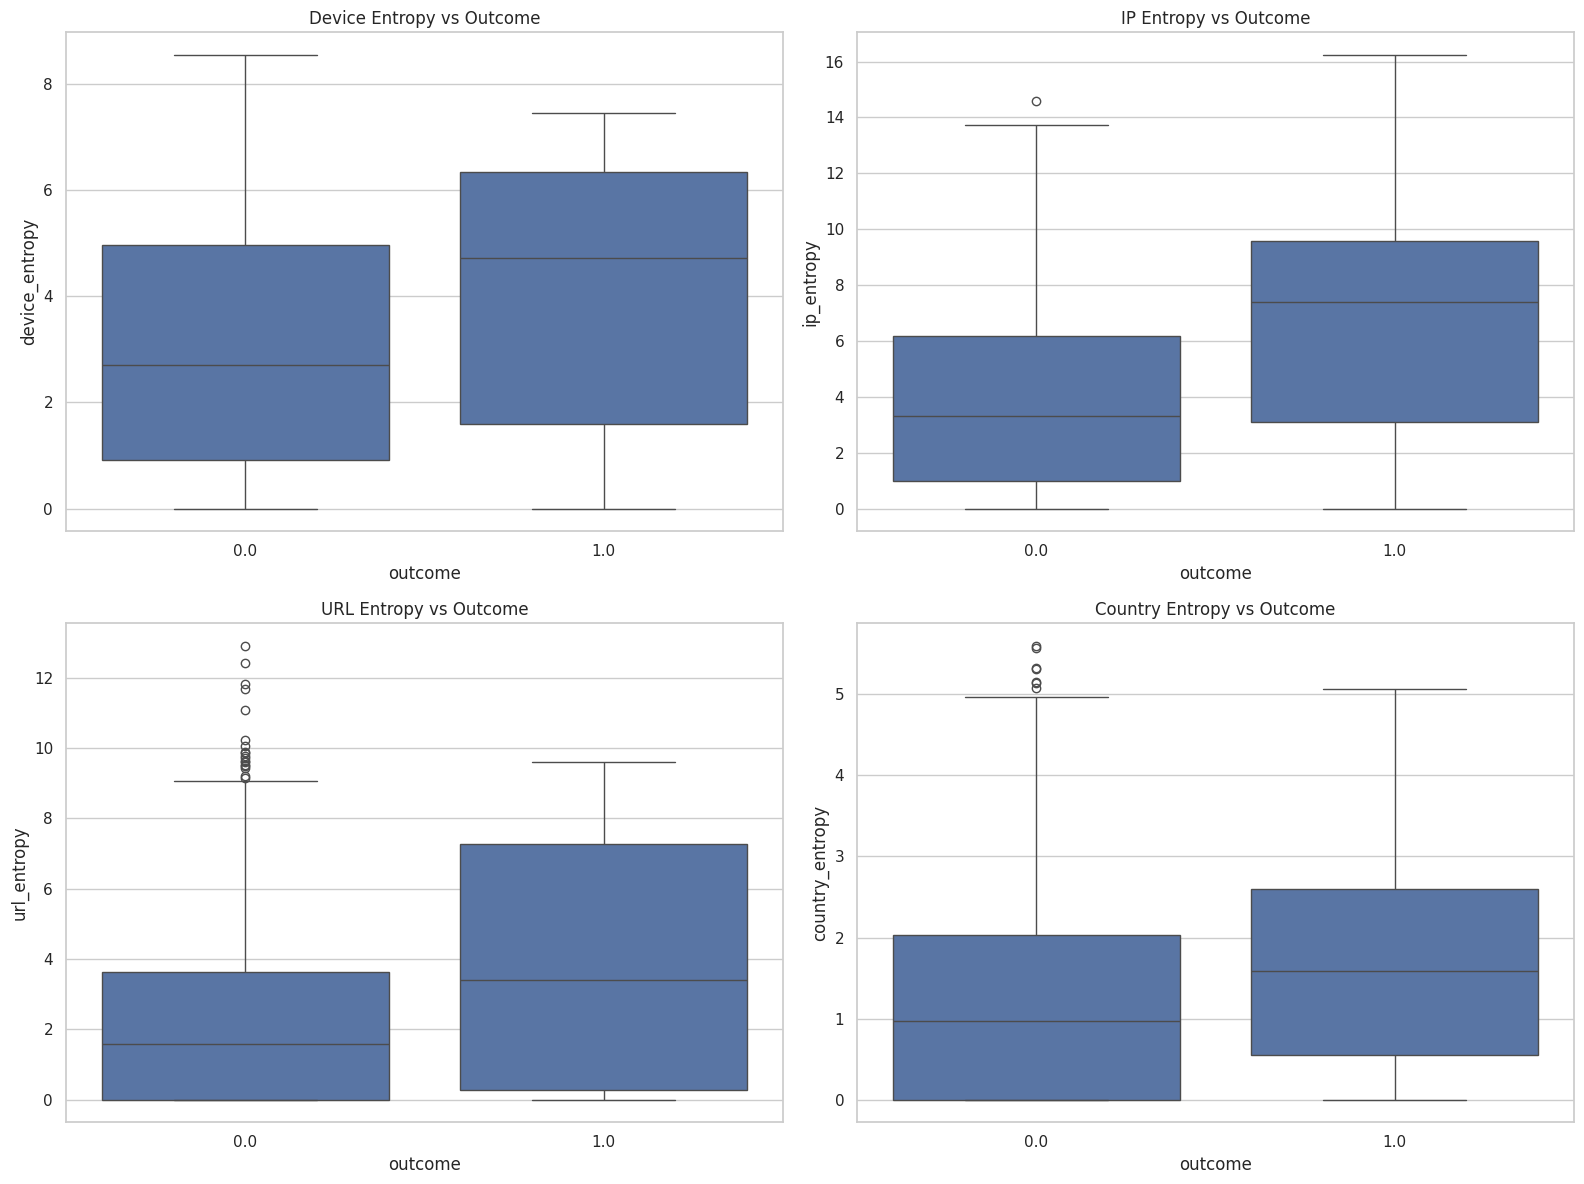

In [ ]:
# Merge entropy features with outcome from auction_df
entropy_merged = pd.merge(entropy_features, auction_df[['bidder_id', 'outcome']].drop_duplicates(), on='bidder_id')

# Set seaborn style
sns.set(style="whitegrid")

# Plot: Boxplots for each entropy feature vs outcome
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.boxplot(data=entropy_merged, x='outcome', y='device_entropy', ax=axes[0, 0])
axes[0, 0].set_title('Device Entropy vs Outcome')

sns.boxplot(data=entropy_merged, x='outcome', y='ip_entropy', ax=axes[0, 1])
axes[0, 1].set_title('IP Entropy vs Outcome')

sns.boxplot(data=entropy_merged, x='outcome', y='url_entropy', ax=axes[1, 0])
axes[1, 0].set_title('URL Entropy vs Outcome')

sns.boxplot(data=entropy_merged, x='outcome', y='country_entropy', ax=axes[1, 1])
axes[1, 1].set_title('Country Entropy vs Outcome')

plt.tight_layout()
plt.show()


**<h3> Merge all new features**

In [ ]:
# Merge all features on 'bidder_id'
features_mlp = basic_counts \
    .merge(ratios_df, on='bidder_id') \
    .merge(time_features, on='bidder_id') \
    .merge(entropy_features, on='bidder_id')

# Add outcome directly from auction_df
features_mlp = features_mlp.merge(
    auction_df[['bidder_id', 'outcome']].drop_duplicates(),
    on='bidder_id'
)

features_mlp

bidder_id  total_bids  total_auctions  \
0     001068c415025a009fee375a12cff4fcnht8y           1               1   
1     0030a2dd87ad2733e0873062e4f83954mkj86           1               1   
2     00a0517965f18610417ee784a05f494d4dw6e         141              74   
3     00cc97158e6f4cb8eac3c0075918b7ffi5k8o           3               3   
4     01067975436d123f717ee5aba0dd4bbfa0937         534              17   
...                                     ...         ...             ...   
1978  ff92ea4abd33ed38601287f0e1d6726dmgx1f         395              11   
1979  ffacbed056cbfaa60c1fcf51f0d381bddr3ly           9               9   
1980  ffaf0a972a6dcb3910fd6b16045781e2ava5y           3               3   
1981  ffc4e2dd2cc08249f299cab46ecbfacfobmr3          22              15   
1982  fff2c070d8200e0a09150bd81452ce29ngcnv           1               1   

      total_devices  total_ips  total_urls  total_countries  \
0                 1          1           1                1   
1                 1          1           1                1   
2                67        103          84               16   
3                 3          3           1                2   
4               164        389           4               71   
...             ...        ...         ...              ...   
1978             99        202         124                1   
1979              7          8           1                3   
1980              2          3           3                3   
1981             13         18          12                6   
1982              1          1           1                1   

      total_merchandise  avg_bids_per_auction  avg_bids_per_ip  ...  \
0                     1              1.000000         1.000000  ...   
1                     1              1.000000         1.000000  ...   
2                     1              1.905405         1.368932  ...   
3                     1              1.000000         1.000000  ...   
4                     1             31.411765         1.372751  ...   
...                 ...                   ...              ...  ...   
1978                  1             35.909091         1.955446  ...   
1979                  1              1.000000         1.125000  ...   
1980                  1              1.000000         1.000000  ...   
1981                  1              1.466667         1.222222  ...   
1982                  1              1.000000         1.000000  ...   

      std_time_diff  min_time_diff  max_time_diff    time_range  \
0      0.000000e+00            0.0   0.000000e+00  0.000000e+00   
1      0.000000e+00            0.0   0.000000e+00  0.000000e+00   
2      4.235468e+12            0.0   5.012521e+13  7.681563e+13   
3      3.168899e+13            0.0   5.491395e+13  5.496800e+13   
4      5.378255e+10            0.0   9.704211e+11  1.358947e+13   
...             ...            ...            ...           ...   
1978   2.632415e+12            0.0   5.203126e+13  7.681568e+13   
1979   1.712203e+13            0.0   5.289747e+13  7.060184e+13   
1980   2.702156e+12            0.0   5.327842e+12  8.776316e+12   
1981   1.067349e+13            0.0   5.082974e+13  7.552326e+13   
1982   0.000000e+00            0.0   0.000000e+00  0.000000e+00   

      peak_bid_hour  device_entropy  ip_entropy  url_entropy  country_entropy  \
0                10        0.000000    0.000000     0.000000         0.000000   
1                 8        0.000000    0.000000     0.000000         0.000000   
2                 7        5.735272    6.525868     5.844345         2.363600   
3                17        1.584963    1.584963     0.000000         0.918296   
4                20        6.648834    8.269924     0.183882         4.590833   
...             ...             ...         ...          ...              ...   
1978             20        4.962062    7.329984     3.568378         0.000000   
1979              9        2.725481    2.947703     0.000000         1

In [ ]:
# Merge for test df
features_mlp_test = basic_counts_test \
    .merge(ratios_df_test, on='bidder_id') \
    .merge(time_features_test, on='bidder_id') \
    .merge(entropy_features_test, on='bidder_id')

In [ ]:
# Count unique payment accounts per bidder
payment_check = auction_df.groupby('bidder_id')['payment_account'].nunique()

# Find if any bidder has more than 1 payment_account
multiple_accounts = payment_check[payment_check > 1]
print("Bidders with multiple payment accounts:", len(multiple_accounts))

# Count unique addresses per bidder
address_check = auction_df.groupby('bidder_id')['address'].nunique()

# Find if any bidder has more than 1 address
multiple_addresses = address_check[address_check > 1]
print("Bidders with multiple addresses:", len(multiple_addresses))

Bidders with multiple payment accounts: 0
Bidders with multiple addresses: 0


- We will not keep '**payment_account**' and '**address**' features because:
  - These fields are constant per bidder (**unique identifier** columns)
  - They **do not** provide behavioral variance that would help the model.
  - Keeping them would likely cause **overfitting** or data leakage, especially since bots may share patterns beyond identity.

In [ ]:
features_mlp['total_merchandise'].value_counts()

total_merchandise
1    1982
2       1
Name: count, dtype: int64

Observation:
- Nearly all humans and bots only bidded for **one type** of merchandise.
- We remove it as it may introduce noise or confuse the model during training

In [ ]:
# drop not useful columns
features_to_drop = ['min_time_diff', 'total_merchandise']
features_mlp = features_mlp.drop(columns=features_to_drop)

In [ ]:
# drop similar columns for test df
features_mlp_test = features_mlp_test.drop(columns=['min_time_diff', 'total_merchandise'])

In [ ]:
features_mlp.nunique()

bidder_id                  1983
total_bids                  616
total_auctions              317
total_devices               356
total_ips                   526
total_urls                  375
total_countries             118
avg_bids_per_auction        918
avg_bids_per_ip             871
avg_bids_per_device         898
avg_bids_per_url            914
avg_auction_per_country     657
ip_per_device               807
device_per_auction          818
ip_per_country              768
mean_time_diff             1681
std_time_diff              1681
max_time_diff              1658
time_range                 1660
peak_bid_hour                24
device_entropy             1123
ip_entropy                 1058
url_entropy                1112
country_entropy            1065
outcome                       2
dtype: int64

In [ ]:
features_mlp.columns

Index(['bidder_id', 'total_bids', 'total_auctions', 'total_devices',
       'total_ips', 'total_urls', 'total_countries', 'avg_bids_per_auction',
       'avg_bids_per_ip', 'avg_bids_per_device', 'avg_bids_per_url',
       'avg_auction_per_country', 'ip_per_device', 'device_per_auction',
       'ip_per_country', 'mean_time_diff', 'std_time_diff', 'max_time_diff',
       'time_range', 'peak_bid_hour', 'device_entropy', 'ip_entropy',
       'url_entropy', 'country_entropy', 'outcome'],
      dtype='object')

In [ ]:
features_mlp_test.columns

Index(['bidder_id', 'total_bids', 'total_auctions', 'total_devices',
       'total_ips', 'total_urls', 'total_countries', 'avg_bids_per_auction',
       'avg_bids_per_ip', 'avg_bids_per_device', 'avg_bids_per_url',
       'avg_auction_per_country', 'ip_per_device', 'device_per_auction',
       'ip_per_country', 'mean_time_diff', 'std_time_diff', 'max_time_diff',
       'time_range', 'peak_bid_hour', 'device_entropy', 'ip_entropy',
       'url_entropy', 'country_entropy'],
      dtype='object')

In [ ]:
# Path to save
save_path = '/content/drive/My Drive/Colab Notebooks/DL Data/mlp_features.csv'

# Save the DataFrame
features_mlp.to_csv(save_path, index=False)

print(f"Saved to {save_path}")


Saved to /content/drive/My Drive/Colab Notebooks/DL Data/mlp_features.csv


In [ ]:
# Path to save
save_path = '/content/drive/My Drive/Colab Notebooks/DL Data/mlp_features_test.csv'

# Save the DataFrame
features_mlp_test.to_csv(save_path, index=False)

print(f"Saved to {save_path}")


Saved to /content/drive/My Drive/Colab Notebooks/DL Data/mlp_features_test.csv


**<h4> Visualization**
**<h6> 1. Heatmap**

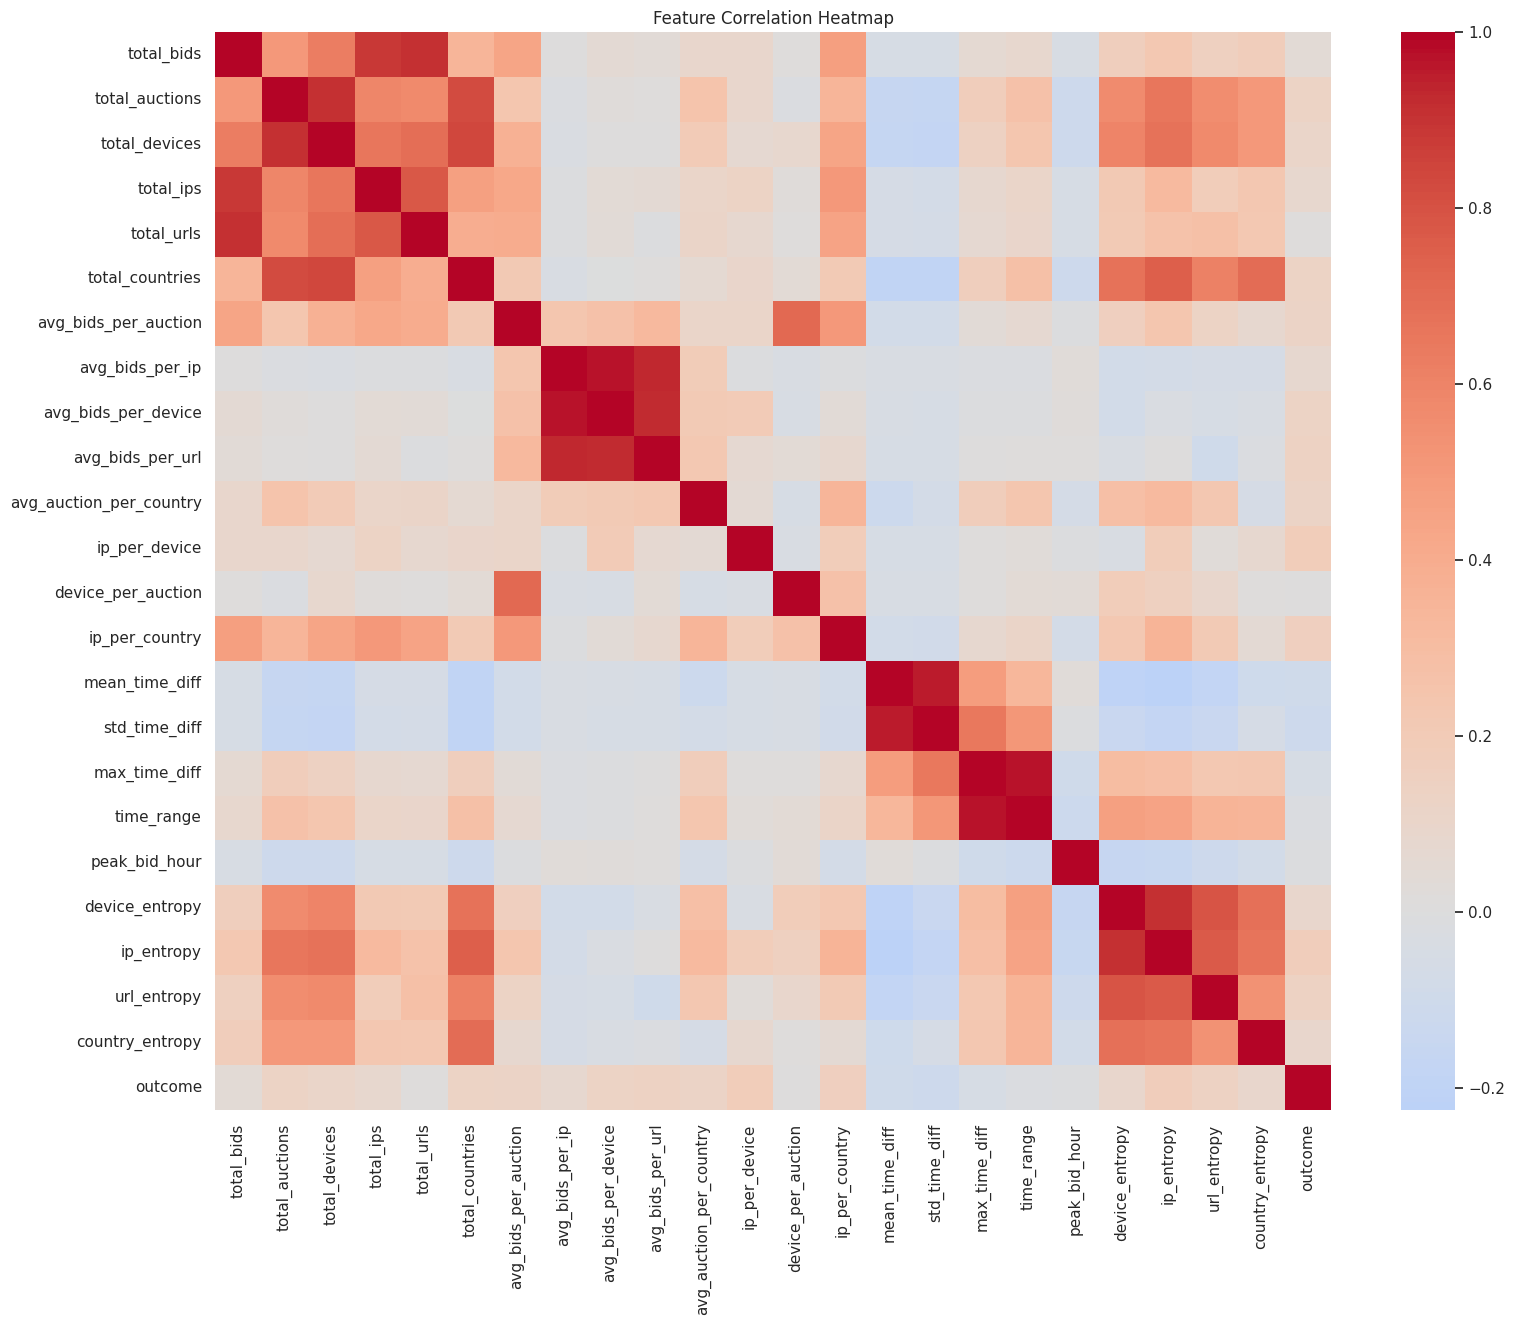

In [ ]:
# Drop ID
df_viz = features_mlp.drop(columns=['bidder_id'])

# 1. Correlation Heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(df_viz.corr(), annot=False, cmap="coolwarm", center=0, cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

**<h6> 2. KDE Plots**
<br>
- To visualize the distribution of each feature for humans vs bots

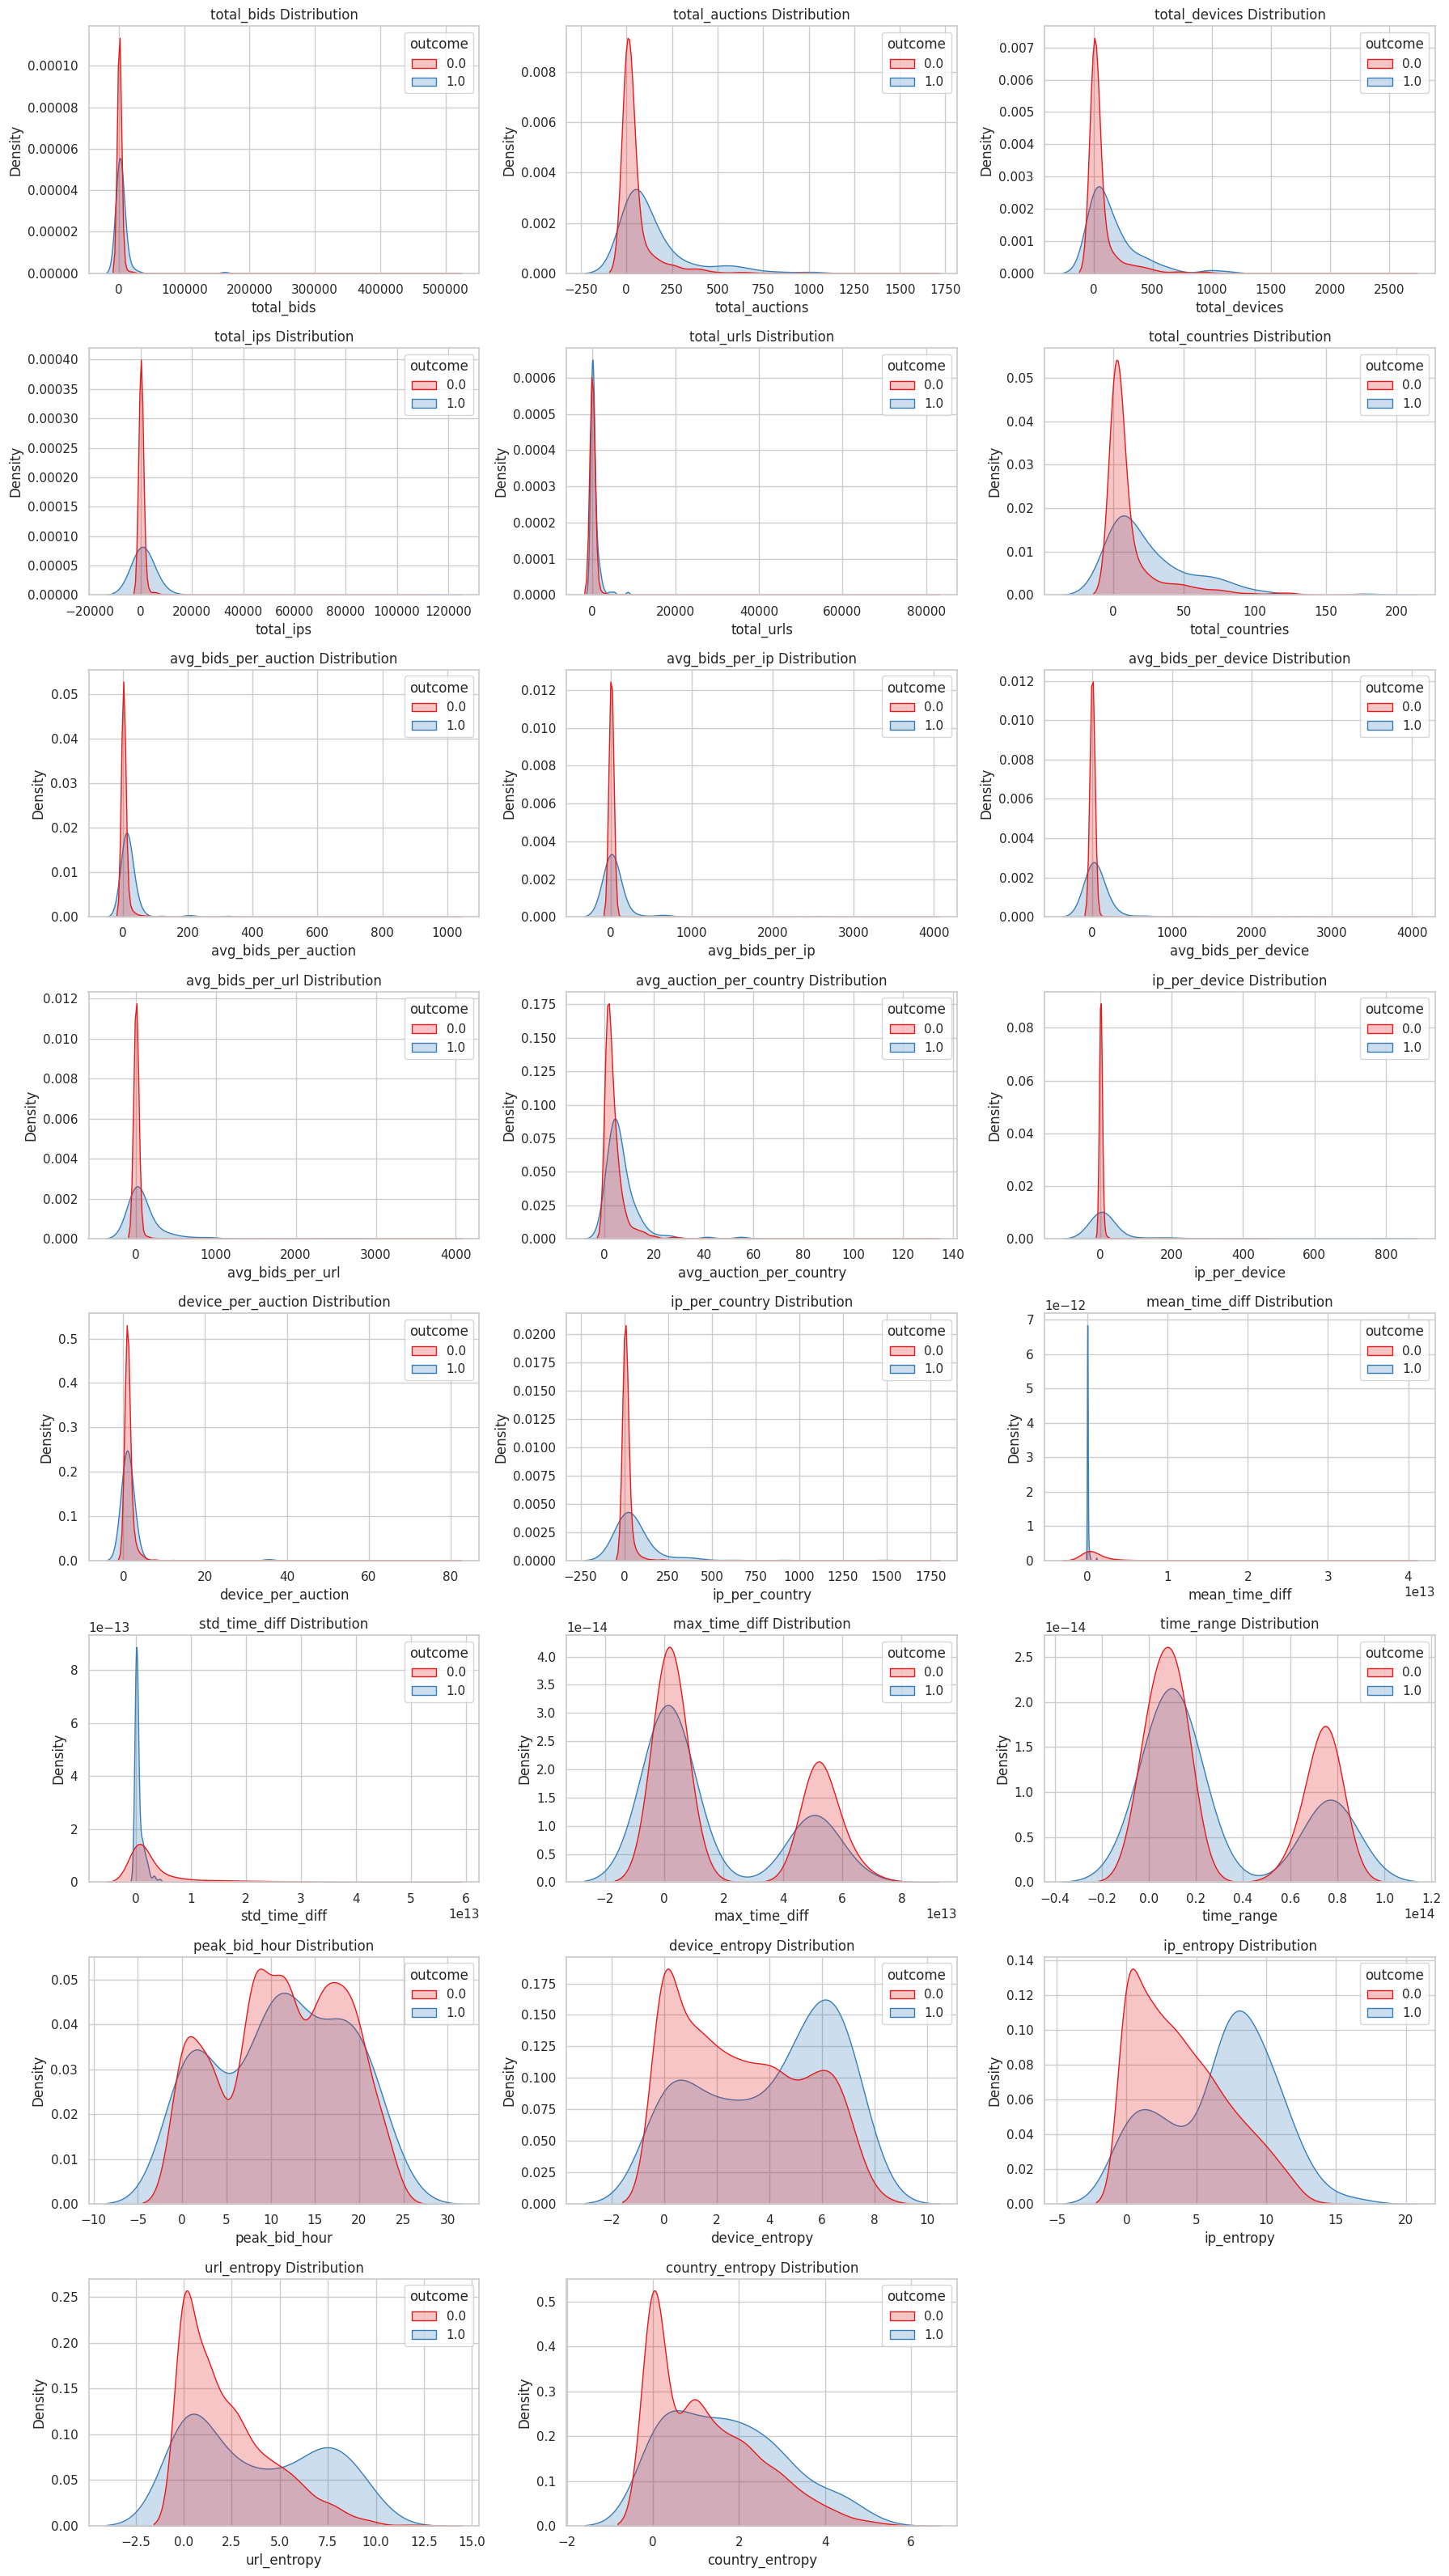

In [ ]:
# Drop ID
df_dist = features_mlp.drop(columns=['bidder_id'])

# List of feature columns (exclude outcome)
feature_cols = [col for col in df_dist.columns if col != 'outcome']

# 2. KDE Plots Distribution
n_cols = 3
n_rows = (len(feature_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 6, n_rows * 4))

for i, col in enumerate(feature_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(data=df_dist, x=col, hue='outcome', fill=True, common_norm=False, palette='Set1')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

## LSTM

In [ ]:
# Create new dataframe for LSTM feature engineering
bids_seq_df = auction_df.sort_values(by=['bidder_id', 'time']).copy()

bids_seq_df.head()

bid_id auction      merchandise    device          time country  \
60064    7179832.0   4ifac          jewelry  phone561  9.706345e+15      bn   
1645171  6805028.0   obbny           mobile  phone313  9.704554e+15      ir   
1018164  2501797.0   l3o6q  books and music  phone451  9.632300e+15      bh   
1018165  2724778.0   du967  books and music  phone117  9.633185e+15      tr   
1018166  2742648.0   wx3kf  books and music   phone16  9.633287e+15      in   

                      ip              url  \
60064    139.226.147.115  vasstdc27m7nks3   
1645171     21.67.17.162  vnw40k8zzokijsv   
1018164   103.165.41.136  kk7rxe25ehseyci   
1018165  239.250.228.152  iu2iu3k137vakme   
1018166  255.108.248.101  u85yj2e7owkz6xp   

                                     bidder_id  \
60064    001068c415025a009fee375a12cff4fcnht8y   
1645171  0030a2dd87ad2733e0873062e4f83954mkj86   
1018164  00a0517965f18610417ee784a05f494d4dw6e   
1018165  00a0517965f18610417ee784a05f494d4dw6e   
1018166  00a0517965f18610417ee784a05f494d4dw6e   

                               payment_account  \
60064    a3d2de7675556553a5f08e4c88d2c228iiasc   
1645171  a3d2de7675556553a5f08e4c88d2c228jem8t   
1018164  52743ba515e9c1279ac76e19f00c0b001p3pm   
1018165  52743ba515e9c1279ac76e19f00c0b001p3pm   
1018166  52743ba515e9c1279ac76e19f00c0b001p3pm   

                                       address  outcome  
60064    a3d2de7675556553a5f08e4c88d2c2282aj35      0.0  
1645171  f3bc67b04b43c3cebd1db5ed4941874c9br67      0.0  
1018164  7578f951008bd0b64528bf81b8578d5djy0uy      0.0  
1018165  7578f951008bd0b64528bf81b8578d5djy0uy      0.0  
1018166  7578f951008bd0b64528bf81b8578d5djy0uy      0.0

In [ ]:
# test df
bids_seq_df_test = auction_test_df.sort_values(by=['bidder_id', 'time']).copy()

<h3> 1. Time Features
<h6> Features created:

- time_diff: Time difference between consecutive bids for each bidder
- hour_sin, hour_cos: Circular encoding of bid time to represent hour-of-day patterns


In [ ]:
# Time features
bids_seq_df['time_diff'] = bids_seq_df.groupby('bidder_id')['time'].diff().fillna(0)
bids_seq_df['hour'] = ((bids_seq_df['time'] // 1e12) % 24).astype(int)
bids_seq_df['hour_sin'] = np.sin(2 * np.pi * bids_seq_df['hour'] / 24)
bids_seq_df['hour_cos'] = np.cos(2 * np.pi * bids_seq_df['hour'] / 24)

bids_seq_df.head()

bid_id auction      merchandise    device          time country  \
60064    7179832.0   4ifac          jewelry  phone561  9.706345e+15      bn   
1645171  6805028.0   obbny           mobile  phone313  9.704554e+15      ir   
1018164  2501797.0   l3o6q  books and music  phone451  9.632300e+15      bh   
1018165  2724778.0   du967  books and music  phone117  9.633185e+15      tr   
1018166  2742648.0   wx3kf  books and music   phone16  9.633287e+15      in   

                      ip              url  \
60064    139.226.147.115  vasstdc27m7nks3   
1645171     21.67.17.162  vnw40k8zzokijsv   
1018164   103.165.41.136  kk7rxe25ehseyci   
1018165  239.250.228.152  iu2iu3k137vakme   
1018166  255.108.248.101  u85yj2e7owkz6xp   

                                     bidder_id  \
60064    001068c415025a009fee375a12cff4fcnht8y   
1645171  0030a2dd87ad2733e0873062e4f83954mkj86   
1018164  00a0517965f18610417ee784a05f494d4dw6e   
1018165  00a0517965f18610417ee784a05f494d4dw6e   
1018166  00a0517965f18610417ee784a05f494d4dw6e   

                               payment_account  \
60064    a3d2de7675556553a5f08e4c88d2c228iiasc   
1645171  a3d2de7675556553a5f08e4c88d2c228jem8t   
1018164  52743ba515e9c1279ac76e19f00c0b001p3pm   
1018165  52743ba515e9c1279ac76e19f00c0b001p3pm   
1018166  52743ba515e9c1279ac76e19f00c0b001p3pm   

                                       address  outcome     time_diff  hour  \
60064    a3d2de7675556553a5f08e4c88d2c2282aj35      0.0  0.000000e+00    10   
1645171  f3bc67b04b43c3cebd1db5ed4941874c9br67      0.0  0.000000e+00     8   
1018164  7578f951008bd0b64528bf81b8578d5djy0uy      0.0  0.000000e+00     8   
1018165  7578f951008bd0b64528bf81b8578d5djy0uy      0.0  8.853158e+11     9   
1018166  7578f951008bd0b64528bf81b8578d5djy0uy      0.0  1.020526e+11     9   

         hour_sin  hour_cos  
60064    0.500000 -0.866025  
1645171  0.866025 -0.500000  
1018164  0.866025 -0.500000  
1018165  0.707107 -0.707107  
1018166  0.707107 -0.707107

In [ ]:
# test df
bids_seq_df_test['time_diff'] = bids_seq_df_test.groupby('bidder_id')['time'].diff().fillna(0)
# Estimate hour of the bid from timestamp, handling potential NaNs in the calculation
# The fillna(0) is added here to ensure the intermediate calculation result is not NaN before casting to int.
bids_seq_df_test['hour'] = ((bids_seq_df_test['time'] // 1e12) % 24).fillna(0).astype(int)
bids_seq_df_test['hour_sin'] = np.sin(2 * np.pi * bids_seq_df_test['hour'] / 24)
bids_seq_df_test['hour_cos'] = np.cos(2 * np.pi * bids_seq_df_test['hour'] / 24)

<h3> 2. Behavior transition flags
<h6> Features created:

- device_changed: 1 if device changed from previous bid
- country_changed:	1 if country changed from previous bid
- ip_changed:	1 if IP changed from previous bid
- auction_changed:	1 if auction changed from previous bid
- url_changed: 1 if url changed from previous bid

In [ ]:
# Behavior transition flags
for col in ['device', 'ip', 'country', 'auction', 'url']:
    bids_seq_df[f'{col}_changed'] = (
        bids_seq_df[col] != bids_seq_df.groupby('bidder_id')[col].shift()
    ).astype(int).fillna(0)

bids_seq_df.head()

bid_id auction      merchandise    device          time country  \
60064    7179832.0   4ifac          jewelry  phone561  9.706345e+15      bn   
1645171  6805028.0   obbny           mobile  phone313  9.704554e+15      ir   
1018164  2501797.0   l3o6q  books and music  phone451  9.632300e+15      bh   
1018165  2724778.0   du967  books and music  phone117  9.633185e+15      tr   
1018166  2742648.0   wx3kf  books and music   phone16  9.633287e+15      in   

                      ip              url  \
60064    139.226.147.115  vasstdc27m7nks3   
1645171     21.67.17.162  vnw40k8zzokijsv   
1018164   103.165.41.136  kk7rxe25ehseyci   
1018165  239.250.228.152  iu2iu3k137vakme   
1018166  255.108.248.101  u85yj2e7owkz6xp   

                                     bidder_id  \
60064    001068c415025a009fee375a12cff4fcnht8y   
1645171  0030a2dd87ad2733e0873062e4f83954mkj86   
1018164  00a0517965f18610417ee784a05f494d4dw6e   
1018165  00a0517965f18610417ee784a05f494d4dw6e   
1018166  00a0517965f18610417ee784a05f494d4dw6e   

                               payment_account  ... outcome     time_diff  \
60064    a3d2de7675556553a5f08e4c88d2c228iiasc  ...     0.0  0.000000e+00   
1645171  a3d2de7675556553a5f08e4c88d2c228jem8t  ...     0.0  0.000000e+00   
1018164  52743ba515e9c1279ac76e19f00c0b001p3pm  ...     0.0  0.000000e+00   
1018165  52743ba515e9c1279ac76e19f00c0b001p3pm  ...     0.0  8.853158e+11   
1018166  52743ba515e9c1279ac76e19f00c0b001p3pm  ...     0.0  1.020526e+11   

         hour  hour_sin  hour_cos  device_changed  ip_changed  \
60064      10  0.500000 -0.866025               1           1   
1645171     8  0.866025 -0.500000               1           1   
1018164     8  0.866025 -0.500000               1           1   
1018165     9  0.707107 -0.707107               1           1   
1018166     9  0.707107 -0.707107               1           1   

         country_changed  auction_changed  url_changed  
60064                  1                1            1  
1645171                1                1            1  
1018164                1                1            1  
1018165                1                1            1  
1018166                1                1            1  

[5 rows x 21 columns]

In [ ]:
# test df
for col in ['device', 'ip', 'country', 'auction', 'url']:
    bids_seq_df_test[f'{col}_changed'] = (
        bids_seq_df_test[col] != bids_seq_df_test.groupby('bidder_id')[col].shift()
    ).astype(int).fillna(0)

<h3> 3. Bid density
<h6> Features created:

- bid_density: Inverse of rolling average `time_diff`, captures how rapidly a bidder is placing bids


In [ ]:
# Bid density (inverse of rolling mean time_diff)
bids_seq_df['bid_density'] = bids_seq_df.groupby('bidder_id')['time_diff'].transform(
    lambda x: 1 / x.rolling(window=3, min_periods=1).mean().replace(0, np.nan)
).fillna(0)

bids_seq_df.head()

bid_id auction      merchandise    device          time country  \
60064    7179832.0   4ifac          jewelry  phone561  9.706345e+15      bn   
1645171  6805028.0   obbny           mobile  phone313  9.704554e+15      ir   
1018164  2501797.0   l3o6q  books and music  phone451  9.632300e+15      bh   
1018165  2724778.0   du967  books and music  phone117  9.633185e+15      tr   
1018166  2742648.0   wx3kf  books and music   phone16  9.633287e+15      in   

                      ip              url  \
60064    139.226.147.115  vasstdc27m7nks3   
1645171     21.67.17.162  vnw40k8zzokijsv   
1018164   103.165.41.136  kk7rxe25ehseyci   
1018165  239.250.228.152  iu2iu3k137vakme   
1018166  255.108.248.101  u85yj2e7owkz6xp   

                                     bidder_id  \
60064    001068c415025a009fee375a12cff4fcnht8y   
1645171  0030a2dd87ad2733e0873062e4f83954mkj86   
1018164  00a0517965f18610417ee784a05f494d4dw6e   
1018165  00a0517965f18610417ee784a05f494d4dw6e   
1018166  00a0517965f18610417ee784a05f494d4dw6e   

                               payment_account  ...     time_diff  hour  \
60064    a3d2de7675556553a5f08e4c88d2c228iiasc  ...  0.000000e+00    10   
1645171  a3d2de7675556553a5f08e4c88d2c228jem8t  ...  0.000000e+00     8   
1018164  52743ba515e9c1279ac76e19f00c0b001p3pm  ...  0.000000e+00     8   
1018165  52743ba515e9c1279ac76e19f00c0b001p3pm  ...  8.853158e+11     9   
1018166  52743ba515e9c1279ac76e19f00c0b001p3pm  ...  1.020526e+11     9   

         hour_sin  hour_cos  device_changed  ip_changed  country_changed  \
60064    0.500000 -0.866025               1           1                1   
1645171  0.866025 -0.500000               1           1                1   
1018164  0.866025 -0.500000               1           1                1   
1018165  0.707107 -0.707107               1           1                1   
1018166  0.707107 -0.707107               1           1                1   

         auction_changed  url_changed   bid_density  
60064                  1            1  0.000000e+00  
1645171                1            1  0.000000e+00  
1018164                1            1  0.000000e+00  
1018165                1            1  2.259081e-12  
1018166                1            1  3.038380e-12  

[5 rows x 22 columns]

In [ ]:
# test df
bids_seq_df_test['bid_density'] = bids_seq_df_test.groupby('bidder_id')['time_diff'].transform(
    lambda x: 1 / x.rolling(window=3, min_periods=1).mean().replace(0, np.nan)
).fillna(0)

<h3> 4. Device frequency
<h6> Features created:

- device_freq:	Relative frequency of device usage by a bidder, normalized within that bidder's history

In [ ]:
# Device frequency (per bidder)
device_counts = bids_seq_df.groupby(['bidder_id', 'device']).size().reset_index(name='count')
device_totals = device_counts.groupby('bidder_id')['count'].transform('sum')
device_counts['device_freq'] = device_counts['count'] / device_totals

device_counts.head()

bidder_id     device  count  device_freq
0  001068c415025a009fee375a12cff4fcnht8y   phone561      1     1.000000
1  0030a2dd87ad2733e0873062e4f83954mkj86   phone313      1     1.000000
2  00a0517965f18610417ee784a05f494d4dw6e  phone1008      1     0.007092
3  00a0517965f18610417ee784a05f494d4dw6e   phone101      2     0.014184
4  00a0517965f18610417ee784a05f494d4dw6e   phone102      1     0.007092

In [ ]:
# Merge device_freq back to main df
bids_seq_df = bids_seq_df.merge(device_counts[['bidder_id', 'device', 'device_freq']],
                                on=['bidder_id', 'device'], how='left')

bids_seq_df.head()

bid_id auction      merchandise    device          time country  \
0  7179832.0   4ifac          jewelry  phone561  9.706345e+15      bn   
1  6805028.0   obbny           mobile  phone313  9.704554e+15      ir   
2  2501797.0   l3o6q  books and music  phone451  9.632300e+15      bh   
3  2724778.0   du967  books and music  phone117  9.633185e+15      tr   
4  2742648.0   wx3kf  books and music   phone16  9.633287e+15      in   

                ip              url                              bidder_id  \
0  139.226.147.115  vasstdc27m7nks3  001068c415025a009fee375a12cff4fcnht8y   
1     21.67.17.162  vnw40k8zzokijsv  0030a2dd87ad2733e0873062e4f83954mkj86   
2   103.165.41.136  kk7rxe25ehseyci  00a0517965f18610417ee784a05f494d4dw6e   
3  239.250.228.152  iu2iu3k137vakme  00a0517965f18610417ee784a05f494d4dw6e   
4  255.108.248.101  u85yj2e7owkz6xp  00a0517965f18610417ee784a05f494d4dw6e   

                         payment_account  ... hour  hour_sin  hour_cos  \
0  a3d2de7675556553a5f08e4c88d2c228iiasc  ...   10  0.500000 -0.866025   
1  a3d2de7675556553a5f08e4c88d2c228jem8t  ...    8  0.866025 -0.500000   
2  52743ba515e9c1279ac76e19f00c0b001p3pm  ...    8  0.866025 -0.500000   
3  52743ba515e9c1279ac76e19f00c0b001p3pm  ...    9  0.707107 -0.707107   
4  52743ba515e9c1279ac76e19f00c0b001p3pm  ...    9  0.707107 -0.707107   

   device_changed  ip_changed  country_changed  auction_changed  url_changed  \
0               1           1                1                1            1   
1               1           1                1                1            1   
2               1           1                1                1            1   
3               1           1                1                1            1   
4               1           1                1                1            1   

    bid_density  device_freq  
0  0.000000e+00     1.000000  
1  0.000000e+00     1.000000  
2  0.000000e+00     0.014184  
3  2.259081e-12     0.014184  
4  3.038380e-12     0.021277  

[5 rows x 23 columns]

In [ ]:
# test df
device_counts_test = bids_seq_df_test.groupby(['bidder_id', 'device']).size().reset_index(name='count')
device_totals_test = device_counts_test.groupby('bidder_id')['count'].transform('sum')
device_counts_test['device_freq'] = device_counts_test['count'] / device_totals_test

bids_seq_df_test = bids_seq_df_test.merge(device_counts_test[['bidder_id', 'device', 'device_freq']],
                                          on=['bidder_id', 'device'], how='left')

In [ ]:
# Final selected features for LSTM
lstm_features = [
    'time_diff', 'hour_sin', 'hour_cos',
    'device_changed', 'ip_changed', 'country_changed', 'auction_changed',
    'url_changed', 'bid_density', 'device_freq'
]

# preview
bids_seq_df[['bidder_id'] + lstm_features]

bidder_id     time_diff      hour_sin  \
0        001068c415025a009fee375a12cff4fcnht8y  0.000000e+00  5.000000e-01   
1        0030a2dd87ad2733e0873062e4f83954mkj86  0.000000e+00  8.660254e-01   
2        00a0517965f18610417ee784a05f494d4dw6e  0.000000e+00  8.660254e-01   
3        00a0517965f18610417ee784a05f494d4dw6e  8.853158e+11  7.071068e-01   
4        00a0517965f18610417ee784a05f494d4dw6e  1.020526e+11  7.071068e-01   
...                                        ...           ...           ...   
3068518  ffc4e2dd2cc08249f299cab46ecbfacfobmr3  3.072632e+12  9.659258e-01   
3068519  ffc4e2dd2cc08249f299cab46ecbfacfobmr3  1.653895e+12  8.660254e-01   
3068520  ffc4e2dd2cc08249f299cab46ecbfacfobmr3  2.886000e+12  2.588190e-01   
3068521  ffc4e2dd2cc08249f299cab46ecbfacfobmr3  6.044211e+11  1.224647e-16   
3068522  fff2c070d8200e0a09150bd81452ce29ngcnv  0.000000e+00  7.071068e-01   

         hour_cos  device_changed  ip_changed  country_changed  \
0       -0.866025               1           1                1   
1       -0.500000               1           1                1   
2       -0.500000               1           1                1   
3       -0.707107               1           1                1   
4       -0.707107               1           1                1   
...           ...             ...         ...              ...   
3068518 -0.258819               1           1                1   
3068519 -0.500000               1           1                0   
3068520 -0.965926               1           1                1   
3068521 -1.000000               1           1                0   
3068522 -0.707107               1           1                1   

         auction_changed  url_changed   bid_density  device_freq  
0                      1            1  0.000000e+00     1.000000  
1                      1            1  0.000000e+00     1.000000  
2                      1            1  0.000000e+00     0.014184  
3                      1            1  2.259081e-12     0.014184  
4                      1            1  3.038380e-12     0.021277  
...                  ...          ...           ...          ...  
3068518                1            1  9.545340e-13     0.045455  
3068519                1            1  6.255968e-13     0.090909  
3068520                1            1  3.940873e-13     0.045455  
3068521                1            1  5.831679e-13     0.136364  
3068522                1            1  0.000000e+00     1.000000  

[3068523 rows x 11 columns]

In [ ]:
bids_seq_df[lstm_features].describe()

time_diff      hour_sin      hour_cos  device_changed    ip_changed  \
count  3.068523e+06  3.068523e+06  3.068523e+06    3.068523e+06  3.068523e+06   
mean   2.034643e+10 -5.411260e-02 -3.885648e-02    9.273468e-01  9.587023e-01   
std    8.309550e+11  7.010265e-01  7.100170e-01    2.595664e-01  1.989780e-01   
min    0.000000e+00 -1.000000e+00 -1.000000e+00    0.000000e+00  0.000000e+00   
25%    5.263158e+07 -8.660254e-01 -7.071068e-01    1.000000e+00  1.000000e+00   
50%    2.105263e+08  0.000000e+00 -2.588190e-01    1.000000e+00  1.000000e+00   
75%    1.210526e+09  7.071068e-01  7.071068e-01    1.000000e+00  1.000000e+00   
max    7.610295e+13  1.000000e+00  1.000000e+00    1.000000e+00  1.000000e+00   

       country_changed  auction_changed   url_changed   bid_density  \
count     3.068523e+06     3.068523e+06  3.068523e+06  3.068523e+06   
mean      6.857306e-01     8.683784e-01  6.566511e-01  1.003862e-08   
std       4.642243e-01     3.380790e-01  4.748268e-01  1.551565e-08   
min       0.000000e+00     0.000000e+00  0.000000e+00  0.000000e+00   
25%       0.000000e+00     1.000000e+00  0.000000e+00  5.757576e-10   
50%       1.000000e+00     1.000000e+00  1.000000e+00  2.850000e-09   
75%       1.000000e+00     1.000000e+00  1.000000e+00  1.140000e-08   
max       1.000000e+00     1.000000e+00  1.000000e+00  5.700000e-08   

        device_freq  
count  3.068523e+06  
mean   4.638002e-02  
std    1.142948e-01  
min    1.941627e-06  
25%    2.692157e-03  
50%    1.095290e-02  
75%    3.688525e-02  
max    1.000000e+00

Observation:
- `time_diff` is extremely right-skewed, we handled this with log-transform and scaling.
- scaling is applied to `device_freq` and `bid_density` too.


In [ ]:
# to check the skewness
bids_seq_df[lstm_features].skew().sort_values()

ip_changed         -4.610587
device_changed     -3.292776
auction_changed    -2.179246
country_changed    -0.800176
url_changed        -0.659825
bid_density         0.000000
hour_sin            0.031819
hour_cos            0.105857
device_freq         5.732410
time_diff          64.463723
dtype: float64

In [ ]:
# log-transform first to reduce extreme skew
bids_seq_df['time_diff'] = np.log1p(bids_seq_df['time_diff'])

In [ ]:
# for test df
bids_seq_df_test['time_diff'] = np.log1p(bids_seq_df_test['time_diff'])

In [ ]:
# Standard Scaler apply only to the continuous features that need it
from sklearn.preprocessing import StandardScaler

# Only scale non-binary, non-circular features
to_scale = ['time_diff', 'device_freq', 'bid_density']

scaler = StandardScaler()
bids_seq_df[to_scale] = scaler.fit_transform(bids_seq_df[to_scale])

In [ ]:
# for test df
bids_seq_df_test[to_scale] = scaler.transform(bids_seq_df_test[to_scale])

In [ ]:
bids_seq_df[lstm_features].describe()

time_diff      hour_sin      hour_cos  device_changed    ip_changed  \
count  3.068523e+06  3.068523e+06  3.068523e+06    3.068523e+06  3.068523e+06   
mean   1.027305e-15 -5.411260e-02 -3.885648e-02    9.273468e-01  9.587023e-01   
std    1.000000e+00  7.010265e-01  7.100170e-01    2.595664e-01  1.989780e-01   
min   -2.247182e+00 -1.000000e+00 -1.000000e+00    0.000000e+00  0.000000e+00   
25%    1.199446e-01 -8.660254e-01 -7.071068e-01    1.000000e+00  1.000000e+00   
50%    3.045200e-01  0.000000e+00 -2.588190e-01    1.000000e+00  1.000000e+00   
75%    5.374138e-01  7.071068e-01  7.071068e-01    1.000000e+00  1.000000e+00   
max    2.008483e+00  1.000000e+00  1.000000e+00    1.000000e+00  1.000000e+00   

       country_changed  auction_changed   url_changed   bid_density  \
count     3.068523e+06     3.068523e+06  3.068523e+06  3.068523e+06   
mean      6.857306e-01     8.683784e-01  6.566511e-01 -1.234485e-16   
std       4.642243e-01     3.380790e-01  4.748268e-01  1.000000e+00   
min       0.000000e+00     0.000000e+00  0.000000e+00 -6.469998e-01   
25%       0.000000e+00     1.000000e+00  0.000000e+00 -6.098916e-01   
50%       1.000000e+00     1.000000e+00  1.000000e+00 -4.633142e-01   
75%       1.000000e+00     1.000000e+00  1.000000e+00  8.774244e-02   
max       1.000000e+00     1.000000e+00  1.000000e+00  3.026711e+00   

        device_freq  
count  3.068523e+06  
mean   4.437403e-16  
std    1.000000e+00  
min   -4.057761e-01  
25%   -3.822386e-01  
50%   -3.099628e-01  
75%   -8.307273e-02  
max    8.343514e+00

In [ ]:
# drop not useful columns
columns_to_drop = ['auction', 'merchandise', 'device', 'time', 'country', 'ip', 'url', 'hour', 'payment_account', 'address']
bids_seq_df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# test df
bids_seq_df_test.drop(columns=columns_to_drop, inplace=True)

In [ ]:
bids_seq_df.drop(columns=['bid_id'], inplace=True)
bids_seq_df_test.drop(columns=['bid_id'], inplace=True)

In [ ]:
bids_seq_df.columns

Index(['bidder_id', 'outcome', 'time_diff', 'hour_sin', 'hour_cos',
       'device_changed', 'ip_changed', 'country_changed', 'auction_changed',
       'url_changed', 'bid_density', 'device_freq'],
      dtype='object')

In [ ]:
bids_seq_df_test.columns

Index(['bidder_id', 'time_diff', 'hour_sin', 'hour_cos', 'device_changed',
       'ip_changed', 'country_changed', 'auction_changed', 'url_changed',
       'bid_density', 'device_freq'],
      dtype='object')

In [ ]:
bids_seq_df[lstm_features].columns

Index(['time_diff', 'hour_sin', 'hour_cos', 'device_changed', 'ip_changed',
       'country_changed', 'auction_changed', 'url_changed', 'bid_density',
       'device_freq'],
      dtype='object')

In [ ]:
bids_seq_df_test[lstm_features].columns

Index(['time_diff', 'hour_sin', 'hour_cos', 'device_changed', 'ip_changed',
       'country_changed', 'auction_changed', 'url_changed', 'bid_density',
       'device_freq'],
      dtype='object')

In [ ]:
lstm_data = bids_seq_df[['bidder_id'] + lstm_features + ['outcome']]

# Path to save
save_path = '/content/drive/My Drive/Colab Notebooks/DL Data/lstm_features.csv'

# Save the DataFrame
lstm_data.to_csv(save_path, index=False)

print(f"Saved to {save_path}")


Saved to /content/drive/My Drive/Colab Notebooks/DL Data/lstm_features.csv


In [ ]:
# Path to save
save_path = '/content/drive/My Drive/Colab Notebooks/DL Data/lstm_features_test.csv'

# Save the DataFrame
bids_seq_df_test.to_csv(save_path, index=False)

print(f"Saved to {save_path}")


Saved to /content/drive/My Drive/Colab Notebooks/DL Data/lstm_features_test.csv


**<h4> Visualization**
**<h6> 1. Transition Heatmaps (Binary Features)**
- Show frequency of state changes per position in bid sequence

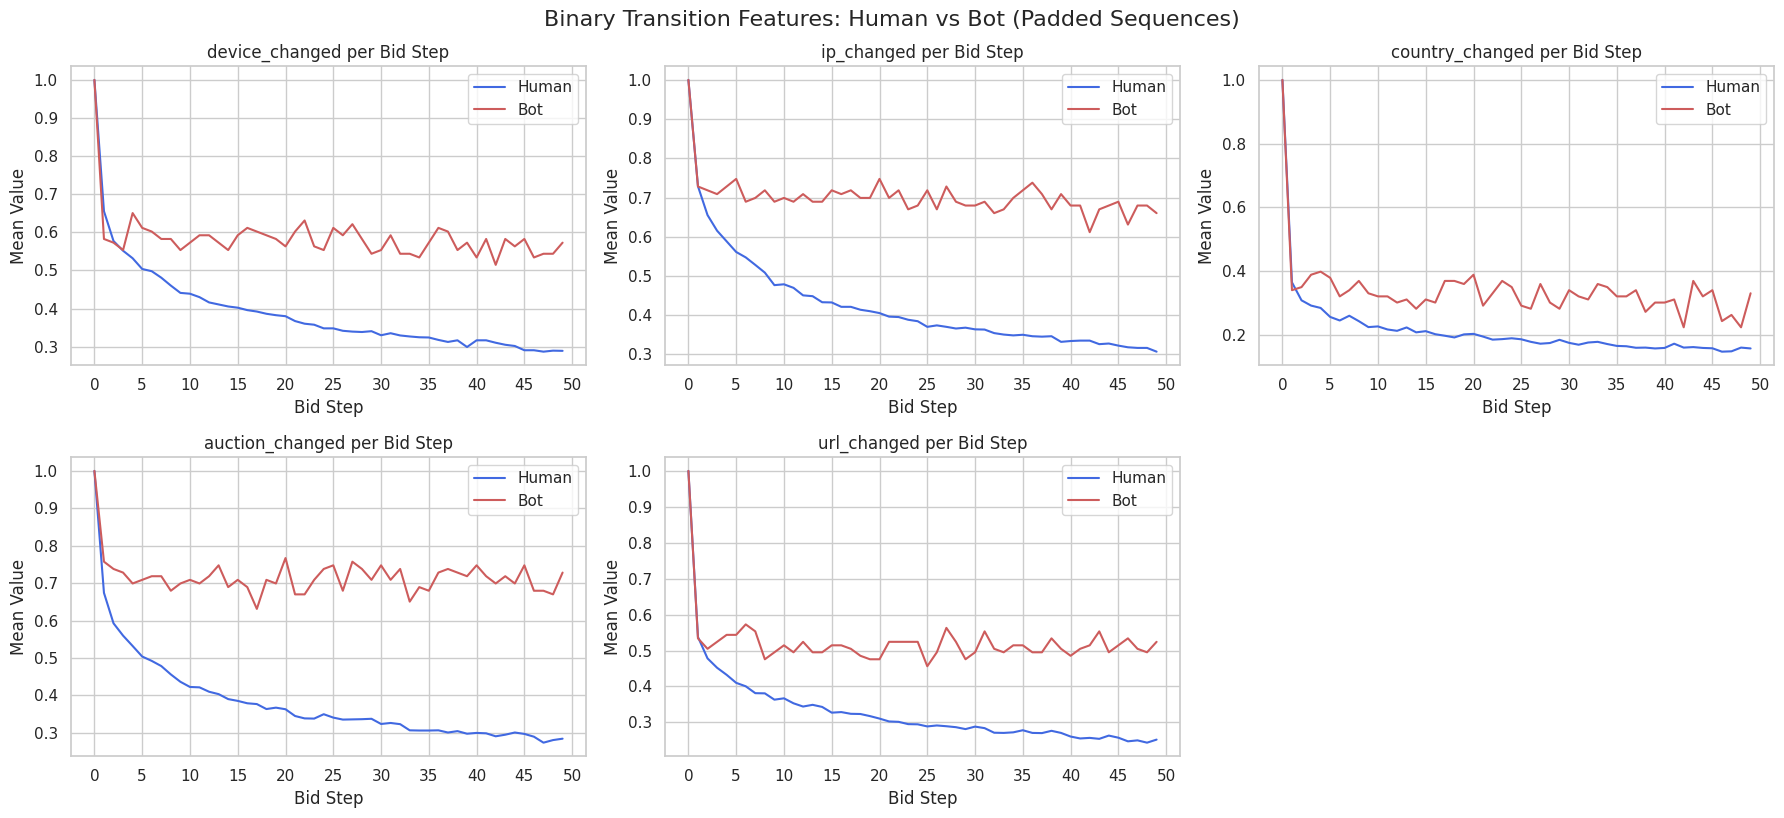

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# List of binary transition features
binary_features = [
    'device_changed', 'ip_changed', 'country_changed',
    'auction_changed', 'url_changed'
]

# Sequence padding length
max_len = 50

# Prepare bidder labels (ensure consistent order)
bidder_labels = auction_df.drop_duplicates('bidder_id').set_index('bidder_id')['outcome']

# Set up plot layout
n_cols = 3
n_rows = (len(binary_features) + 1) // n_cols
plt.figure(figsize=(n_cols * 6, n_rows * 4))

# Loop through each feature and plot
for i, feat in enumerate(binary_features):
    seqs = bids_seq_df.groupby('bidder_id')[feat].apply(list)
    padded = pad_sequences(seqs.tolist(), maxlen=max_len, padding='post', truncating='post')
    labels = bidder_labels.loc[seqs.index].values

    bots_mean = padded[labels == 1].mean(axis=0)
    humans_mean = padded[labels == 0].mean(axis=0)

    plt.subplot(n_rows, n_cols, i + 1)
    plt.plot(humans_mean, label='Human', color='royalblue')
    plt.plot(bots_mean, label='Bot', color='indianred')
    plt.title(f"{feat} per Bid Step")
    plt.xlabel("Bid Step")
    plt.ylabel("Mean Value")
    plt.xticks(range(0, max_len + 1, 5))
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.suptitle("Binary Transition Features: Human vs Bot (Padded Sequences)", y=1.02, fontsize=16)
plt.show()

#5. Model Training and Evaluation


## MLP Model

In [ ]:
#MLP model
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report, roc_auc_score

In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/DL Data/mlp_features.csv'
features_mlp = pd.read_csv(file_path)

In [ ]:
# Prepare features and labels
X = features_mlp.drop(columns=['bidder_id', 'outcome'])
y = features_mlp['outcome']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Create datasets
train_dataset = TensorDataset(torch.tensor(X_train_scaled, dtype=torch.float32),
                              torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1))

# Compute sample weights for oversampling
train_labels = y_train.values.astype(int)
class_counts = np.bincount(train_labels)
class_weights = 1. / class_counts
sample_weights = class_weights[train_labels]

# Create sampler
sampler = WeightedRandomSampler(sample_weights, len(sample_weights), replacement=True)

# DataLoader with sampler
train_loader = DataLoader(train_dataset, batch_size=64, sampler=sampler)
val_loader = DataLoader(TensorDataset(torch.tensor(X_val_scaled, dtype=torch.float32),
                        torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)), batch_size=64)

In [ ]:
# Calculate class weights
count_0 = (y_train == 0).sum()
count_1 = (y_train == 1).sum()
pos_weight = torch.tensor([count_0 / count_1], dtype=torch.float32)

# Define the MLP model
class MLPClassifier(nn.Module):
    def __init__(self, input_dim):
        super(MLPClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 1)  # Output logits
        )

    def forward(self, x):
        return self.model(x)

# Initialize model, loss, and optimizer
mlp_model = MLPClassifier(X_train.shape[1])
optimizer = torch.optim.AdamW(mlp_model.parameters(), lr=0.001, weight_decay=1e-4)

In [ ]:
class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets):
        BCE_loss = nn.functional.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.exp(-BCE_loss)
        loss = self.alpha * (1 - pt)**self.gamma * BCE_loss
        return loss.mean()

# criterion with FocalLoss (adjust alpha if needed)
criterion = FocalLoss(alpha=pos_weight.item(), gamma=2)

In [ ]:
mlp_model.train()
best_val_loss = float('inf')
patience = 5
trigger_times = 0

for epoch in range(50):
    total_loss = 0
    mlp_model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = mlp_model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    # Validation
    mlp_model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_val_batch, y_val_batch in val_loader:
            outputs_val = mlp_model(X_val_batch)
            loss_val = criterion(outputs_val, y_val_batch)
            val_loss += loss_val.item()

    avg_val_loss = val_loss / len(val_loader)
    print(f"Epoch {epoch+1}, Train Loss: {total_loss/len(train_loader):.4f}, Val Loss: {avg_val_loss:.4f}")

    # Early stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        trigger_times = 0
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping!")
            break

Epoch 1, Train Loss: 3.4618, Val Loss: 2.2981
Epoch 2, Train Loss: 2.5526, Val Loss: 2.3529
Epoch 3, Train Loss: 2.3150, Val Loss: 2.1335
Epoch 4, Train Loss: 2.1747, Val Loss: 1.8770
Epoch 5, Train Loss: 1.9336, Val Loss: 2.3535
Epoch 6, Train Loss: 1.9931, Val Loss: 2.1296
Epoch 7, Train Loss: 2.0187, Val Loss: 1.9394
Epoch 8, Train Loss: 1.9712, Val Loss: 2.2972
Epoch 9, Train Loss: 1.8172, Val Loss: 2.1769
Early stopping!


In [ ]:
mlp_model.eval()
with torch.no_grad():
    logits = mlp_model(torch.tensor(X_val_scaled, dtype=torch.float32))
    pred_probs = torch.sigmoid(logits).numpy()

# Find optimal threshold
thresholds = np.linspace(0.1, 0.5, 50)
best_f1 = 0
best_thresh = 0.5

for thresh in thresholds:
    preds = (pred_probs > thresh).astype(int)
    f1 = f1_score(y_val, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = thresh

print(f"Best Threshold: {best_thresh:.3f}, Best F1: {best_f1:.3f}")
preds_binary = (pred_probs > best_thresh).astype(int)
print(classification_report(y_val, preds_binary))
print("AUC-ROC:", roc_auc_score(y_val, pred_probs))

Best Threshold: 0.500, Best F1: 0.407
              precision    recall  f1-score   support

         0.0       0.98      0.84      0.91       369
         1.0       0.28      0.79      0.41        28

    accuracy                           0.84       397
   macro avg       0.63      0.81      0.66       397
weighted avg       0.93      0.84      0.87       397

AUC-ROC: 0.8987127371273712


## LSTM Model

In [ ]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Masking, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler # Import StandardScaler
import os

# Define the seed for reproducibility
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# Load your data
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Colab Notebooks/DL Data/lstm_features.csv'
lstm_data = pd.read_csv(file_path)

lstm_features = [
    'time_diff', 'hour_sin', 'hour_cos', 'device_changed', 'ip_changed',
    'country_changed', 'auction_changed', 'url_changed', 'bid_density', 'device_freq'
]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
lstm_data.head()

bidder_id  time_diff  hour_sin  hour_cos  \
0  001068c415025a009fee375a12cff4fcnht8y  -2.247182  0.500000 -0.866025   
1  0030a2dd87ad2733e0873062e4f83954mkj86  -2.247182  0.866025 -0.500000   
2  00a0517965f18610417ee784a05f494d4dw6e  -2.247182  0.866025 -0.500000   
3  00a0517965f18610417ee784a05f494d4dw6e   1.415477  0.707107 -0.707107   
4  00a0517965f18610417ee784a05f494d4dw6e   1.127828  0.707107 -0.707107   

   device_changed  ip_changed  country_changed  auction_changed  url_changed  \
0               1           1                1                1            1   
1               1           1                1                1            1   
2               1           1                1                1            1   
3               1           1                1                1            1   
4               1           1                1                1            1   

   bid_density  device_freq  outcome  
0    -0.647000     8.343514      0.0  
1    -0.647000     8.343514      0.0  
2    -0.647000    -0.281689      0.0  
3    -0.646854    -0.281689      0.0  
4    -0.646804    -0.219638      0.0

In [ ]:
# Group bids into sequences per bidder
lstm_sequences = lstm_data.groupby('bidder_id')[lstm_features].apply(lambda x: x.values.tolist())


In [ ]:
# Create outcome labels per bidder (same order as sequences)
y_lstm = lstm_data.groupby('bidder_id')['outcome'].first().reindex(lstm_sequences.index).values


In [ ]:
# Pad sequences to fixed length
max_seq_len = 100 # Keep consistent or tune if necessary
X_lstm_raw = pad_sequences(
    lstm_sequences.tolist(),
    maxlen=max_seq_len,
    padding='post',
    dtype='float32'
)

print(f"Original X_lstm shape: {X_lstm_raw.shape}")
print(f"Original y_lstm shape: {y_lstm.shape}")

Original X_lstm shape: (1983, 100, 10)
Original y_lstm shape: (1983,)


In [ ]:
# Feature Scaling (StandardScaler)
# Flatten X_lstm_raw to apply StandardScaler, then reshape back
num_bidders, seq_len, num_features = X_lstm_raw.shape
X_lstm_reshaped = X_lstm_raw.reshape(-1, num_features) # Reshape to (num_bidders * seq_len, num_features)

scaler = StandardScaler()
X_lstm_scaled = scaler.fit_transform(X_lstm_reshaped)

# Reshape back to original 3D shape
X_lstm = X_lstm_scaled.reshape(num_bidders, seq_len, num_features)

print(f"Scaled X_lstm shape: {X_lstm.shape} (num_bidders, seq_len, num_features)")


Scaled X_lstm shape: (1983, 100, 10) (num_bidders, seq_len, num_features)


In [ ]:
# Split Data
X_lstm_trainval, X_lstm_test, y_lstm_trainval, y_lstm_test = train_test_split(
    X_lstm, y_lstm, test_size=0.2, random_state=seed, stratify=y_lstm
)
X_lstm_train, X_lstm_val, y_lstm_train, y_lstm_val = train_test_split(
    X_lstm_trainval, y_lstm_trainval, test_size=0.1, random_state=seed, stratify=y_lstm_trainval
)

print(f"Train set size: {X_lstm_train.shape[0]} samples")
print(f"Validation set size: {X_lstm_val.shape[0]} samples")
print(f"Test set size: {X_lstm_test.shape[0]} samples")


Train set size: 1427 samples
Validation set size: 159 samples
Test set size: 397 samples


In [ ]:
# Compute class weights to handle imbalance
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_lstm_train),
    y=y_lstm_train
)
class_weights = dict(enumerate(class_weights))
print(f"Computed class weights: {class_weights}")


Computed class weights: {0: np.float64(0.5273466371027347), 1: np.float64(9.641891891891891)}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Masking, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

# Build BiLSTM model
model = Sequential([
    Input(shape=(X_lstm.shape[1], X_lstm.shape[2])),
    Masking(mask_value=0.0), # Masking layer to ignore padded zeros
    Bidirectional(LSTM(128, return_sequences=True)), # Increased units
    BatchNormalization(), # Added BatchNormalization
    Dropout(0.5), # Adjusted dropout
    Bidirectional(LSTM(64)), # Increased units
    BatchNormalization(), # Added BatchNormalization
    Dropout(0.5), # Adjusted dropout
    Dense(64, activation='relu'), # Increased units
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])


# Compile model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking (Masking)               │ (None, 100, 10)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 100, 256)       │       142,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 316,545 (1.21 MB)

 Trainable params: 315,777 (1.20 MB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:
# Train model
early_stop = EarlyStopping(patience=7, restore_best_weights=True)

# ModelCheckpoint to save the best model weights based on validation loss
model_checkpoint = ModelCheckpoint(
    'best_lstm_model.keras', # .keras is the recommended format
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

history = model.fit(
    X_lstm_train, y_lstm_train,
    epochs=50, # Increased max epochs, EarlyStopping will manage
    batch_size=64, # Experiment with batch size
    validation_data=(X_lstm_val, y_lstm_val),
    class_weight=class_weights,
    callbacks=[early_stop, model_checkpoint]
)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1523 - loss: 1.2124
Epoch 1: val_loss improved from inf to 0.57096, saving model to best_lstm_model.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.1555 - loss: 1.2085 - val_accuracy: 0.9308 - val_loss: 0.5710
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 915ms/step - accuracy: 0.3962 - loss: 0.8188
Epoch 2: val_loss improved from 0.57096 to 0.44986, saving model to best_lstm_model.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 23s 961ms/step - accuracy: 0.3995 - loss: 0.8160 - val_accuracy: 0.9560 - val_loss: 0.4499
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 913ms/step - accuracy: 0.6185 - loss: 0.6879
Epoch 3: val_loss improved from 0.44986 to 0.39682, saving model to best_lstm_model.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 950ms/step - accuracy: 0.6194 - loss: 0.6857 - val_accuracy: 0.9560 - val_loss: 0.3968
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 935ms/step - accuracy: 0.6633 - loss: 0.5668
Epoch 4: val_loss improved from 0.39682 to

In [ ]:
y_pred_val_probs = model.predict(X_lstm_val)
best_thresh = 0.5
best_f1 = 0

# More granular search for threshold
for t in np.arange(0.01, 0.99, 0.01):
    preds = (y_pred_val_probs >= t).astype(int)
    # Ensure y_lstm_val and preds have matching shapes for f1_score
    if len(np.unique(preds)) > 1: # Check if both classes are present in predictions
        f1 = f1_score(y_lstm_val, preds)
        if f1 > best_f1:
            best_thresh = t
            best_f1 = f1

print(f"\nBest threshold on validation set: {best_thresh:.2f} with F1: {best_f1:.4f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 461ms/step

Best threshold on validation set: 0.27 with F1: 0.4762


In [ ]:
# Evaluate Model on Test Set
y_pred_test_probs = model.predict(X_lstm_test)
y_pred_test = (y_pred_test_probs >= best_thresh).astype(int)

print("\n--- Test Set Evaluation ---")
print("\nClassification Report:")
print(classification_report(y_lstm_test, y_pred_test))
print("\nConfusion Matrix:")
print(confusion_matrix(y_lstm_test, y_pred_test))
print("\nROC AUC Score:")
print(roc_auc_score(y_lstm_test, y_pred_test_probs))

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step

--- Test Set Evaluation ---

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95       376
         1.0       0.35      0.67      0.46        21

    accuracy                           0.92       397
   macro avg       0.67      0.80      0.71       397
weighted avg       0.95      0.92      0.93       397


Confusion Matrix:
[[350  26]
 [  7  14]]

ROC AUC Score:
0.9081813576494426


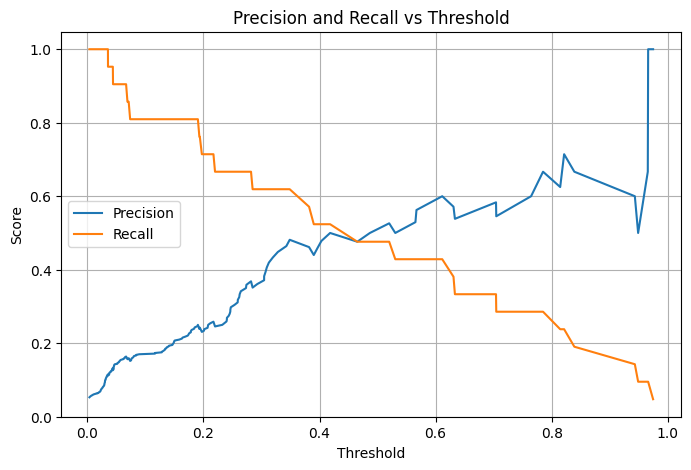

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Corrected variable name
precision, recall, thresholds = precision_recall_curve(y_lstm_test, y_pred_test_probs)

plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

## MLP - LSTM Hybrid Model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import random
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_fscore_support
from sklearn.neighbors import NearestNeighbors
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from datetime import datetime
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/DL Data/lstm_features.csv'
lstm_data = pd.read_csv(file_path)

file_path = '/content/drive/My Drive/Colab Notebooks/DL Data/mlp_features.csv'
features_mlp = pd.read_csv(file_path)

In [ ]:
print("LSTM raw data shape:", lstm_data.shape)
print("Unique bidder_id in LSTM data:", lstm_data['bidder_id'].nunique())

print("MLP features shape:", features_mlp.shape)
print("Unique bidder_id in MLP data:", features_mlp['bidder_id'].nunique())


LSTM raw data shape: (3068523, 12)
Unique bidder_id in LSTM data: 1983
MLP features shape: (1983, 25)
Unique bidder_id in MLP data: 1983


In [ ]:
class HybridMLP_LSTM(nn.Module):
    """
    Hybrid deep learning architecture combining LSTM and MLP for bot detection
    in online auctions. LSTM processes sequential bidding patterns while MLP
    handles aggregated statistical features.
    """

    def __init__(self,
                 sequence_input_size,  # Number of sequential features
                 statistical_input_size,  # Number of statistical features
                 lstm_hidden_size=128,
                 lstm_num_layers=2,
                 mlp_hidden_sizes=[256, 128, 64],
                 dropout_rate=0.3,
                 num_classes=2):  # Binary classification: human vs bot

        super(HybridMLP_LSTM, self).__init__()

        # LSTM branch for sequential patterns
        self.lstm = nn.LSTM(
            input_size=sequence_input_size,
            hidden_size=lstm_hidden_size,
            num_layers=lstm_num_layers,
            batch_first=True,
            dropout=dropout_rate if lstm_num_layers > 1 else 0,
            bidirectional=True
        )

        # Attention mechanism
        self.attention = MultiHeadAttention(
            hidden_size=lstm_hidden_size * 2,  # bidirectional
            num_heads=4,
            dropout_rate=dropout_rate
        )

        # Calculate LSTM output size (bidirectional doubles the hidden size)
        lstm_output_size = lstm_hidden_size * 2

        # MLP branch for statistical features
        mlp_layers = []
        prev_size = statistical_input_size

        for hidden_size in mlp_hidden_sizes:
            mlp_layers.extend([
                nn.Linear(prev_size, hidden_size),
                nn.BatchNorm1d(hidden_size),
                nn.ReLU(),
                nn.Dropout(dropout_rate)
            ])
            prev_size = hidden_size

        self.mlp = nn.Sequential(*mlp_layers)

        # Fusion layer - combines LSTM and MLP outputs
        fusion_input_size = lstm_output_size + prev_size
        self.fusion_layer = nn.Sequential(
            nn.Linear(fusion_input_size, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(64, num_classes)
        )

    def forward(self, sequence_input, statistical_input):
        """
        Forward pass through the hybrid model
        """
        lstm_out, (hidden, cell) = self.lstm(sequence_input)

        # Use the last hidden state from both directions
        lstm_features = self.attention(lstm_out)
        mlp_features = self.mlp(statistical_input)

        # Concatenate features from both branches
        combined_features = torch.cat([lstm_features, mlp_features], dim=1)

        # Final classification
        output = self.fusion_layer(combined_features)

        return output


In [ ]:
class MultiHeadAttention(nn.Module):
    """Multi-head attention mechanism for LSTM outputs"""

    def __init__(self, hidden_size, num_heads=4, dropout_rate=0.3):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.head_dim = hidden_size // num_heads

        assert hidden_size % num_heads == 0, "hidden_size must be divisible by num_heads"

        self.query = nn.Linear(hidden_size, hidden_size)
        self.key = nn.Linear(hidden_size, hidden_size)
        self.value = nn.Linear(hidden_size, hidden_size)
        self.dropout = nn.Dropout(dropout_rate)
        self.output_projection = nn.Linear(hidden_size, hidden_size)

    def forward(self, lstm_out, return_weights=False):
        batch_size, seq_len, hidden_size = lstm_out.shape

        # Generate Q, K, V
        Q = self.query(lstm_out).view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)
        K = self.key(lstm_out).view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)
        V = self.value(lstm_out).view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)

        # Attention scores
        scores = torch.matmul(Q, K.transpose(-2, -1)) / np.sqrt(self.head_dim)
        attention_weights = F.softmax(scores, dim=-1)
        attention_weights = self.dropout(attention_weights)

        # Apply attention
        context = torch.matmul(attention_weights, V)
        context = context.transpose(1, 2).contiguous().view(batch_size, seq_len, hidden_size)

        # Global pooling (mean over sequence length)
        context = torch.mean(context, dim=1)

        # Final projection
        output = self.output_projection(context)

        if return_weights:
            return output, attention_weights.mean(dim=1)  # Average over heads
        return output

In [ ]:
class AuctionDataset(Dataset):
    """
    Dataset class for auction bidding data
    """

    def __init__(self, sequence_data, statistical_data, labels):
        """
        Args:
            sequence_data: numpy array of shape (n_samples, seq_len, seq_features)
            statistical_data: numpy array of shape (n_samples, stat_features)
            labels: numpy array of shape (n_samples,)
        """
        self.sequence_data = torch.FloatTensor(sequence_data)
        self.statistical_data = torch.FloatTensor(statistical_data)
        if labels is not None:
            self.labels = torch.LongTensor(labels)
        else:
            self.labels = None

    def __len__(self):
        return len(self.sequence_data)

    def __getitem__(self, idx):
        if self.labels is not None:
            return self.sequence_data[idx], self.statistical_data[idx], self.labels[idx]
        else:
            return self.sequence_data[idx], self.statistical_data[idx]

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def prepare_lstm_sequences(df, max_sequence_length=100, is_test=False):
    """
    Convert LSTM data to sequences grouped by bidder_id
    """

    lstm_features = [
        'time_diff', 'hour_sin', 'hour_cos', 'device_changed', 'ip_changed',
        'country_changed', 'auction_changed', 'url_changed', 'bid_density', 'device_freq'
    ]

    # Group bids into sequences per bidder
    lstm_sequences = df.groupby('bidder_id')[lstm_features].apply(lambda x: x.values.tolist())

    # Create outcome labels per bidder (same order as sequences)
    labels = None
    if not is_test:
        labels = df.groupby('bidder_id')['outcome'].first().reindex(lstm_sequences.index).values

    # Pad sequences to fixed length
    padded_sequences = pad_sequences(
        lstm_sequences.tolist(),
        maxlen=max_sequence_length,
        padding='post',
        dtype='float32'
    )

    bidder_ids = lstm_sequences.index.tolist()

    return padded_sequences, bidder_ids, labels

In [ ]:
def prepare_mlp_features(features_mlp, is_test=False):
    """
    Prepares MLP features by excluding bidder_id and outcome columns
    """
    # Drop bidder_id and outcome to get feature columns
    feature_cols = [col for col in features_mlp.columns if col not in ['bidder_id', 'outcome']]

    # Select feature columns
    features = features_mlp[feature_cols].values
    bidder_ids = features_mlp['bidder_id'].tolist()

    labels = None
    if not is_test:
         labels = features_mlp['outcome'].values

    return features, bidder_ids, labels

In [ ]:
def align_datasets(lstm_sequences, lstm_bidder_ids, lstm_labels,
                  mlp_features, mlp_bidder_ids, mlp_labels):
    """
    Align LSTM and MLP datasets by bidder_id
    """
    # Ensure bidder_ids are numpy arrays for efficient indexing
    lstm_bidder_ids = np.array(lstm_bidder_ids)
    mlp_bidder_ids = np.array(mlp_bidder_ids)

    # Create mappings
    lstm_id_to_idx = {bid_id: i for i, bid_id in enumerate(lstm_bidder_ids)}
    mlp_id_to_idx = {bid_id: i for i, bid_id in enumerate(mlp_bidder_ids)}

    # Find common bidder_ids
    common_bidder_ids = sorted(list(set(lstm_id_to_idx.keys()) & set(mlp_id_to_idx.keys())))
    print(f"Found {len(common_bidder_ids)} common bidders between LSTM and MLP datasets.")

    # Align data
    aligned_sequences = []
    aligned_features = []
    aligned_labels = []
    aligned_bidder_ids = []

    for bid_id in common_bidder_ids:
        lstm_idx = lstm_id_to_idx[bid_id]
        mlp_idx = mlp_id_to_idx[bid_id]

        aligned_sequences.append(lstm_sequences[lstm_idx])
        aligned_features.append(mlp_features[mlp_idx])
        aligned_bidder_ids.append(bid_id)

        # Handle labels: only append if labels are provided (not None)
        if lstm_labels is not None and mlp_labels is not None:
            # Basic check if labels match, though typically they should for common IDs
            if lstm_labels[lstm_idx] != mlp_labels[mlp_idx]:
                 print(f"Warning: Labels mismatch for bidder {bid_id}. Using LSTM label.")
            aligned_labels.append(lstm_labels[lstm_idx]) # Or mlp_labels[mlp_idx]

    # Convert lists to numpy arrays
    aligned_sequences = np.array(aligned_sequences)
    aligned_features = np.array(aligned_features)
    aligned_bidder_ids = np.array(aligned_bidder_ids)

    # Convert labels to numpy array if any were collected, otherwise None
    if len(aligned_labels) > 0:
        aligned_labels = np.array(aligned_labels)
    else:
        aligned_labels = None # Ensure it's explicitly None if no labels were processed

    # Return aligned sequences, features, labels, and bidder IDs
    return aligned_sequences, aligned_features, aligned_labels, aligned_bidder_ids


In [ ]:
def smote_with_sequence_alignment(X_seq, X_feat, y, random_state=42):
    sm = SMOTE(k_neighbors=3, random_state=random_state)
    X_feat_res, y_res = sm.fit_resample(X_feat, y)

    n_original = len(X_feat)
    n_total = len(X_feat_res)
    n_synthetic = n_total - n_original

    if n_synthetic == 0:
        return X_seq, X_feat, y

    # Nearest neighbor search on original MLP features
    nn = NearestNeighbors(n_neighbors=1)
    nn.fit(X_feat)
    _, indices = nn.kneighbors(X_feat_res[n_original:])

    # Copy corresponding LSTM sequences
    X_seq_synthetic = X_seq[indices.flatten()]
    X_seq_res = np.concatenate([X_seq, X_seq_synthetic], axis=0)

    return X_seq_res, X_feat_res, y_res


In [ ]:
class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        # Support both scalar and per-class alpha
        if isinstance(alpha, (list, tuple)):
            self.alpha = torch.tensor(alpha, dtype=torch.float32)
        else:
            self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
        self.ce = nn.CrossEntropyLoss(reduction='none') # Per-sample loss

    def forward(self, inputs, targets):
        ce_loss = self.ce(inputs, targets)

        # Compute probability of the target class
        if inputs.dim() > 1 and inputs.shape[1] == 1: # Binary case with sigmoid output
             probs = torch.sigmoid(inputs.squeeze())
        else: # Multi-class or binary case with softmax output
             probs = F.softmax(inputs, dim=1)

        pt = probs.gather(1, targets.unsqueeze(1)).squeeze()


        # Calculate focal loss
        focal_loss = (1 - pt) ** self.gamma * ce_loss

        # Apply alpha weighting
        if isinstance(self.alpha, torch.Tensor):
            alpha_t = self.alpha.to(inputs.device).gather(0, targets)
            focal_loss = alpha_t * focal_loss
        else:
             focal_loss = self.alpha * focal_loss

        # Apply reduction
        if self.reduction == 'mean':
            return torch.mean(focal_loss)
        elif self.reduction == 'sum':
            return torch.sum(focal_loss)
        else: # reduction='none'
            return focal_loss

In [ ]:
class EarlyStopping:
    def __init__(self, patience=10, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = float('inf')
        self.early_stop = False

    def __call__(self, val_loss):
        # Check if validation loss improved
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

In [ ]:
def train_model_with_early_stopping(model, train_loader, val_loader,
                                     criterion, optimizer, num_epochs=50,
                                     patience=5):
    device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    early_stopping = EarlyStopping(patience=patience)
    train_losses, val_losses = [], []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0
        for seq, feat, labels in train_loader:
            optimizer.zero_grad()
            seq, feat, labels = seq.to(device), feat.to(device), labels.to(device)
            outputs = model(seq, feat)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for seq, feat, labels in val_loader:
                seq, feat, labels = seq.to(device), feat.to(device), labels.to(device)
                outputs = model(seq, feat)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

        early_stopping(avg_val_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered!")
            break

    return train_losses, val_losses

In [ ]:
def evaluate_model(model, test_loader, threshold=0.7):
    """
    Evaluate the model and return detailed metrics
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)

    model.eval()
    all_preds = []
    all_labels = []
    all_probs = []

    with torch.no_grad():
        for seq_batch, feat_batch, label_batch in test_loader:
            seq_batch = seq_batch.to(device)
            feat_batch = feat_batch.to(device)
            label_batch = label_batch.to(device)

            outputs = model(seq_batch, feat_batch)
            probs = torch.softmax(outputs, dim=1)
            bot_probs = probs[:, 1]
            preds = (bot_probs > threshold).long()

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(label_batch.cpu().numpy())
            all_probs.extend(bot_probs.cpu().numpy())

    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=["Human", "Bot"]))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'Bot'], yticklabels=['Human', 'Bot'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    auc_score = roc_auc_score(all_labels, all_probs)
    fpr, tpr, _ = roc_curve(all_labels, all_probs)

    print(f"\nAUC-ROC: {auc_score:.4f}")
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend()
    plt.grid(True)
    plt.show()

    best_thresh, metrics = find_best_threshold(all_labels, all_probs)

    return all_preds, all_labels, all_probs


In [ ]:
def find_best_threshold(y_true, prob_scores, plot=True):
    """
    Find the threshold that maximizes F1-score
    """
    thresholds = np.linspace(0.0, 1.0, 101)
    best_f1 = 0
    best_threshold = 0.5
    best_metrics = None

    f1_scores = []
    precisions = []
    recalls = []

    for t in thresholds:
        preds = (prob_scores > t).astype(int)
        precision, recall, f1, _ = precision_recall_fscore_support(y_true, preds, average='binary')

        f1_scores.append(f1)
        precisions.append(precision)
        recalls.append(recall)

        if f1 > best_f1:
            best_f1 = f1
            best_threshold = t
            best_metrics = (precision, recall, f1)

    if plot:
        plt.figure(figsize=(10, 6))
        plt.plot(thresholds, f1_scores, label='F1-score', color='blue')
        plt.plot(thresholds, precisions, label='Precision', color='green', linestyle='--')
        plt.plot(thresholds, recalls, label='Recall', color='red', linestyle='--')
        plt.axvline(x=best_threshold, color='black', linestyle=':')
        plt.xlabel('Threshold')
        plt.ylabel('Score')
        plt.title('Threshold vs Precision/Recall/F1')
        plt.legend()
        plt.grid(True)
        plt.show()

    print(f"Best Threshold: {best_threshold:.2f}")
    print(f"Precision: {best_metrics[0]:.4f}, Recall: {best_metrics[1]:.4f}, F1: {best_metrics[2]:.4f}")

    return best_threshold, best_metrics


In [ ]:
def run_bot_detection_pipeline(lstm_data, features_mlp, max_sequence_length=100,
                              test_size=0.2, random_state=42,
                              tuning_params=None):
    """
    Complete pipeline for bot detection using hybrid MLP-LSTM model with oversampling
    """
    # Extract model hyperparameters
    lstm_hidden_size = tuning_params.get("lstm_hidden_size", 128)
    lstm_num_layers = tuning_params.get("lstm_num_layers", 2)
    dropout_rate = tuning_params.get("dropout_rate", 0.3)
    mlp_hidden_1 = tuning_params.get("mlp_hidden_1", 256)
    mlp_hidden_2 = tuning_params.get("mlp_hidden_2", 128)
    learning_rate = tuning_params.get("learning_rate", 0.001)

    print("=== Bot Detection Pipeline with Imbalance Handling ===")
    print(f"LSTM data shape: {lstm_data.shape}")
    print(f"MLP features shape: {features_mlp.shape}")

    # Prepare LSTM sequences
    print("\n1. Preparing LSTM sequences...")
    lstm_sequences, lstm_bidder_ids, lstm_labels = prepare_lstm_sequences(
        lstm_data, max_sequence_length=max_sequence_length
    )

    # Prepare MLP features
    print("\n2. Preparing MLP features...")
    mlp_features, mlp_bidder_ids, mlp_labels = prepare_mlp_features(features_mlp)

    # Align datasets
    print("\n3. Aligning datasets...")
    aligned_sequences, aligned_features, aligned_labels, aligned_bidder_ids = align_datasets(
        lstm_sequences, lstm_bidder_ids, lstm_labels,
        mlp_features, mlp_bidder_ids, mlp_labels
    )

    print(f"Final aligned dataset size: {len(aligned_labels)}")
    print(f"Original class distribution: {np.bincount(aligned_labels.astype(int))}")

    # Split data first (test set should remain original distribution)
    print("\n4. Splitting data...")
    X_seq_train, X_seq_test, X_feat_train, X_feat_test, y_train, y_test = train_test_split(
        aligned_sequences, aligned_features, aligned_labels,
        test_size=test_size, random_state=random_state, stratify=aligned_labels
    )

    # Split training data into train and validation
    X_seq_train, X_seq_val, X_feat_train, X_feat_val, y_train, y_val = train_test_split(
        X_seq_train, X_feat_train, y_train,
        test_size=0.2, random_state=random_state, stratify=y_train
    )

    # Normalize MLP features before splitting
    print("\n5. Normalizing features...")
    scaler = StandardScaler()
    X_feat_train = scaler.fit_transform(X_feat_train)
    X_feat_val = scaler.transform(X_feat_val)
    X_feat_test = scaler.transform(X_feat_test)

    # Apply oversampling only to training data
    print(f"\n6. Applying smote oversampling to training data...")
    print("X_seq_train dtype:", X_seq_train.dtype)
    print("X_feat_train dtype:", X_feat_train.dtype)
    print("y_train dtype:", y_train.dtype)
    X_seq_train, X_feat_train, y_train = smote_with_sequence_alignment(
        X_seq_train, X_feat_train, y_train, random_state=random_state
    )

    print(f"Train size: {len(y_train)} (after oversampling)")
    print(f"Validation size: {len(y_val)}")
    print(f"Test size: {len(y_test)}")
    print(f"Train class distribution: {np.bincount(y_train.astype(np.int64))}")
    print(f"Validation class distribution: {np.bincount(y_val.astype(np.int64))}")
    print(f"Test class distribution: {np.bincount(y_test.astype(np.int64))}")


    # Create datasets and loaders
    train_dataset = AuctionDataset(X_seq_train, X_feat_train, y_train)
    val_dataset = AuctionDataset(X_seq_val, X_feat_val, y_val)
    test_dataset = AuctionDataset(X_seq_test, X_feat_test, y_test)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    # Initialize model
    print(f"\n7. Initializing model...")
    sequence_input_size = aligned_sequences.shape[2]
    statistical_input_size = aligned_features.shape[1]

    model = HybridMLP_LSTM(
        sequence_input_size=sequence_input_size,
        statistical_input_size=statistical_input_size,
        lstm_hidden_size=lstm_hidden_size,
        lstm_num_layers=lstm_num_layers,
        mlp_hidden_sizes=[mlp_hidden_1, mlp_hidden_2],
        dropout_rate=dropout_rate,
        num_classes=2
    )

    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Total parameters: {total_params:,}")
    print(f"Trainable parameters: {trainable_params:,}")

    # Train model
    print(f"\n8. Training model...")

    print("\nUsing FocalLoss with alpha")
    alpha = torch.tensor([1.0, 2.0])
    criterion = FocalLoss(alpha=alpha, gamma=2.0)

    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)
    train_losses, val_losses = train_model_with_early_stopping(
        model, train_loader, val_loader,
        criterion, optimizer,
        num_epochs=50,
        patience=5

    )

    # Evaluate model
    step_num = "9"
    print(f"\n{step_num}. Evaluating model...")
    predictions, true_labels, probabilities = evaluate_model(model, test_loader)

    return {
        'model': model,
        'scaler': scaler,
        'train_losses': train_losses,
        'val_losses': val_losses,
        'test_predictions': predictions,
        'test_labels': true_labels,
        'test_probabilities': probabilities
    }

In [ ]:
def set_seed(seed_value=42):
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value) # for multi-GPU setups
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False # Disable cuDNN's auto-tuner to ensure determinism

set_seed(42)

In [ ]:
# Optuna Hyperparameter Tuning for Hybrid MLP-LSTM Model with Best Model Saving
import optuna
# Global variable to store the best model
best_model_info = {
    'model': None,
    'scaler': None,
    'auc_score': 0.0,
    'params': None,
    'results': None
}

def objective(trial):
    global best_model_info

    lstm_hidden_size = trial.suggest_int('lstm_hidden_size', 32, 128)

    if lstm_hidden_size % 2 != 0:
        lstm_hidden_size += 1

    lstm_num_layers = trial.suggest_int('lstm_num_layers', 1, 3)
    mlp_hidden_1 = trial.suggest_int("mlp_hidden_1", 64, 512)
    mlp_hidden_2 = trial.suggest_int("mlp_hidden_2", 32, 128)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
    weight_decay = trial.suggest_float('weight_decay', 1e-6, 1e-4, log=True)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])
    epochs = trial.suggest_int('epochs', 10, 50)


    # Hyperparameters to tune
    tuning_params = {
        "lstm_hidden_size": lstm_hidden_size,
        "lstm_num_layers": lstm_num_layers,
        "dropout_rate": dropout_rate,
        "mlp_hidden_1": mlp_hidden_1,
        "mlp_hidden_2": mlp_hidden_2,
        "learning_rate": learning_rate,
        "batch_size": batch_size,
        "epochs": epochs
    }

    results = run_bot_detection_pipeline(
        lstm_data=lstm_data,
        features_mlp=features_mlp,
        tuning_params=tuning_params
    )

    y_true = results['test_labels']
    y_probs = np.array(results['test_probabilities'])
    # Handle different output probability shapes (sigmoid or softmax)
    if y_probs.ndim == 2 and y_probs.shape[1] == 2:
        # Softmax output → use column 1 (positive class)
        auc = roc_auc_score(y_true, y_probs[:, 1])
    elif y_probs.ndim == 1:
        # Sigmoid output → already positive class probability
         auc = roc_auc_score(y_true, y_probs)
    else:
        raise ValueError(f"Unexpected shape for y_probs: {y_probs.shape}. Expected 1D or 2D with 2 columns.")

    # Update best model if current AUC is better
    if auc > best_model_info['auc_score']:
        print(f"New best AUC found: {auc:.4f} (previous: {best_model_info['auc_score']:.4f})")
        best_model_info['model'] = results['model']
        best_model_info['scaler'] = results['scaler']
        best_model_info['auc_score'] = auc
        best_model_info['params'] = tuning_params.copy()
        best_model_info['results'] = results

    return auc

In [ ]:
def save_best_model(save_dir='/content/drive/My Drive/Colab Notebooks/DL Data/best_models'):
    """
    Save the best model found during optimization
    """
    if best_model_info['model'] is None:
        print("No model to save!")
        return

    # Create directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)

    # Create timestamp for unique filename
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

    # Save model state dict
    model_path = os.path.join(save_dir, f'best_model_{timestamp}.pth')
    torch.save({
        'model_state_dict': best_model_info['model'].state_dict(),
        'model_architecture': best_model_info['model'].__class__.__name__,
        'auc_score': best_model_info['auc_score'],
        'best_params': best_model_info['params']
    }, model_path)

    # Save scaler
    scaler_path = os.path.join(save_dir, f'best_scaler_{timestamp}.pkl')
    with open(scaler_path, 'wb') as f:
        pickle.dump(best_model_info['scaler'], f)

    # Save complete results and parameters
    results_path = os.path.join(save_dir, f'best_results_{timestamp}.pkl')
    with open(results_path, 'wb') as f:
        pickle.dump({
            'auc_score': best_model_info['auc_score'],
            'params': best_model_info['params'],
            'test_predictions': best_model_info['results']['test_predictions'],
            'test_labels': best_model_info['results']['test_labels'],
            'test_probabilities': best_model_info['results']['test_probabilities'],
            'train_losses': best_model_info['results']['train_losses'],
            'val_losses': best_model_info['results']['val_losses']
        }, f)

    print(f"Best model saved!")
    print(f"Model: {model_path}")
    print(f"Scaler: {scaler_path}")
    print(f"Results: {results_path}")
    print(f"Best AUC: {best_model_info['auc_score']:.4f}")
    print(f"Best parameters: {best_model_info['params']}")

In [ ]:
def load_best_model(model_path, scaler_path, model_class, seq_input_dim, stat_input_dim, num_classes=2):
    """
    Load a saved model
    """
    # Load model
    checkpoint = torch.load(model_path, weights_only=False, map_location=torch.device('cpu'))
    best_params = checkpoint['best_params']

    model = model_class(
        sequence_input_size=seq_input_dim,
        statistical_input_size=stat_input_dim,
        lstm_hidden_size=best_params['lstm_hidden_size'],
        lstm_num_layers=best_params['lstm_num_layers'],
        mlp_hidden_sizes=[best_params['mlp_hidden_1'], best_params['mlp_hidden_2']],
        dropout_rate=best_params['dropout_rate'],
        num_classes=num_classes
    )

    model.load_state_dict(checkpoint['model_state_dict'])

    # Load scaler
    with open(scaler_path, 'rb') as f:
        scaler = pickle.load(f)

    return model, scaler, checkpoint['auc_score'], checkpoint['best_params']

In [ ]:
def run_optimization(n_trials=50, save_dir='/content/drive/My Drive/Colab Notebooks/DL Data/best_models'):
    """
    Run Optuna optimization and save the best model
    """
    # Create study
    study = optuna.create_study(direction='maximize')

    print(f"Starting optimization with {n_trials} trials...")

    # Optimize
    study.optimize(objective, n_trials=n_trials)

    print("\nOptimization completed!")

    # Save the best model
    save_best_model(save_dir)

    return study, best_model_info

[I 2025-06-11 19:04:11,804] A new study created in memory with name: no-name-0dd308ba-d261-49d7-9610-9942817c010a


Starting optimization with 50 trials...
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 1,084,556
Trainable parameters: 1,084,556

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.1887, Val Loss: 0.1408
Epoch [2/50], Train Loss: 0.1933, Val Loss: 0.1

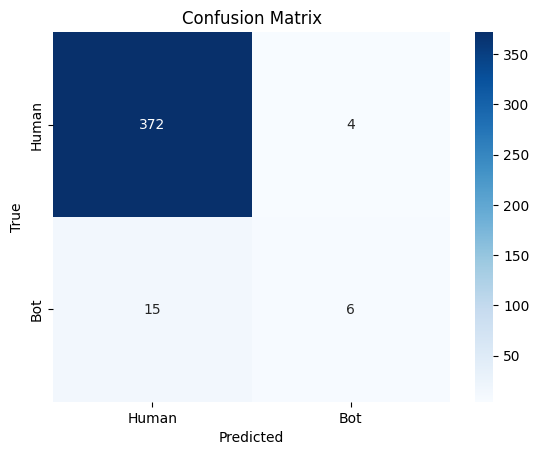


AUC-ROC: 0.8853


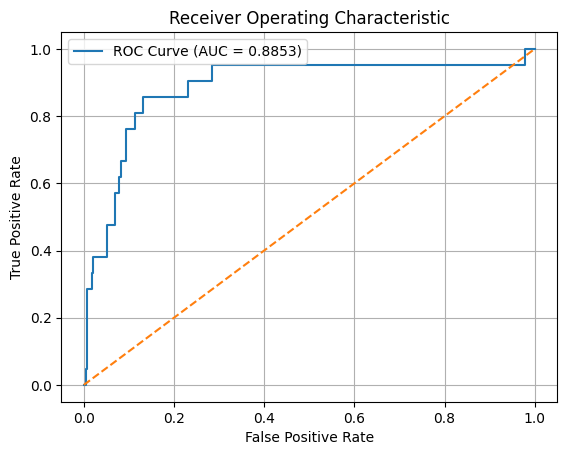

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

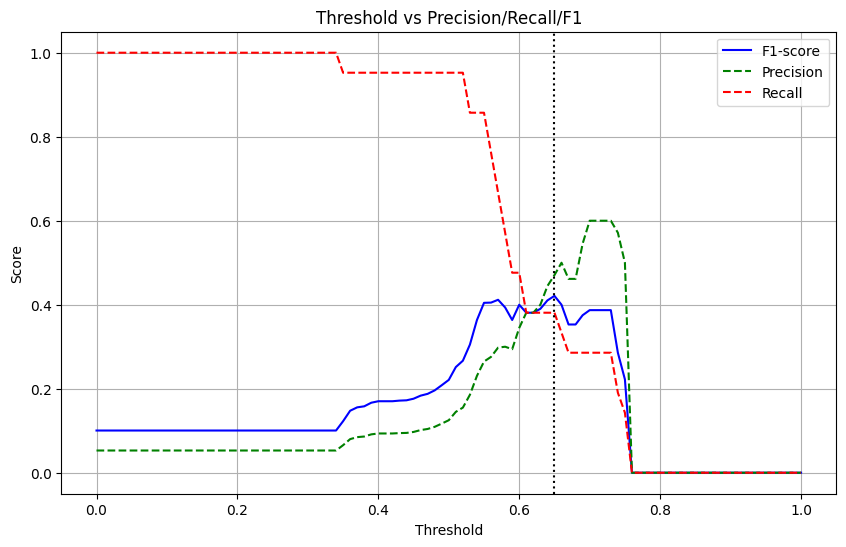

[I 2025-06-11 19:04:22,299] Trial 0 finished with value: 0.8852583586626139 and parameters: {'lstm_hidden_size': 118, 'lstm_num_layers': 3, 'mlp_hidden_1': 231, 'mlp_hidden_2': 58, 'dropout_rate': 0.4046912800258472, 'learning_rate': 0.0033838473832554414, 'weight_decay': 2.8690158282527145e-05, 'batch_size': 32, 'epochs': 15}. Best is trial 0 with value: 0.8852583586626139.


Best Threshold: 0.65
Precision: 0.4706, Recall: 0.3810, F1: 0.4211
New best AUC found: 0.8853 (previous: 0.0000)
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 364,352
Trainable parameters: 364,352

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2

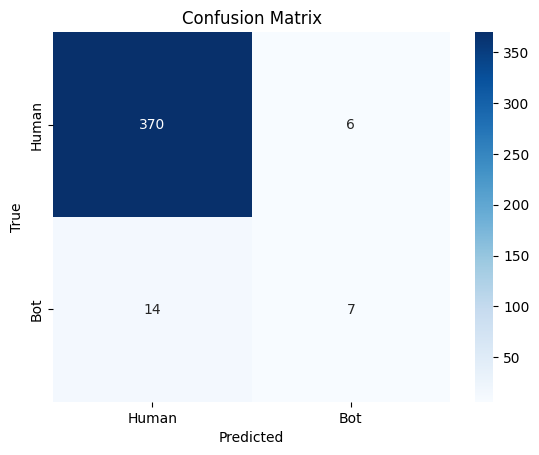


AUC-ROC: 0.8753


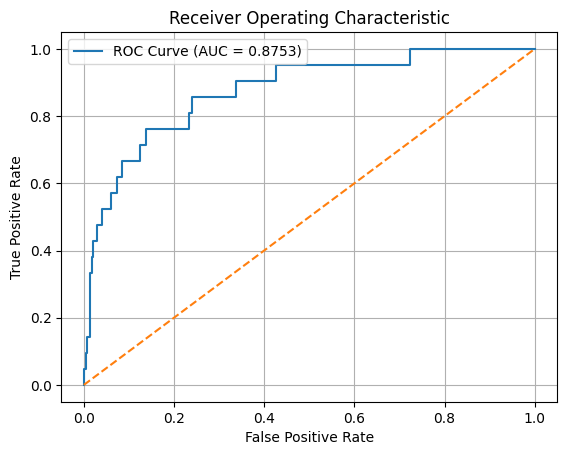

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

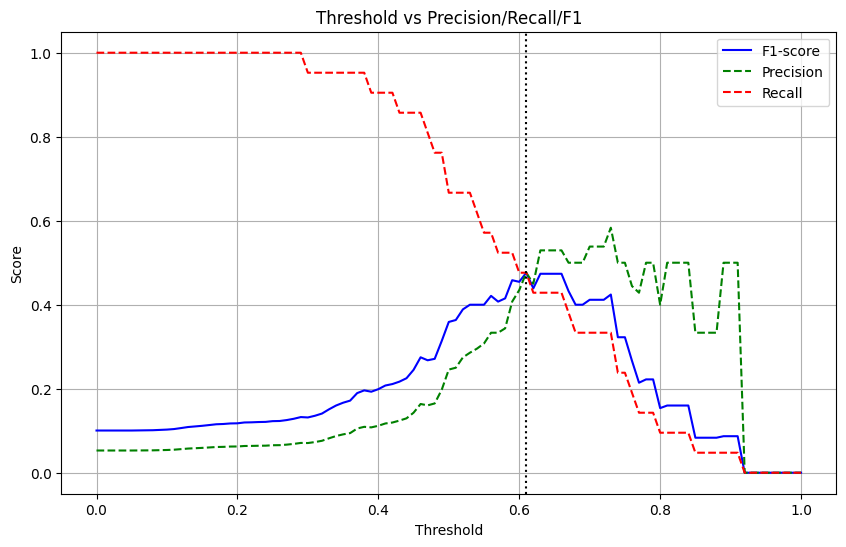

[I 2025-06-11 19:04:31,763] Trial 1 finished with value: 0.8752532928064843 and parameters: {'lstm_hidden_size': 108, 'lstm_num_layers': 1, 'mlp_hidden_1': 353, 'mlp_hidden_2': 57, 'dropout_rate': 0.34848903945916543, 'learning_rate': 0.00012620726388174594, 'weight_decay': 1.738071257726533e-05, 'batch_size': 128, 'epochs': 34}. Best is trial 0 with value: 0.8852583586626139.


Best Threshold: 0.61
Precision: 0.4762, Recall: 0.4762, F1: 0.4762
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 840,068
Trainable parameters: 840,068

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.1726, Val Loss: 0.1274
Epoch [2/50], Train Loss

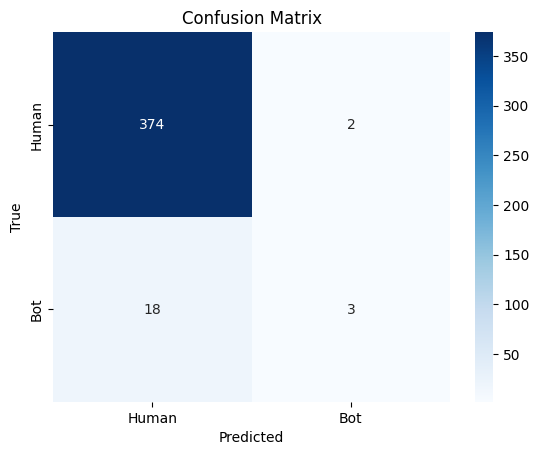


AUC-ROC: 0.7487


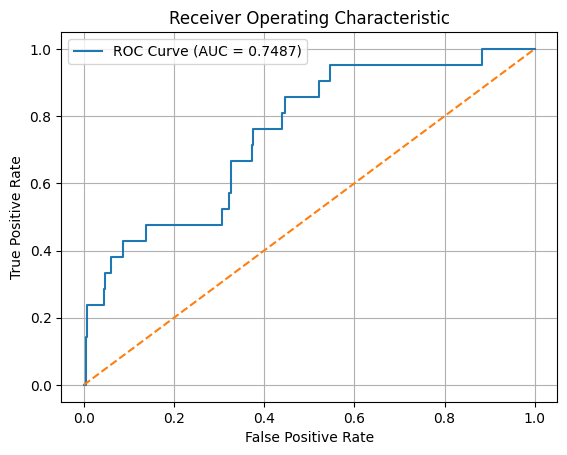

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

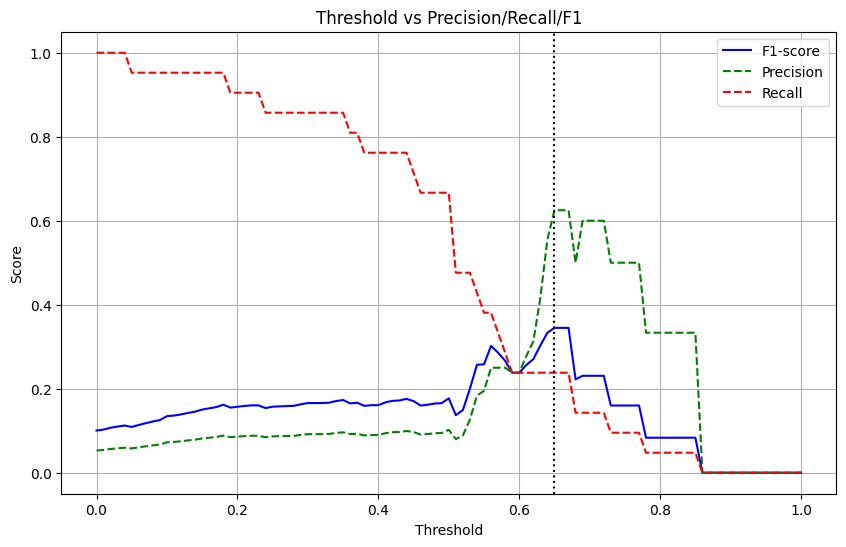

[I 2025-06-11 19:04:43,052] Trial 2 finished with value: 0.7487335359675784 and parameters: {'lstm_hidden_size': 122, 'lstm_num_layers': 2, 'mlp_hidden_1': 469, 'mlp_hidden_2': 98, 'dropout_rate': 0.31760974818725707, 'learning_rate': 0.003047117221084589, 'weight_decay': 3.8064395107481288e-06, 'batch_size': 32, 'epochs': 40}. Best is trial 0 with value: 0.8852583586626139.


Best Threshold: 0.65
Precision: 0.6250, Recall: 0.2381, F1: 0.3448
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 253,248
Trainable parameters: 253,248

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.1509, Val Loss: 0.1384
Epoch [2/50], Train Loss

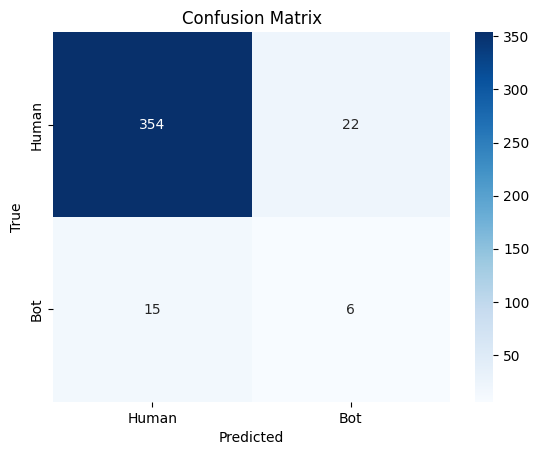


AUC-ROC: 0.8099


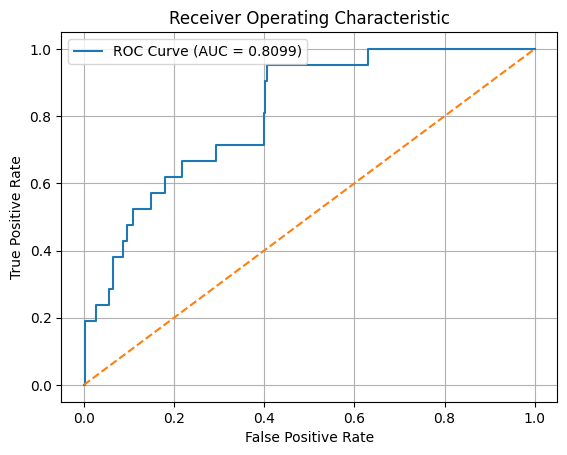

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


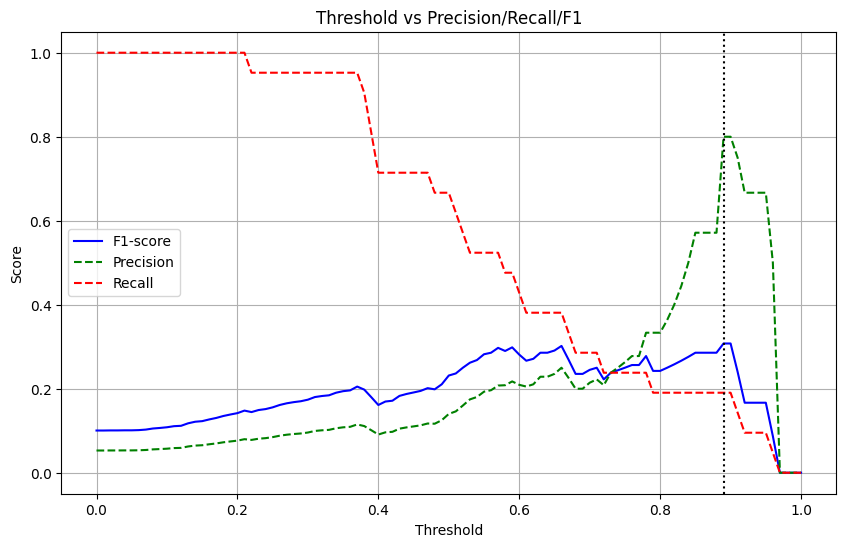

[I 2025-06-11 19:04:50,339] Trial 3 finished with value: 0.8099037487335359 and parameters: {'lstm_hidden_size': 77, 'lstm_num_layers': 1, 'mlp_hidden_1': 441, 'mlp_hidden_2': 103, 'dropout_rate': 0.18357451674081166, 'learning_rate': 0.0013574581153007188, 'weight_decay': 3.4196436425713724e-06, 'batch_size': 64, 'epochs': 15}. Best is trial 0 with value: 0.8852583586626139.


Best Threshold: 0.89
Precision: 0.8000, Recall: 0.1905, F1: 0.3077
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 118,846
Trainable parameters: 118,846

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2003, Val Loss: 0.2060
Epoch [2/50], Train Loss

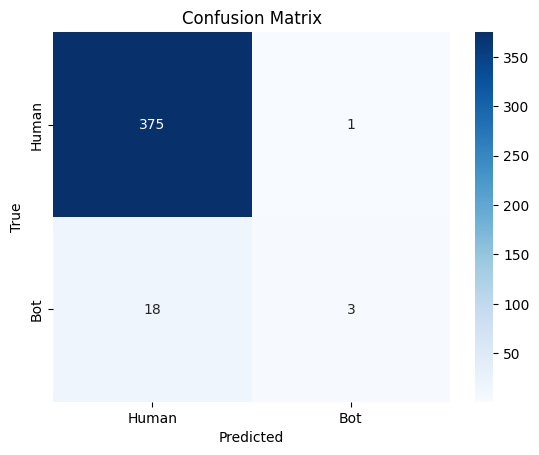


AUC-ROC: 0.8232


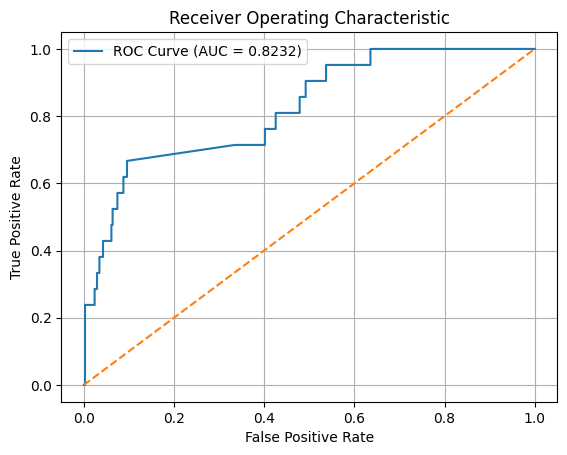

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

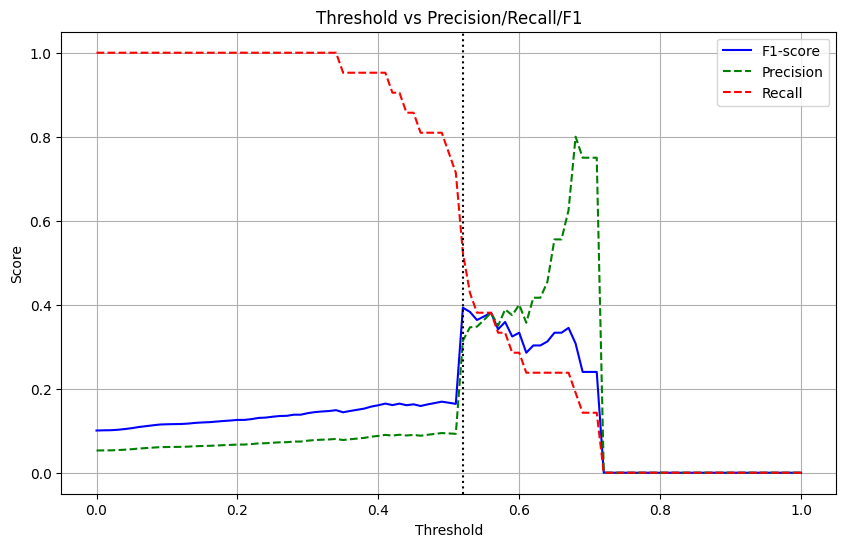

[I 2025-06-11 19:05:00,584] Trial 4 finished with value: 0.8232016210739614 and parameters: {'lstm_hidden_size': 38, 'lstm_num_layers': 2, 'mlp_hidden_1': 315, 'mlp_hidden_2': 41, 'dropout_rate': 0.4848754923332539, 'learning_rate': 0.00723651356297157, 'weight_decay': 5.590215589311609e-05, 'batch_size': 128, 'epochs': 34}. Best is trial 0 with value: 0.8852583586626139.


Best Threshold: 0.52
Precision: 0.3143, Recall: 0.5238, F1: 0.3929
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 149,530
Trainable parameters: 149,530

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2096, Val Loss: 0.1880
Epoch [2/50], Train Loss

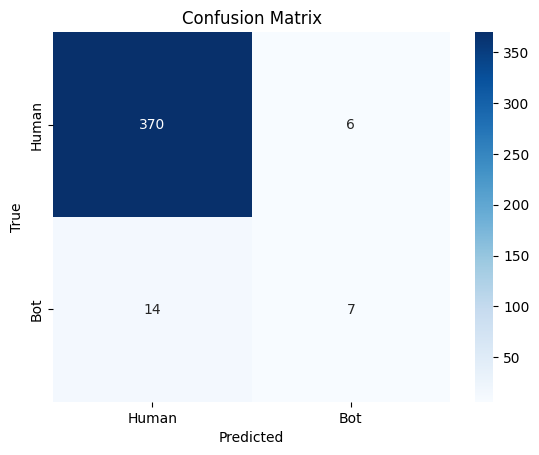


AUC-ROC: 0.9087


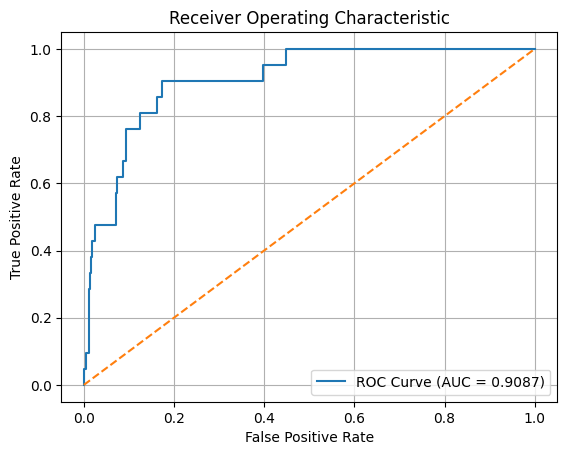

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

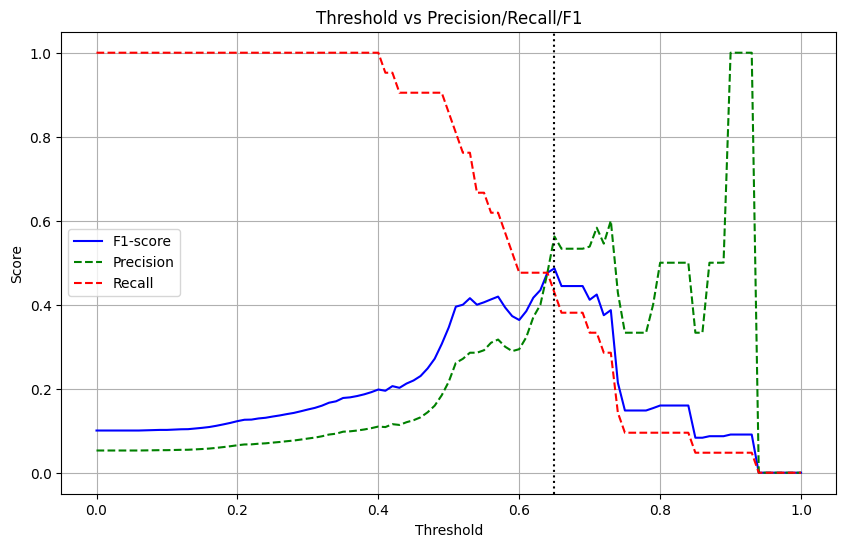

[I 2025-06-11 19:05:06,961] Trial 5 finished with value: 0.9086879432624113 and parameters: {'lstm_hidden_size': 60, 'lstm_num_layers': 1, 'mlp_hidden_1': 207, 'mlp_hidden_2': 81, 'dropout_rate': 0.4697101811484726, 'learning_rate': 0.001644943752485233, 'weight_decay': 2.8059441843955554e-05, 'batch_size': 128, 'epochs': 44}. Best is trial 5 with value: 0.9086879432624113.


Best Threshold: 0.65
Precision: 0.5625, Recall: 0.4286, F1: 0.4865
New best AUC found: 0.9087 (previous: 0.8853)
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 539,284
Trainable parameters: 539,284

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.1

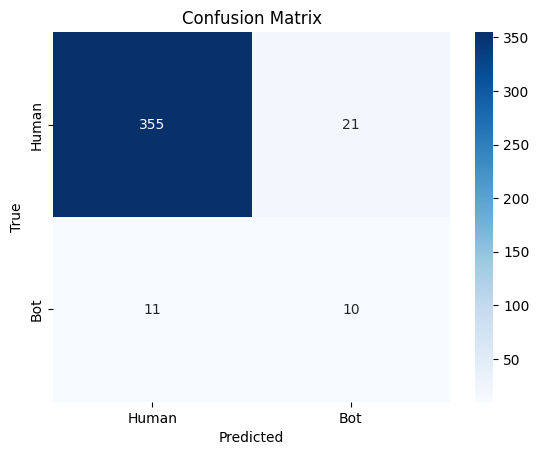


AUC-ROC: 0.7508


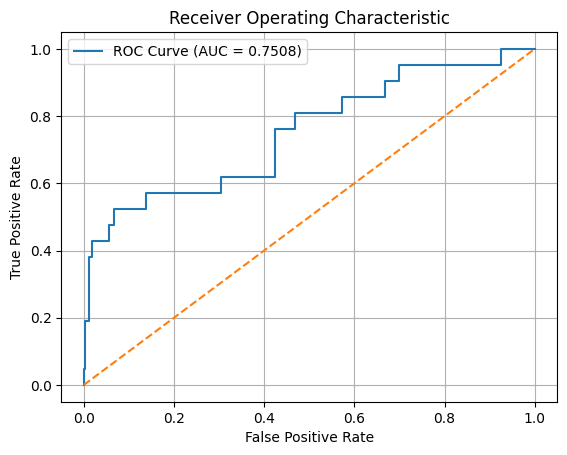

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

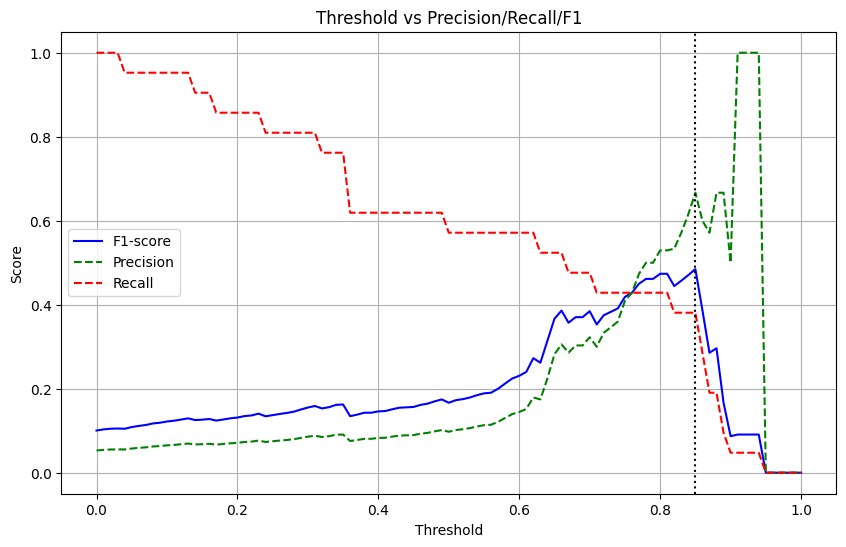

[I 2025-06-11 19:05:14,227] Trial 6 finished with value: 0.7507598784194528 and parameters: {'lstm_hidden_size': 80, 'lstm_num_layers': 3, 'mlp_hidden_1': 304, 'mlp_hidden_2': 70, 'dropout_rate': 0.14291372295218358, 'learning_rate': 0.0033360551501542906, 'weight_decay': 1.4476606524990319e-05, 'batch_size': 128, 'epochs': 32}. Best is trial 5 with value: 0.9086879432624113.


Best Threshold: 0.85
Precision: 0.6667, Recall: 0.3810, F1: 0.4848
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 497,908
Trainable parameters: 497,908

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.1949, Val Loss: 0.1797
Epoch [2/50], Train Loss

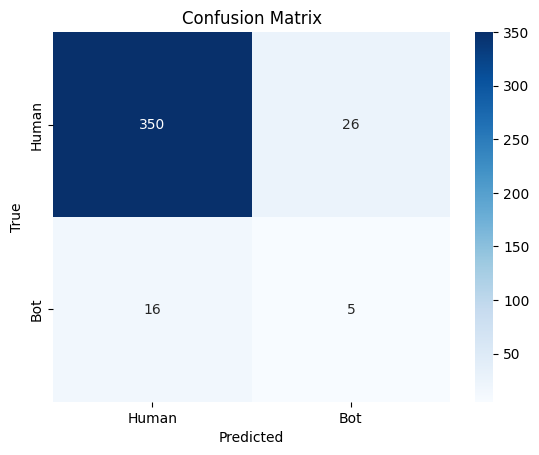


AUC-ROC: 0.8674


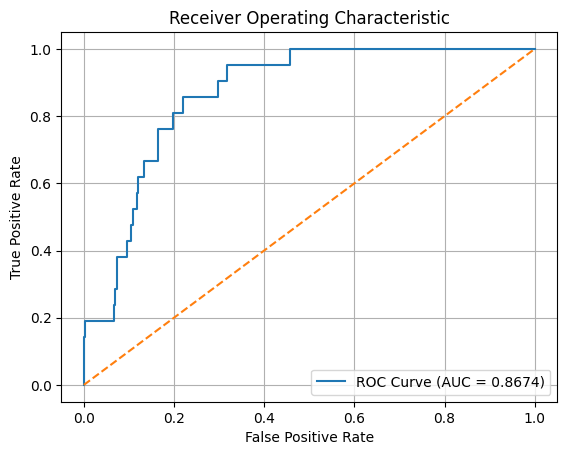

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

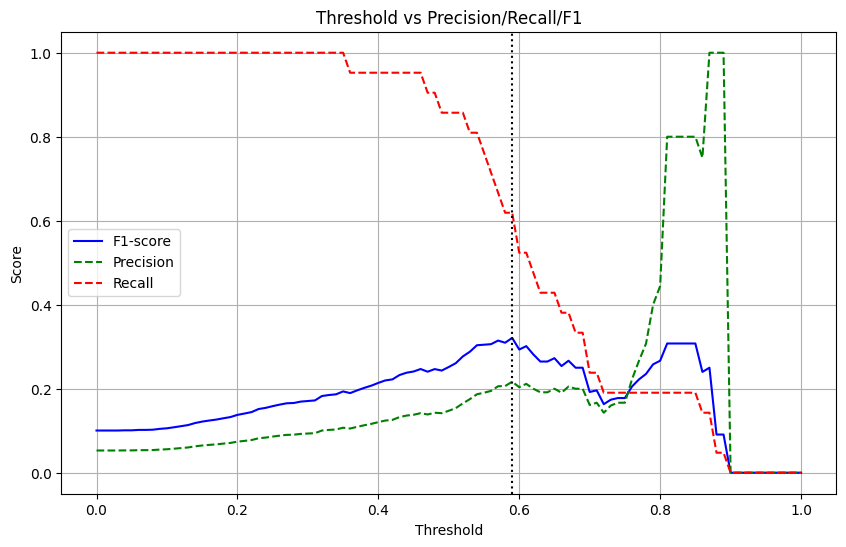

[I 2025-06-11 19:05:21,659] Trial 7 finished with value: 0.8674012158054711 and parameters: {'lstm_hidden_size': 128, 'lstm_num_layers': 1, 'mlp_hidden_1': 285, 'mlp_hidden_2': 102, 'dropout_rate': 0.1636750700760204, 'learning_rate': 0.00015480295640022117, 'weight_decay': 1.725376752483172e-05, 'batch_size': 32, 'epochs': 19}. Best is trial 5 with value: 0.9086879432624113.


Best Threshold: 0.59
Precision: 0.2167, Recall: 0.6190, F1: 0.3210
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 149,046
Trainable parameters: 149,046

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.1849, Val Loss: 0.1570
Epoch [2/50], Train Loss

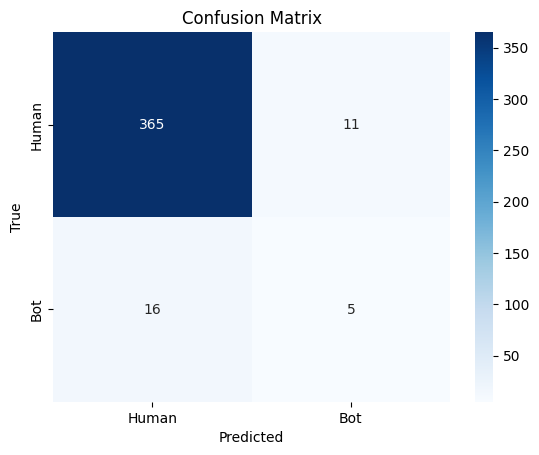


AUC-ROC: 0.7552


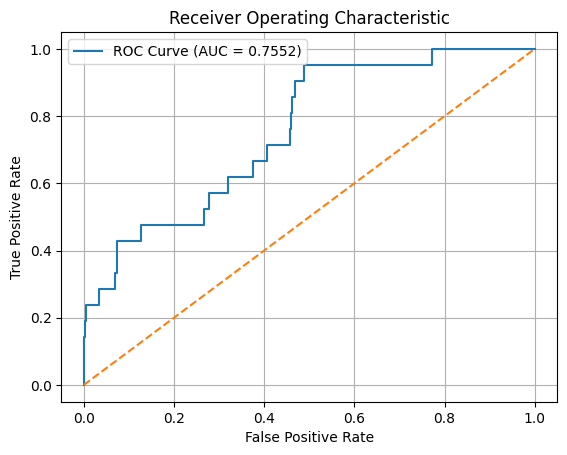

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

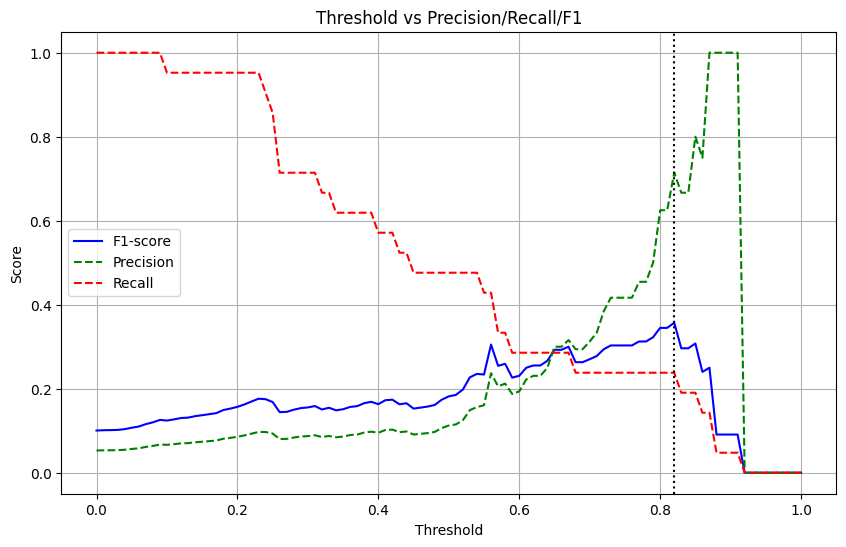

[I 2025-06-11 19:05:30,717] Trial 8 finished with value: 0.755192502532928 and parameters: {'lstm_hidden_size': 58, 'lstm_num_layers': 1, 'mlp_hidden_1': 382, 'mlp_hidden_2': 56, 'dropout_rate': 0.19052178557550806, 'learning_rate': 0.0003817086489209588, 'weight_decay': 5.3374939600733143e-05, 'batch_size': 64, 'epochs': 33}. Best is trial 5 with value: 0.9086879432624113.


Best Threshold: 0.82
Precision: 0.7143, Recall: 0.2381, F1: 0.3571
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 441,760
Trainable parameters: 441,760

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.1800, Val Loss: 0.0800
Epoch [2/50], Train Loss

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


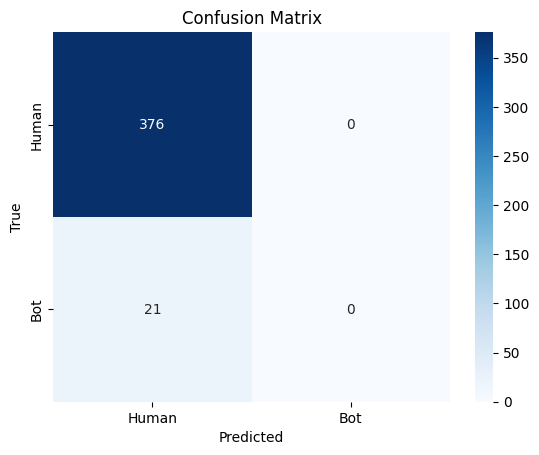


AUC-ROC: 0.6883


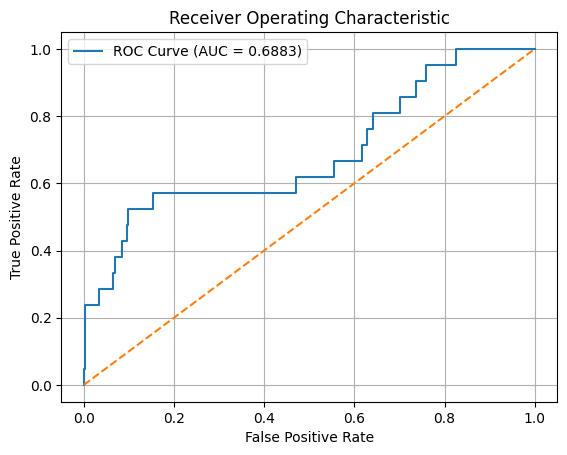

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

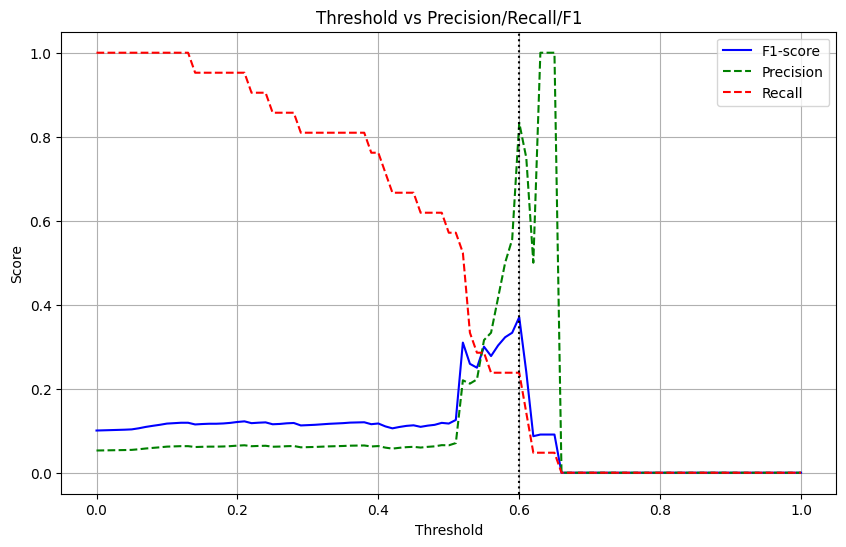

[I 2025-06-11 19:05:36,799] Trial 9 finished with value: 0.6883232016210739 and parameters: {'lstm_hidden_size': 118, 'lstm_num_layers': 1, 'mlp_hidden_1': 281, 'mlp_hidden_2': 119, 'dropout_rate': 0.2784817650757826, 'learning_rate': 0.008850722025758262, 'weight_decay': 1.3276223526679997e-05, 'batch_size': 32, 'epochs': 44}. Best is trial 5 with value: 0.9086879432624113.


Best Threshold: 0.60
Precision: 0.8333, Recall: 0.2381, F1: 0.3704
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 97,501
Trainable parameters: 97,501

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2378, Val Loss: 0.1829
Epoch [2/50], Train Loss: 

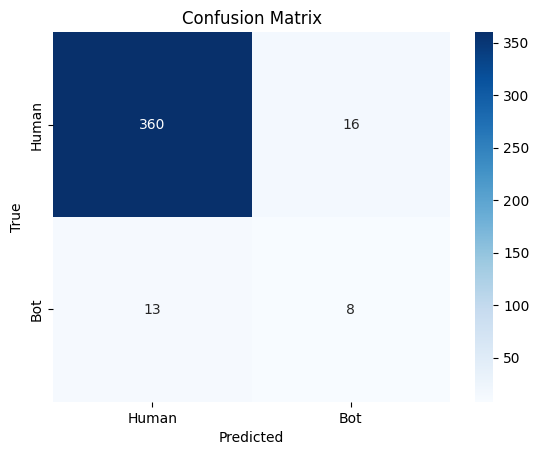


AUC-ROC: 0.8932


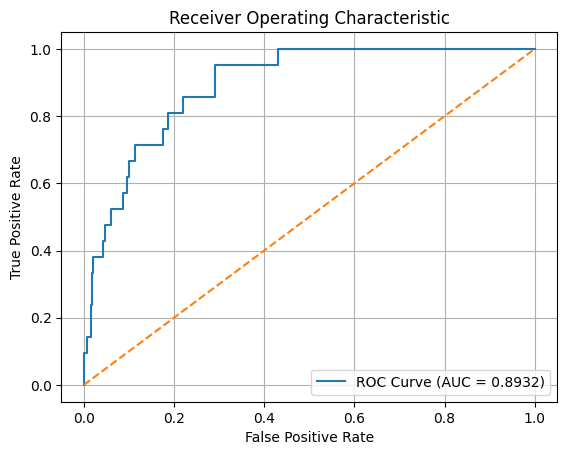

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

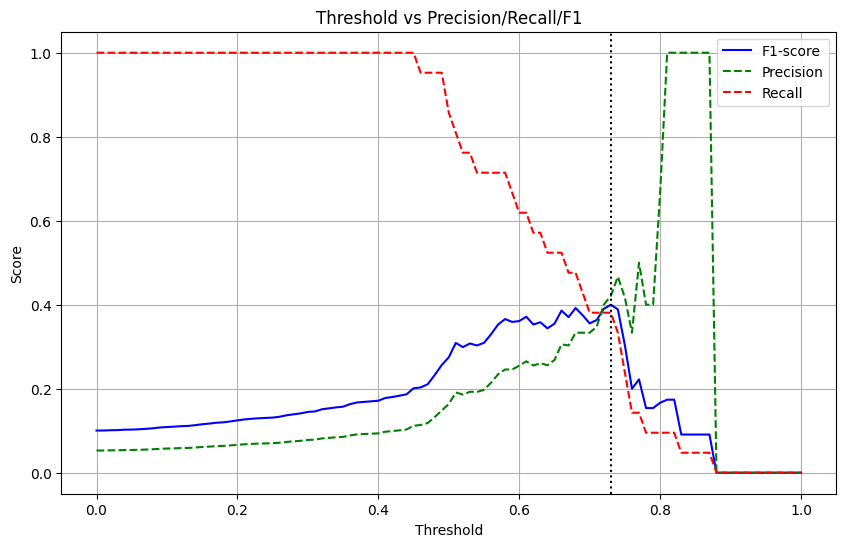

[I 2025-06-11 19:05:51,545] Trial 10 finished with value: 0.8932370820668694 and parameters: {'lstm_hidden_size': 33, 'lstm_num_layers': 2, 'mlp_hidden_1': 84, 'mlp_hidden_2': 85, 'dropout_rate': 0.4948012684515645, 'learning_rate': 0.0007247598426440989, 'weight_decay': 1.5423119303773986e-06, 'batch_size': 128, 'epochs': 50}. Best is trial 5 with value: 0.9086879432624113.


Best Threshold: 0.73
Precision: 0.4211, Recall: 0.3810, F1: 0.4000
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 103,235
Trainable parameters: 103,235

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2298, Val Loss: 0.1714
Epoch [2/50], Train Loss

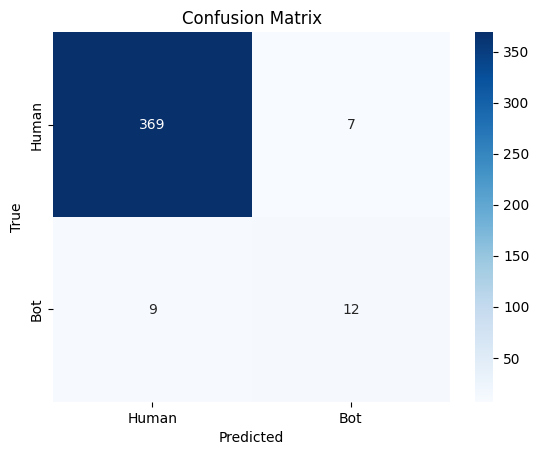


AUC-ROC: 0.9234


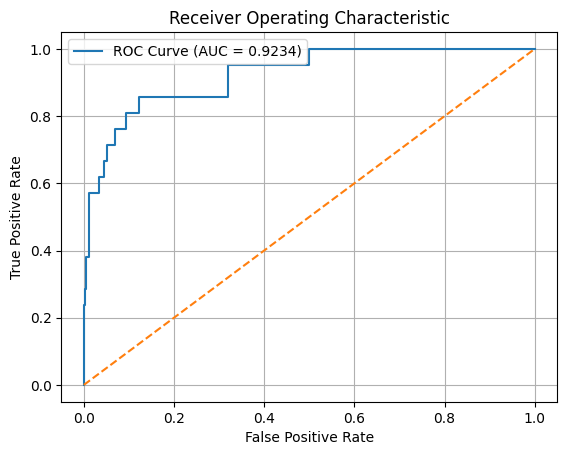

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

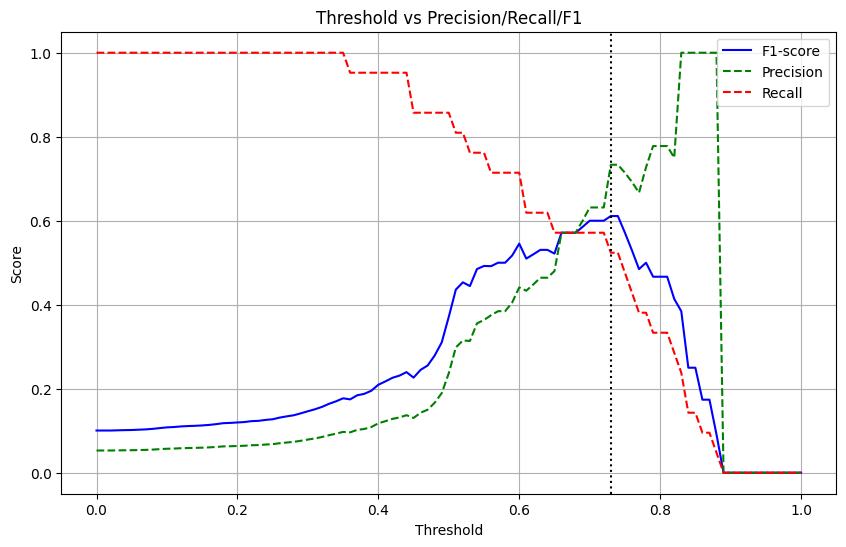

[I 2025-06-11 19:06:02,576] Trial 11 finished with value: 0.9233789260385005 and parameters: {'lstm_hidden_size': 36, 'lstm_num_layers': 2, 'mlp_hidden_1': 72, 'mlp_hidden_2': 83, 'dropout_rate': 0.4917672182059601, 'learning_rate': 0.0007684579166278208, 'weight_decay': 1.718314994609516e-06, 'batch_size': 128, 'epochs': 49}. Best is trial 11 with value: 0.9233789260385005.


Best Threshold: 0.73
Precision: 0.7333, Recall: 0.5238, F1: 0.6111
New best AUC found: 0.9234 (previous: 0.9087)
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 167,918
Trainable parameters: 167,918

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2

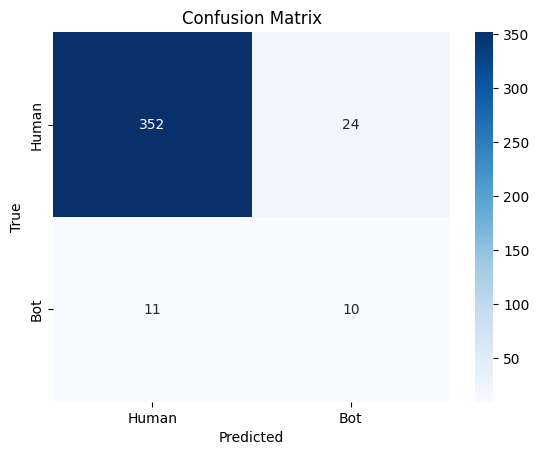


AUC-ROC: 0.9121


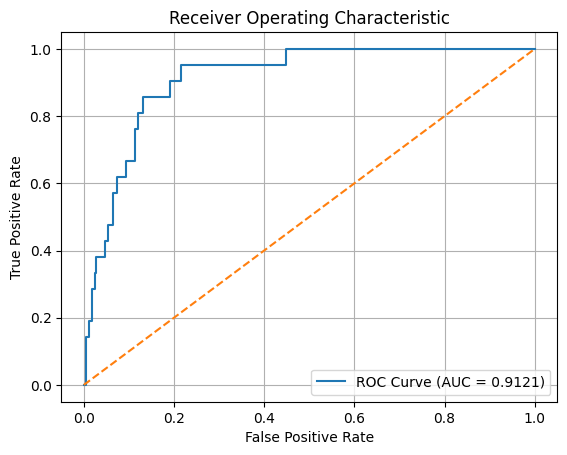

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

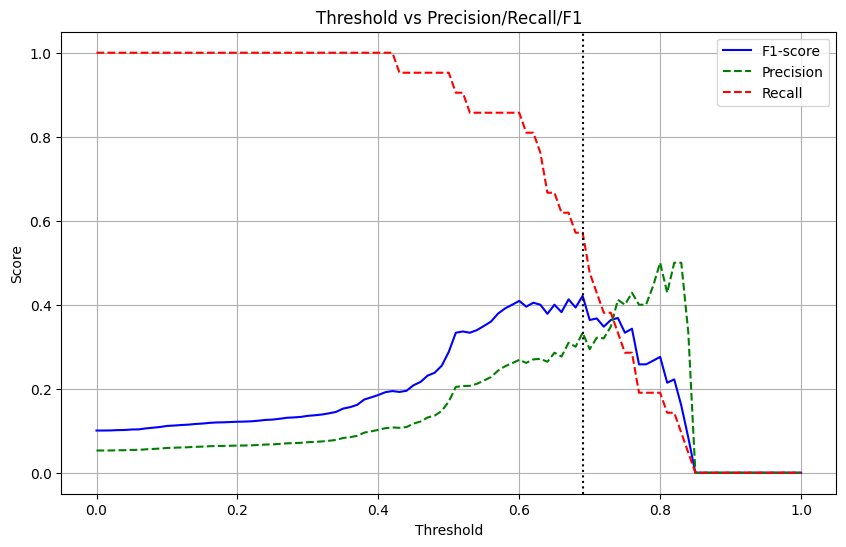

[I 2025-06-11 19:06:09,166] Trial 12 finished with value: 0.9121073961499493 and parameters: {'lstm_hidden_size': 50, 'lstm_num_layers': 2, 'mlp_hidden_1': 91, 'mlp_hidden_2': 81, 'dropout_rate': 0.42177342908978943, 'learning_rate': 0.00112248153315759, 'weight_decay': 5.551653401191847e-06, 'batch_size': 128, 'epochs': 50}. Best is trial 11 with value: 0.9233789260385005.


Best Threshold: 0.69
Precision: 0.3333, Recall: 0.5714, F1: 0.4211
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 177,708
Trainable parameters: 177,708

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2133, Val Loss: 0.2068
Epoch [2/50], Train Loss

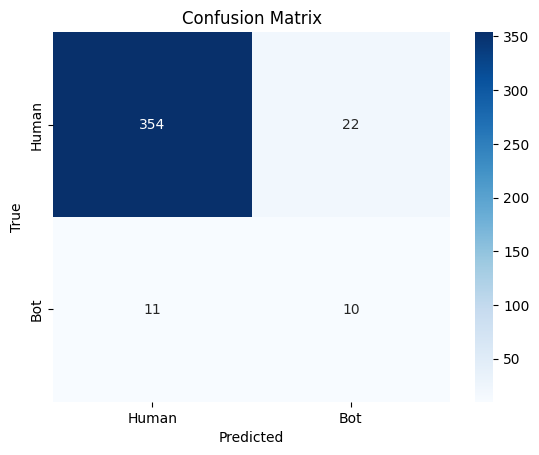


AUC-ROC: 0.9240


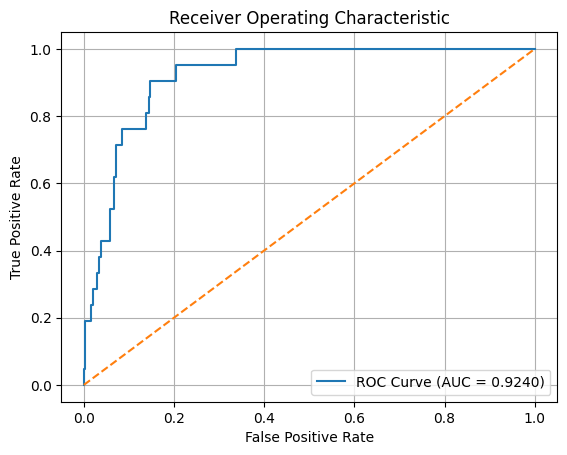

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

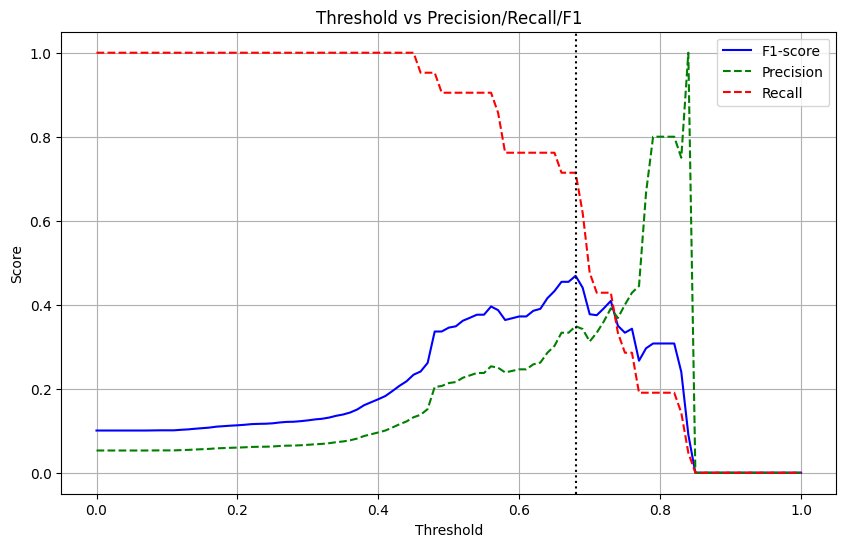

[I 2025-06-11 19:06:17,082] Trial 13 finished with value: 0.9240121580547113 and parameters: {'lstm_hidden_size': 51, 'lstm_num_layers': 2, 'mlp_hidden_1': 69, 'mlp_hidden_2': 89, 'dropout_rate': 0.4101320469088967, 'learning_rate': 0.0004876941930141179, 'weight_decay': 1.036226399776722e-06, 'batch_size': 128, 'epochs': 50}. Best is trial 13 with value: 0.9240121580547113.


Best Threshold: 0.68
Precision: 0.3488, Recall: 0.7143, F1: 0.4688
New best AUC found: 0.9240 (previous: 0.9234)
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 163,941
Trainable parameters: 163,941

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2

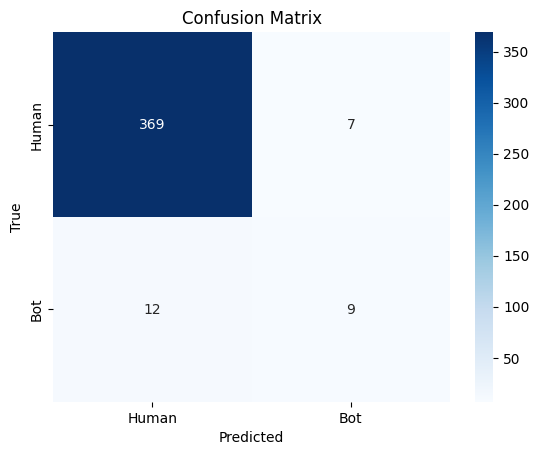


AUC-ROC: 0.9097


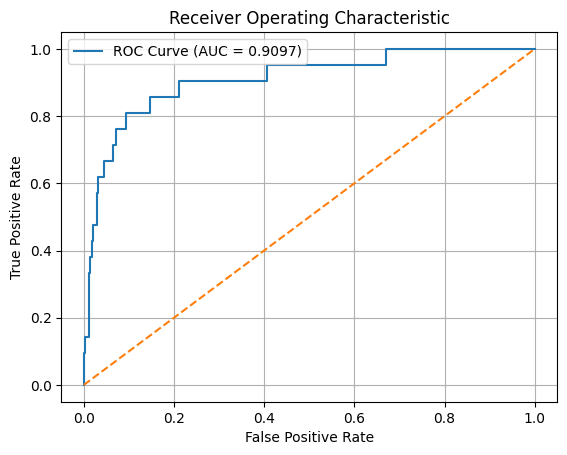

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

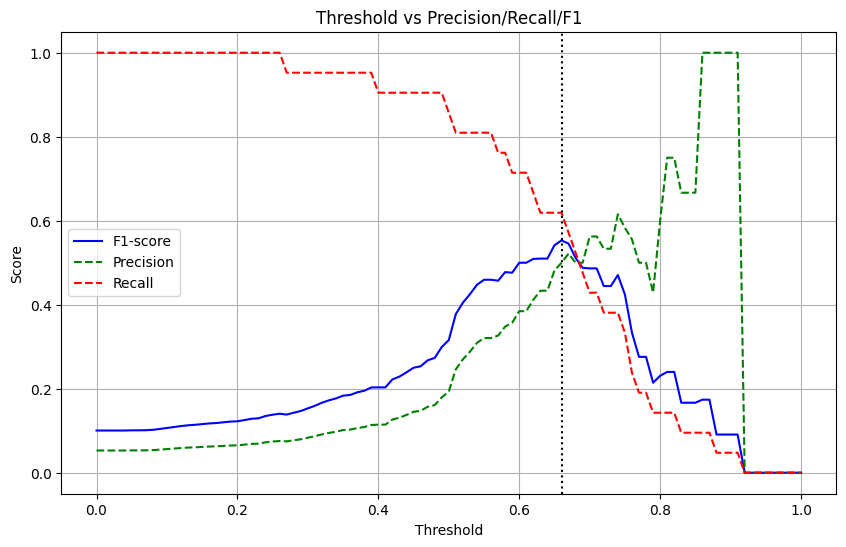

[I 2025-06-11 19:06:28,182] Trial 14 finished with value: 0.9097011144883485 and parameters: {'lstm_hidden_size': 46, 'lstm_num_layers': 2, 'mlp_hidden_1': 132, 'mlp_hidden_2': 125, 'dropout_rate': 0.40349544333228904, 'learning_rate': 0.0004268908581585247, 'weight_decay': 1.0248410731261977e-06, 'batch_size': 128, 'epochs': 24}. Best is trial 13 with value: 0.9240121580547113.


Best Threshold: 0.66
Precision: 0.5000, Recall: 0.6190, F1: 0.5532
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 398,744
Trainable parameters: 398,744

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2322, Val Loss: 0.1610
Epoch [2/50], Train Loss

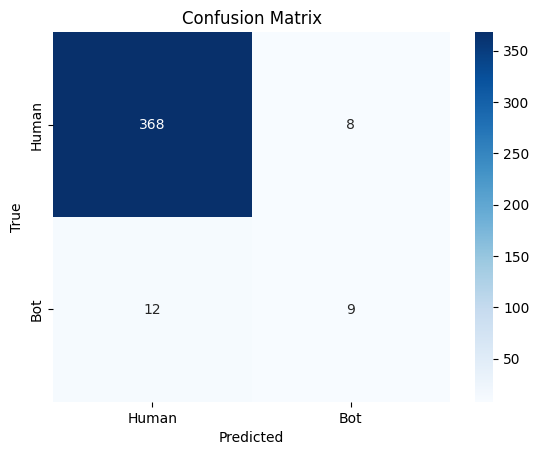


AUC-ROC: 0.9092


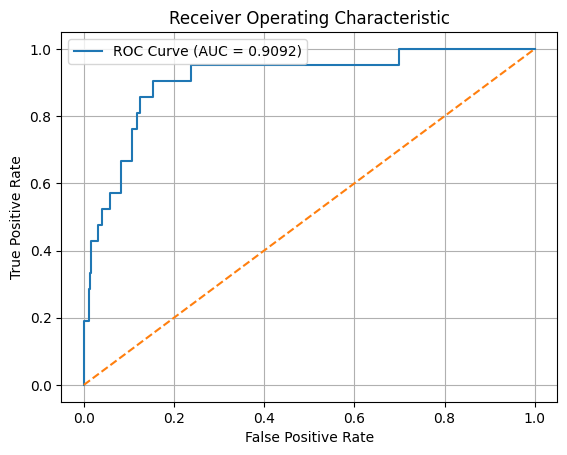

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

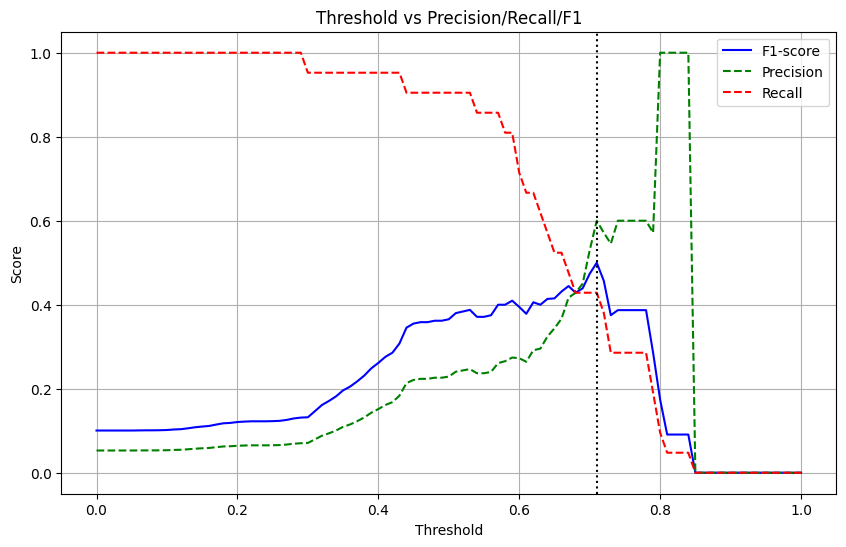

[I 2025-06-11 19:06:37,321] Trial 15 finished with value: 0.9091945288753799 and parameters: {'lstm_hidden_size': 68, 'lstm_num_layers': 3, 'mlp_hidden_1': 153, 'mlp_hidden_2': 93, 'dropout_rate': 0.43361998613660174, 'learning_rate': 0.00027305760029077206, 'weight_decay': 1.9333050305494847e-06, 'batch_size': 128, 'epochs': 41}. Best is trial 13 with value: 0.9240121580547113.


Best Threshold: 0.71
Precision: 0.6000, Recall: 0.4286, F1: 0.5000
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 530,390
Trainable parameters: 530,390

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.1916, Val Loss: 0.1722
Epoch [2/50], Train Loss

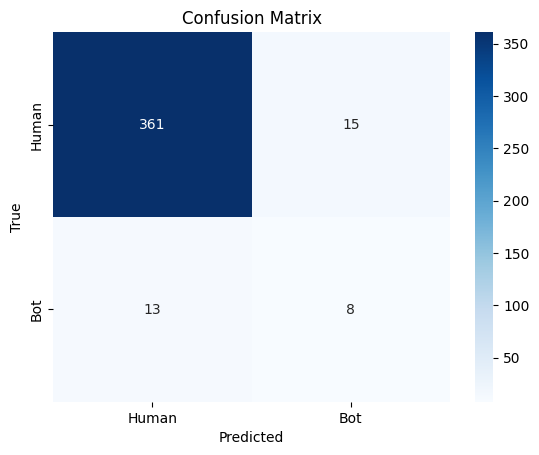


AUC-ROC: 0.9240


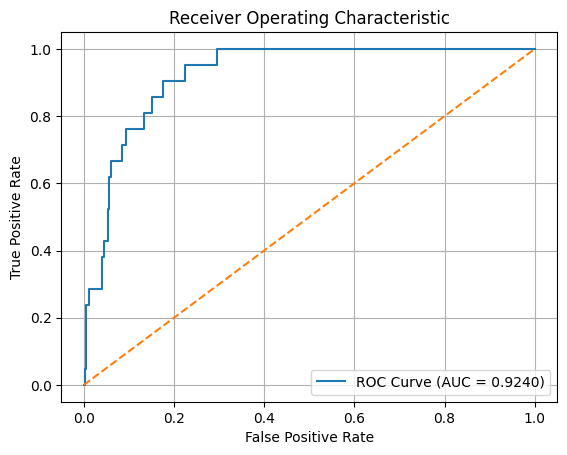

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

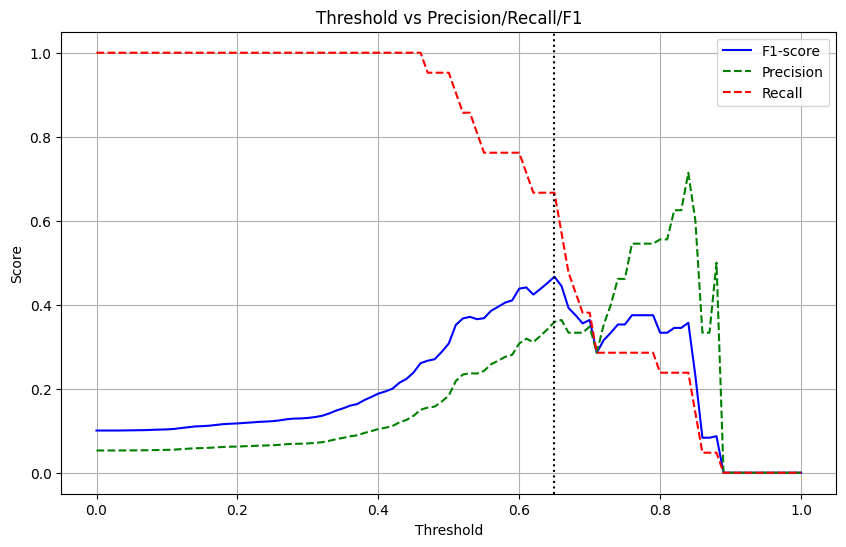

[I 2025-06-11 19:06:47,793] Trial 16 finished with value: 0.9240121580547113 and parameters: {'lstm_hidden_size': 97, 'lstm_num_layers': 2, 'mlp_hidden_1': 66, 'mlp_hidden_2': 112, 'dropout_rate': 0.3564293215178741, 'learning_rate': 0.0006303012127240663, 'weight_decay': 2.0240361306424258e-06, 'batch_size': 64, 'epochs': 46}. Best is trial 13 with value: 0.9240121580547113.


Best Threshold: 0.65
Precision: 0.3590, Recall: 0.6667, F1: 0.4667
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 748,968
Trainable parameters: 748,968

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2161, Val Loss: 0.1984
Epoch [2/50], Train Loss

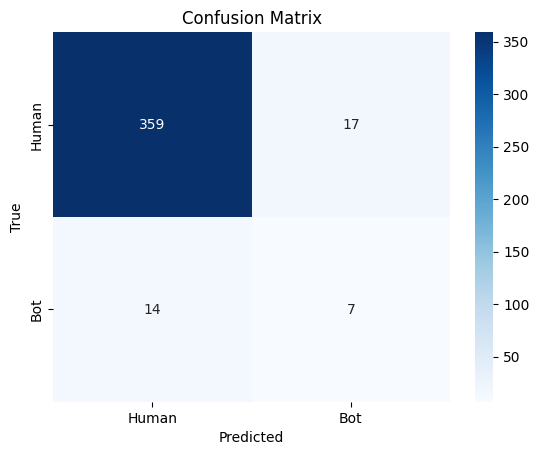


AUC-ROC: 0.8802


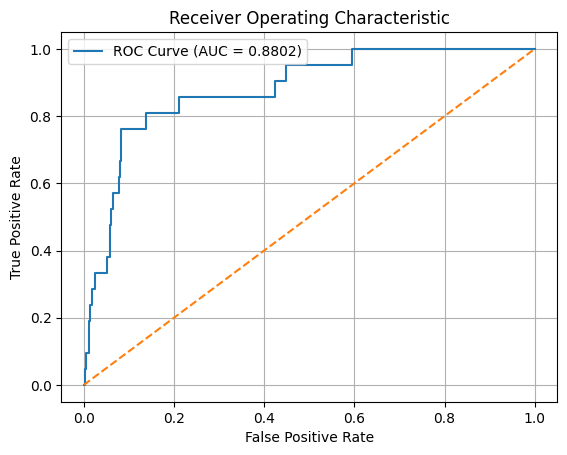

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

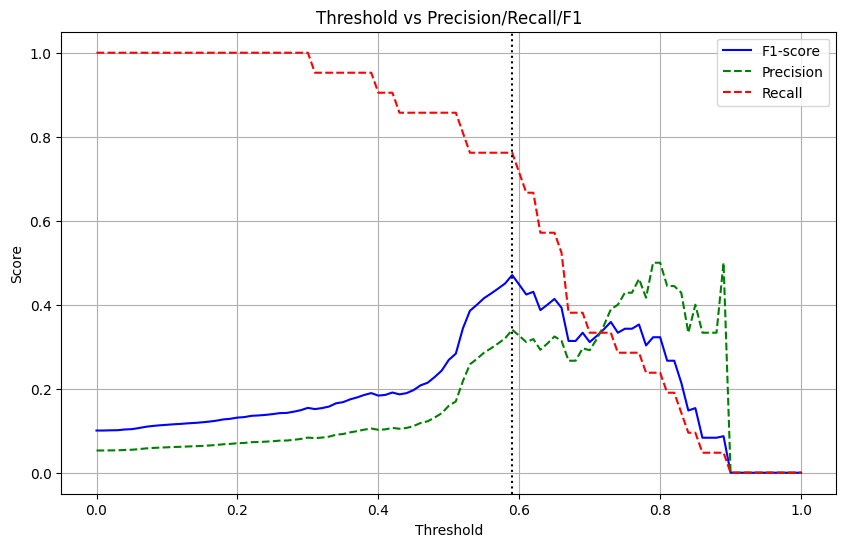

[I 2025-06-11 19:07:00,431] Trial 17 finished with value: 0.880192502532928 and parameters: {'lstm_hidden_size': 96, 'lstm_num_layers': 3, 'mlp_hidden_1': 172, 'mlp_hidden_2': 114, 'dropout_rate': 0.25173193383649606, 'learning_rate': 0.000228991589163435, 'weight_decay': 7.78840260593579e-06, 'batch_size': 64, 'epochs': 26}. Best is trial 13 with value: 0.9240121580547113.


Best Threshold: 0.59
Precision: 0.3404, Recall: 0.7619, F1: 0.4706
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 499,396
Trainable parameters: 499,396

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.1976, Val Loss: 0.1840
Epoch [2/50], Train Loss

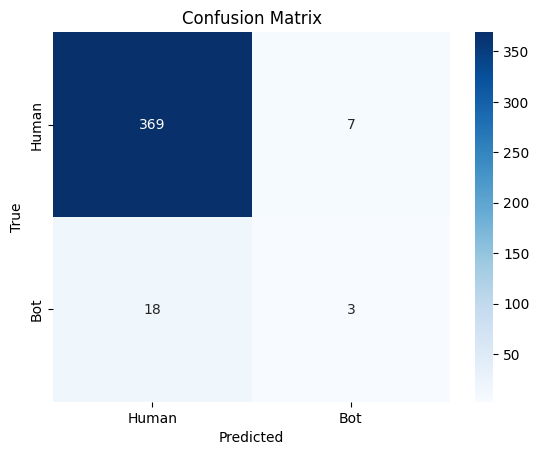


AUC-ROC: 0.8937


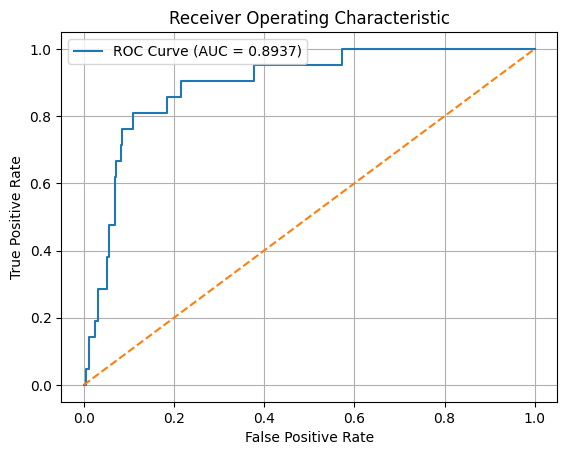

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

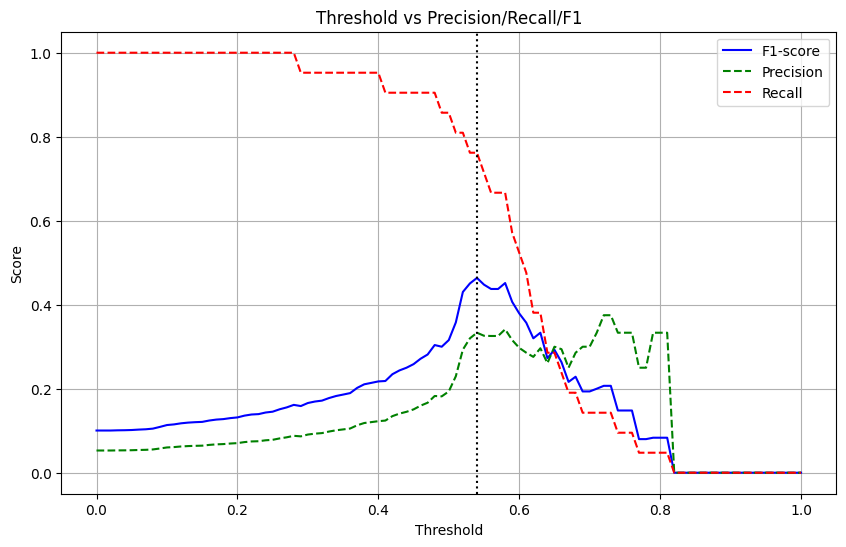

[I 2025-06-11 19:07:08,865] Trial 18 finished with value: 0.8937436676798378 and parameters: {'lstm_hidden_size': 93, 'lstm_num_layers': 2, 'mlp_hidden_1': 125, 'mlp_hidden_2': 109, 'dropout_rate': 0.34728287725847723, 'learning_rate': 0.0005293163485322404, 'weight_decay': 2.777023739280021e-06, 'batch_size': 64, 'epochs': 39}. Best is trial 13 with value: 0.9240121580547113.


Best Threshold: 0.54
Precision: 0.3333, Recall: 0.7619, F1: 0.4638
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 498,434
Trainable parameters: 498,434

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.1674, Val Loss: 0.1570
Epoch [2/50], Train Loss

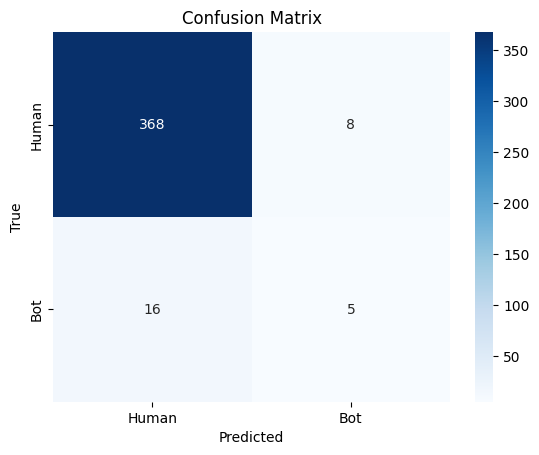


AUC-ROC: 0.8435


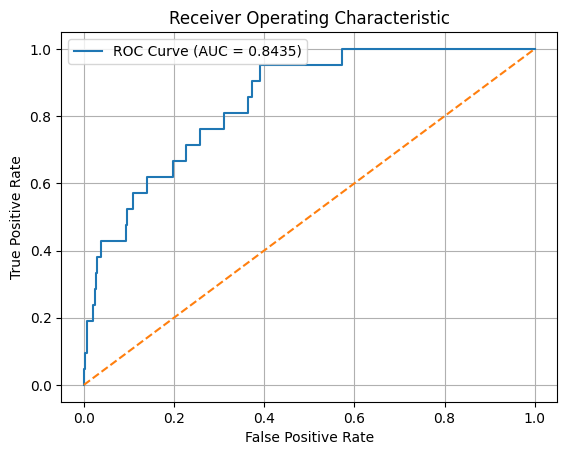

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

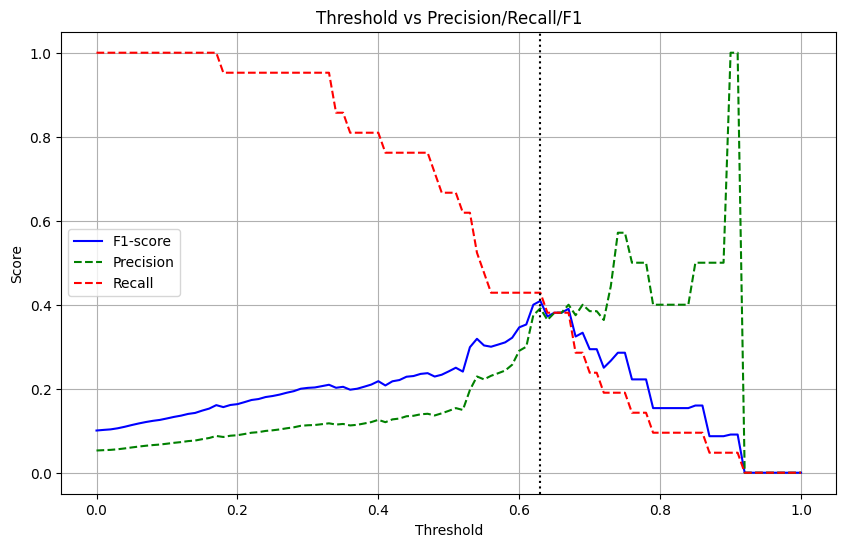

[I 2025-06-11 19:07:19,316] Trial 19 finished with value: 0.8434650455927052 and parameters: {'lstm_hidden_size': 92, 'lstm_num_layers': 2, 'mlp_hidden_1': 208, 'mlp_hidden_2': 128, 'dropout_rate': 0.3571645972803334, 'learning_rate': 0.0018734378808200293, 'weight_decay': 1.0180574823131273e-06, 'batch_size': 64, 'epochs': 46}. Best is trial 13 with value: 0.9240121580547113.


Best Threshold: 0.63
Precision: 0.3913, Recall: 0.4286, F1: 0.4091
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 906,228
Trainable parameters: 906,228

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2186, Val Loss: 0.2955
Epoch [2/50], Train Loss

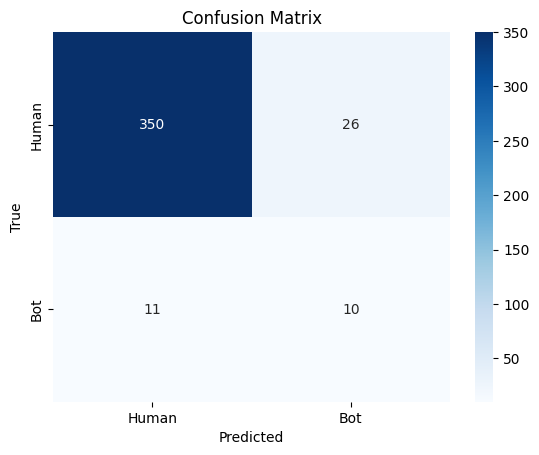


AUC-ROC: 0.9162


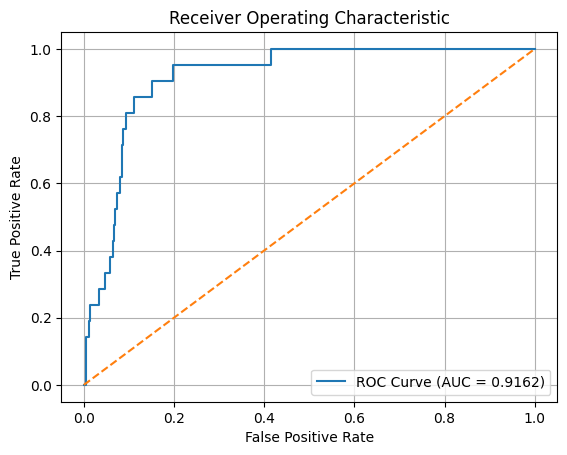

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

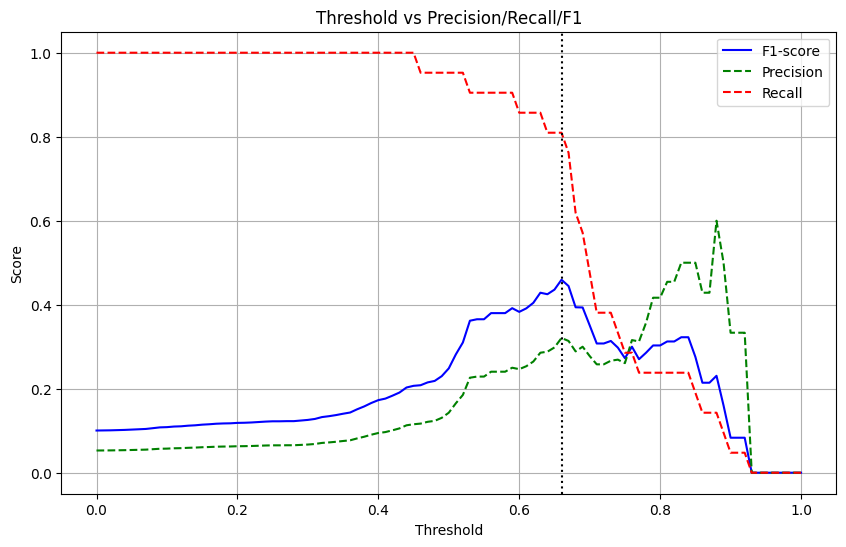

[I 2025-06-11 19:07:34,329] Trial 20 finished with value: 0.9161600810536981 and parameters: {'lstm_hidden_size': 107, 'lstm_num_layers': 3, 'mlp_hidden_1': 64, 'mlp_hidden_2': 70, 'dropout_rate': 0.24201254950134551, 'learning_rate': 0.00019662129894651545, 'weight_decay': 5.60028965073504e-06, 'batch_size': 64, 'epochs': 27}. Best is trial 13 with value: 0.9240121580547113.


Best Threshold: 0.66
Precision: 0.3208, Recall: 0.8095, F1: 0.4595
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 142,321
Trainable parameters: 142,321

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2253, Val Loss: 0.1820
Epoch [2/50], Train Loss

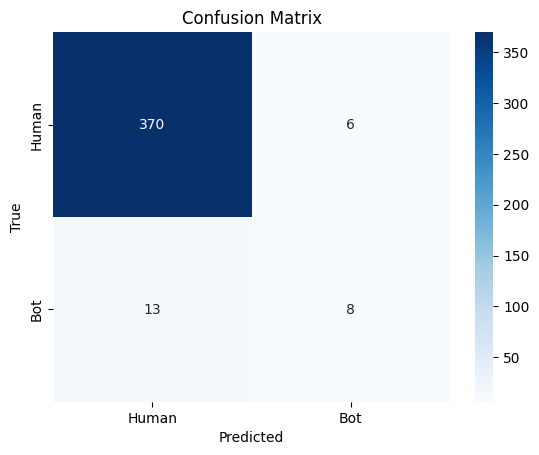


AUC-ROC: 0.8983


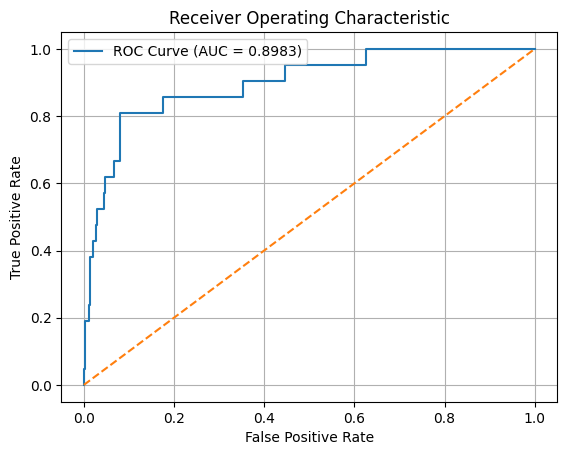

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

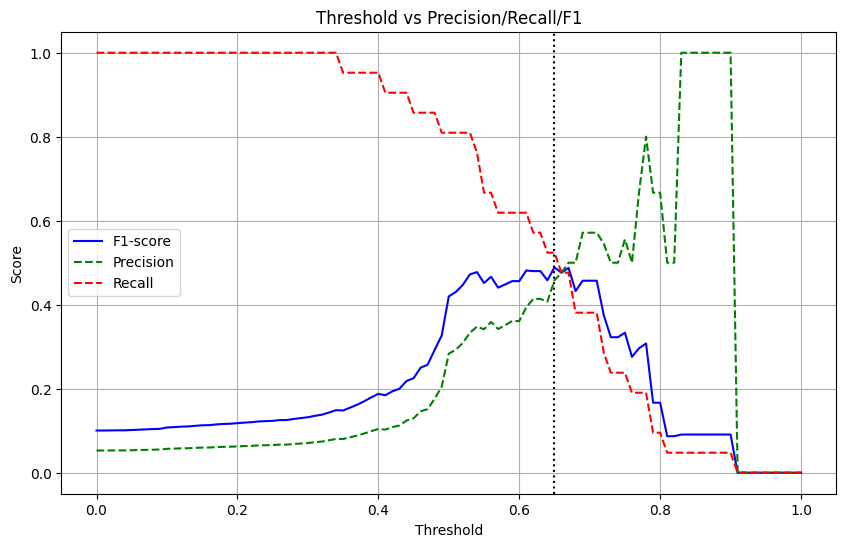

[I 2025-06-11 19:07:42,894] Trial 21 finished with value: 0.8983029381965552 and parameters: {'lstm_hidden_size': 43, 'lstm_num_layers': 2, 'mlp_hidden_1': 108, 'mlp_hidden_2': 89, 'dropout_rate': 0.4432304446897091, 'learning_rate': 0.0007481536610790742, 'weight_decay': 1.6786866876643847e-06, 'batch_size': 128, 'epochs': 47}. Best is trial 13 with value: 0.9240121580547113.


Best Threshold: 0.65
Precision: 0.4583, Recall: 0.5238, F1: 0.4889
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 86,249
Trainable parameters: 86,249

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2099, Val Loss: 0.1772
Epoch [2/50], Train Loss: 

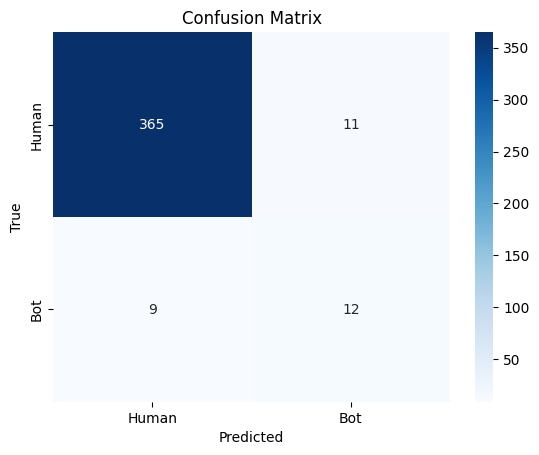


AUC-ROC: 0.8915


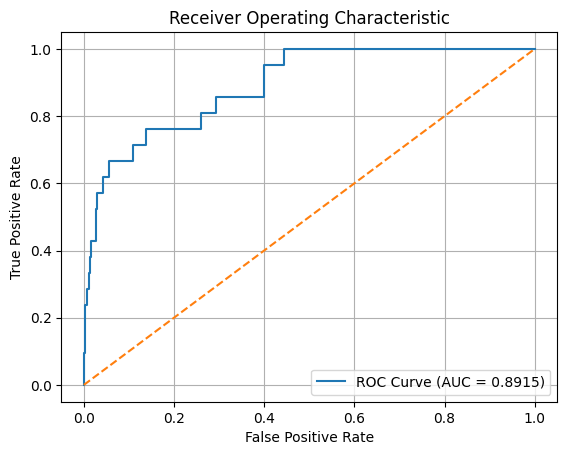

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


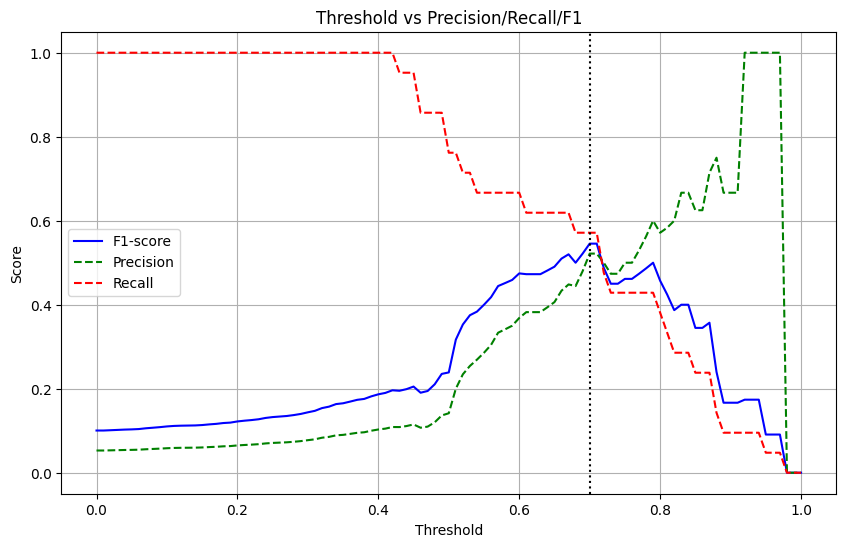

[I 2025-06-11 19:07:56,038] Trial 22 finished with value: 0.8914640324214792 and parameters: {'lstm_hidden_size': 32, 'lstm_num_layers': 2, 'mlp_hidden_1': 68, 'mlp_hidden_2': 73, 'dropout_rate': 0.36940532334754306, 'learning_rate': 0.0007219348905770608, 'weight_decay': 2.5771039766352424e-06, 'batch_size': 128, 'epochs': 50}. Best is trial 13 with value: 0.9240121580547113.


Best Threshold: 0.70
Precision: 0.5217, Recall: 0.5714, F1: 0.5455
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 206,271
Trainable parameters: 206,271

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2325, Val Loss: 0.2174
Epoch [2/50], Train Loss

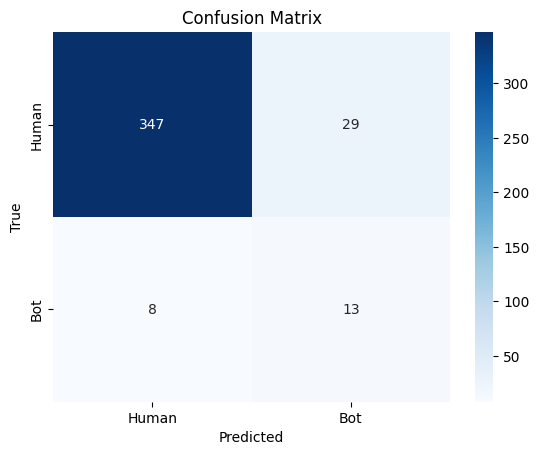


AUC-ROC: 0.9353


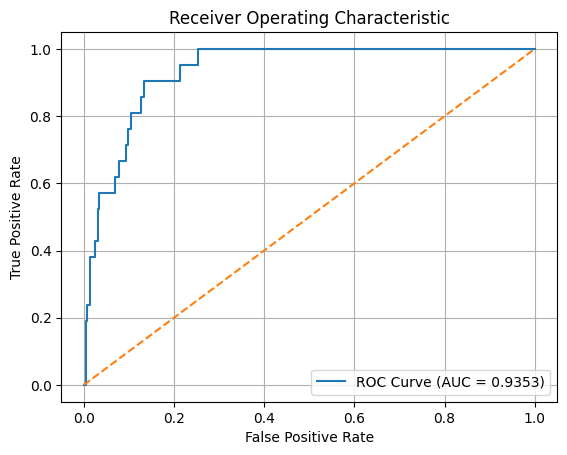

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

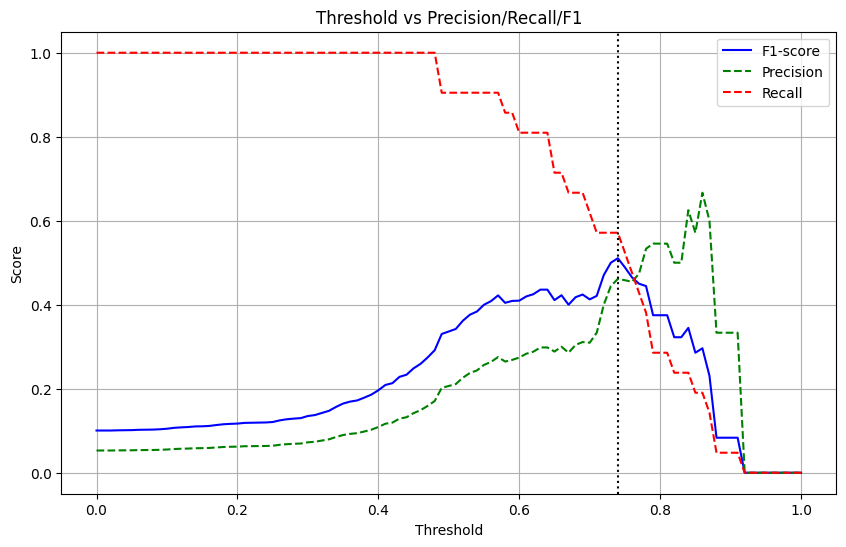

[I 2025-06-11 19:08:04,570] Trial 23 finished with value: 0.9352836879432624 and parameters: {'lstm_hidden_size': 54, 'lstm_num_layers': 2, 'mlp_hidden_1': 170, 'mlp_hidden_2': 109, 'dropout_rate': 0.39275496998037907, 'learning_rate': 0.0002918074043571448, 'weight_decay': 1.4165293865668876e-06, 'batch_size': 64, 'epochs': 38}. Best is trial 23 with value: 0.9352836879432624.


Best Threshold: 0.74
Precision: 0.4615, Recall: 0.5714, F1: 0.5106
New best AUC found: 0.9353 (previous: 0.9240)
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 322,038
Trainable parameters: 322,038

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2

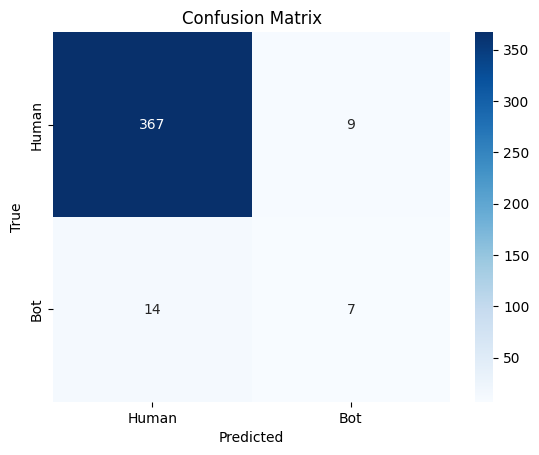


AUC-ROC: 0.8792


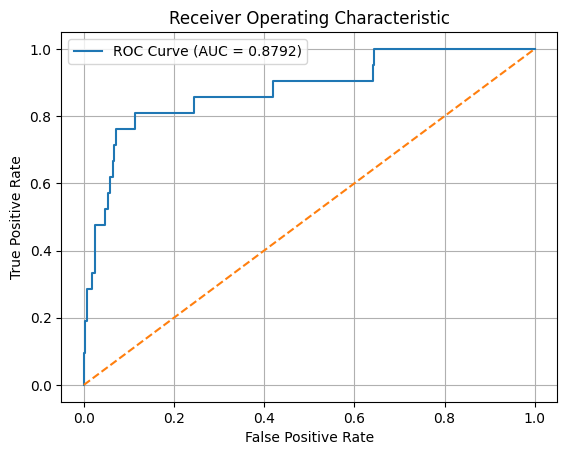

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

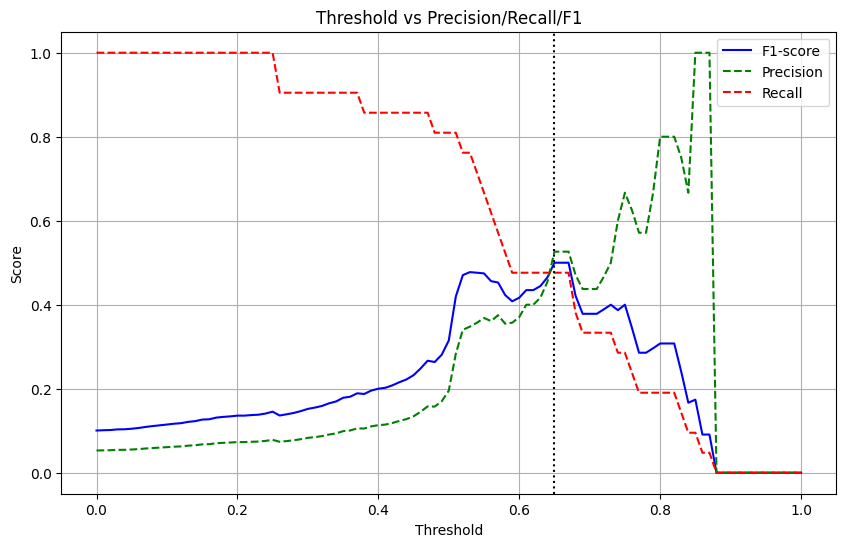

[I 2025-06-11 19:08:15,586] Trial 24 finished with value: 0.8791793313069909 and parameters: {'lstm_hidden_size': 71, 'lstm_num_layers': 2, 'mlp_hidden_1': 171, 'mlp_hidden_2': 109, 'dropout_rate': 0.38706348535504725, 'learning_rate': 0.0003353883419068258, 'weight_decay': 1.1683457037957762e-06, 'batch_size': 64, 'epochs': 37}. Best is trial 23 with value: 0.9352836879432624.


Best Threshold: 0.65
Precision: 0.5263, Recall: 0.4762, F1: 0.5000
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 204,061
Trainable parameters: 204,061

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2468, Val Loss: 0.2045
Epoch [2/50], Train Loss

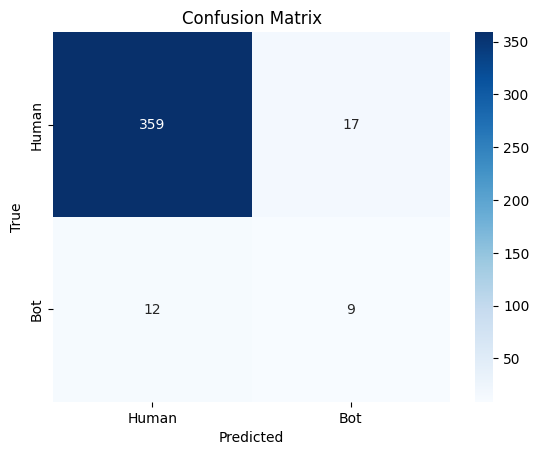


AUC-ROC: 0.9252


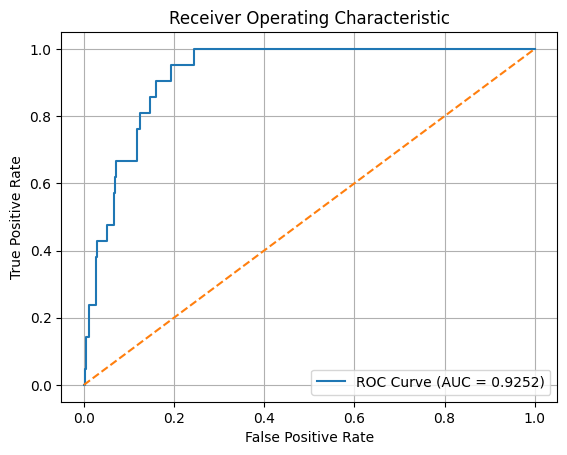

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

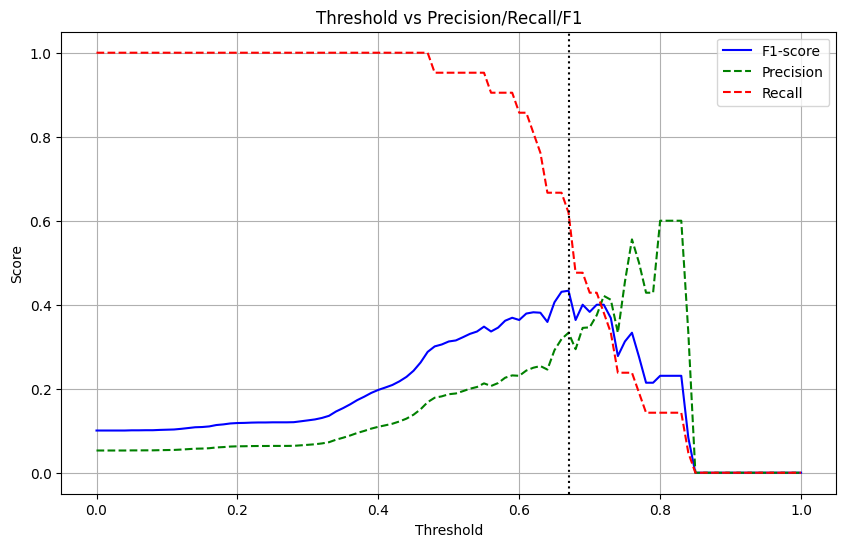

[I 2025-06-11 19:08:25,459] Trial 25 finished with value: 0.9251519756838905 and parameters: {'lstm_hidden_size': 54, 'lstm_num_layers': 2, 'mlp_hidden_1': 134, 'mlp_hidden_2': 119, 'dropout_rate': 0.31666940557960893, 'learning_rate': 0.00010577764610115447, 'weight_decay': 2.005483466245957e-06, 'batch_size': 64, 'epochs': 43}. Best is trial 23 with value: 0.9352836879432624.


Best Threshold: 0.67
Precision: 0.3333, Recall: 0.6190, F1: 0.4333
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 221,316
Trainable parameters: 221,316

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2463, Val Loss: 0.1994
Epoch [2/50], Train Loss

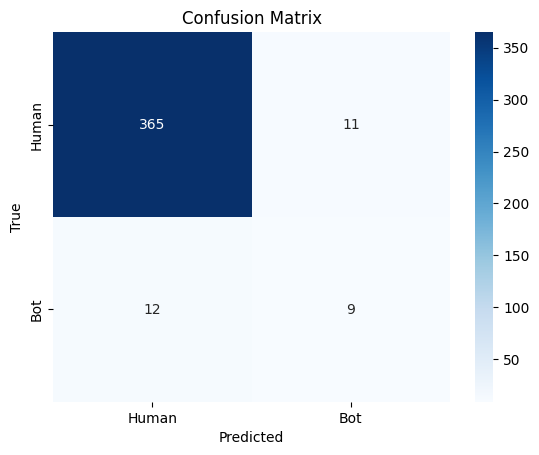


AUC-ROC: 0.8601


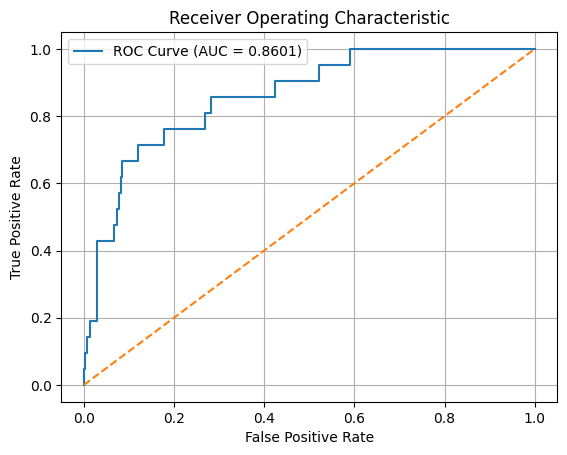

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

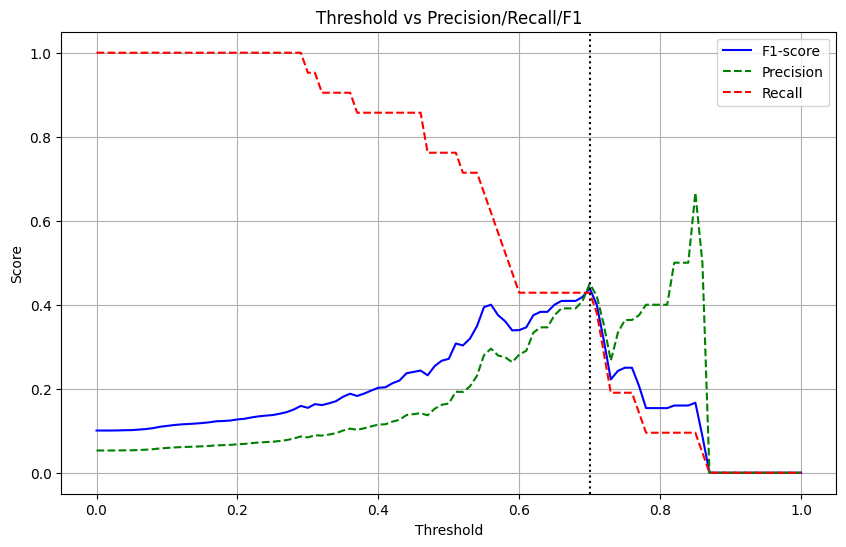

[I 2025-06-11 19:08:43,972] Trial 26 finished with value: 0.8600557244174265 and parameters: {'lstm_hidden_size': 54, 'lstm_num_layers': 2, 'mlp_hidden_1': 253, 'mlp_hidden_2': 119, 'dropout_rate': 0.30168172778056707, 'learning_rate': 0.00010075338011370203, 'weight_decay': 9.438202604187253e-05, 'batch_size': 64, 'epochs': 42}. Best is trial 23 with value: 0.9352836879432624.


Best Threshold: 0.70
Precision: 0.4500, Recall: 0.4286, F1: 0.4390
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 363,864
Trainable parameters: 363,864

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2307, Val Loss: 0.1822
Epoch [2/50], Train Loss

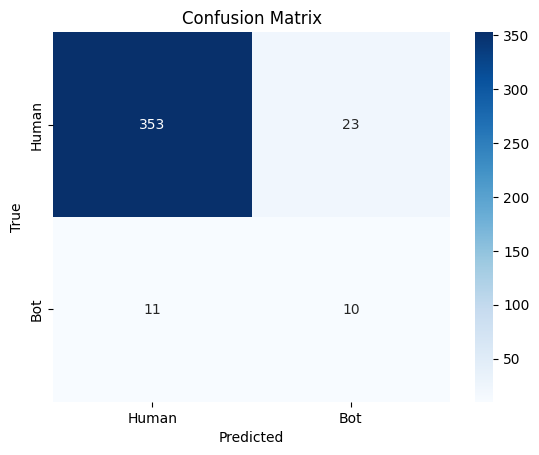


AUC-ROC: 0.9146


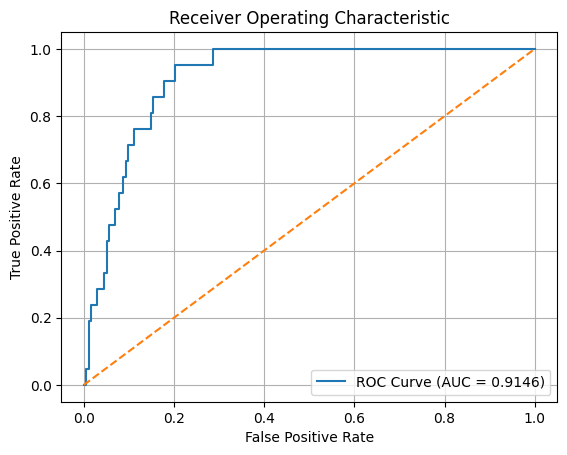

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

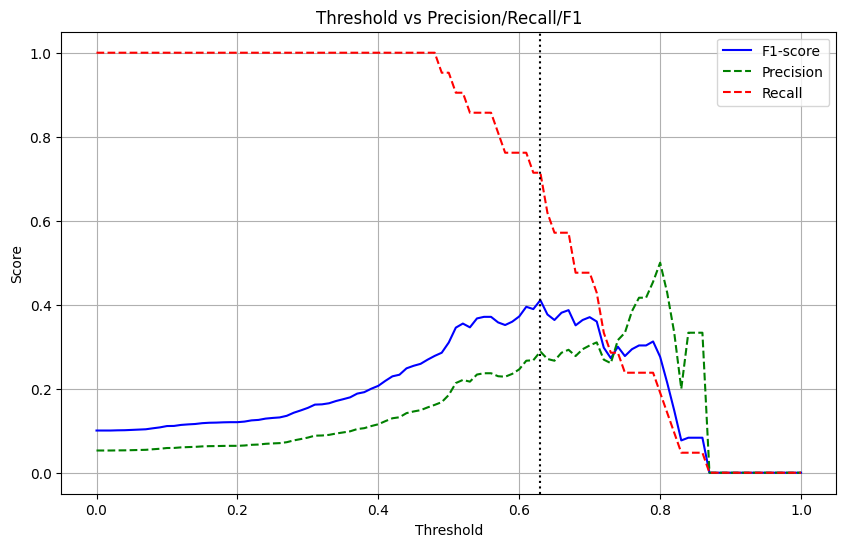

[I 2025-06-11 19:08:55,396] Trial 27 finished with value: 0.9146403242147922 and parameters: {'lstm_hidden_size': 64, 'lstm_num_layers': 3, 'mlp_hidden_1': 177, 'mlp_hidden_2': 99, 'dropout_rate': 0.3262764231143957, 'learning_rate': 0.0001785178249964346, 'weight_decay': 4.730246321921971e-06, 'batch_size': 64, 'epochs': 38}. Best is trial 23 with value: 0.9352836879432624.


Best Threshold: 0.63
Precision: 0.2885, Recall: 0.7143, F1: 0.4110
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 193,222
Trainable parameters: 193,222

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.1750, Val Loss: 0.1664
Epoch [2/50], Train Loss

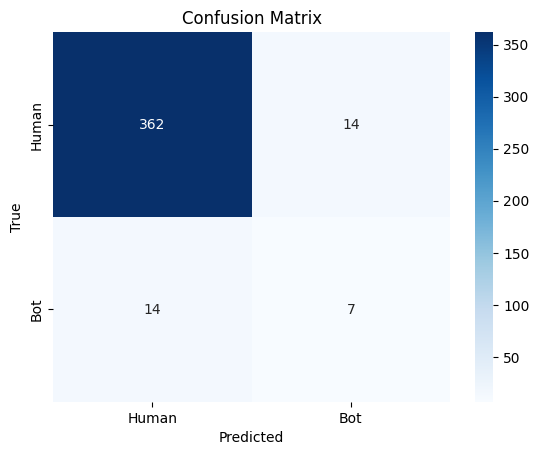


AUC-ROC: 0.8033


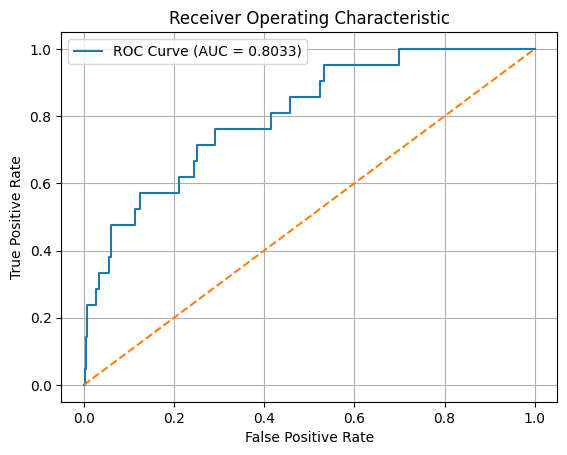

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

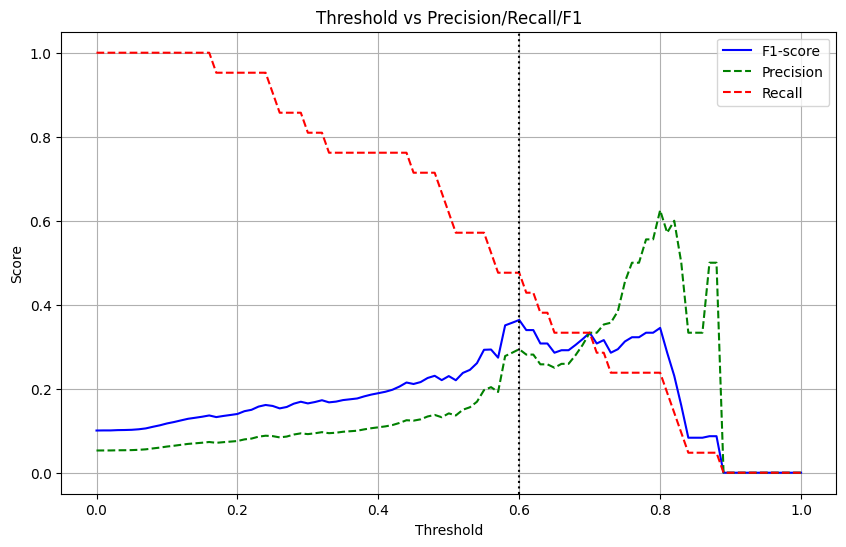

[I 2025-06-11 19:09:02,443] Trial 28 finished with value: 0.8033181357649444 and parameters: {'lstm_hidden_size': 52, 'lstm_num_layers': 2, 'mlp_hidden_1': 131, 'mlp_hidden_2': 121, 'dropout_rate': 0.10092249216438287, 'learning_rate': 0.0003011195590940267, 'weight_decay': 1.3427221513261533e-06, 'batch_size': 64, 'epochs': 36}. Best is trial 23 with value: 0.9352836879432624.


Best Threshold: 0.60
Precision: 0.2941, Recall: 0.4762, F1: 0.3636
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 188,820
Trainable parameters: 188,820

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2735, Val Loss: 0.1944
Epoch [2/50], Train Loss

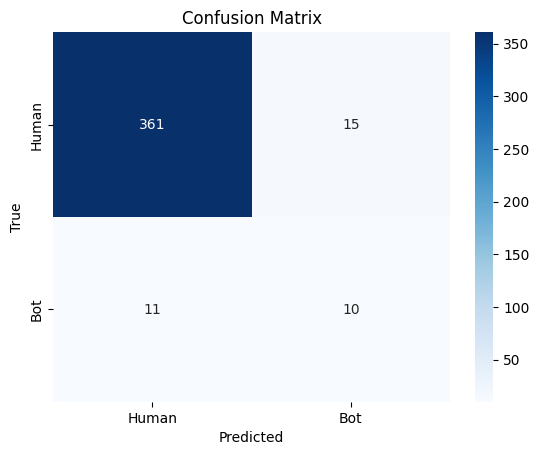


AUC-ROC: 0.9240


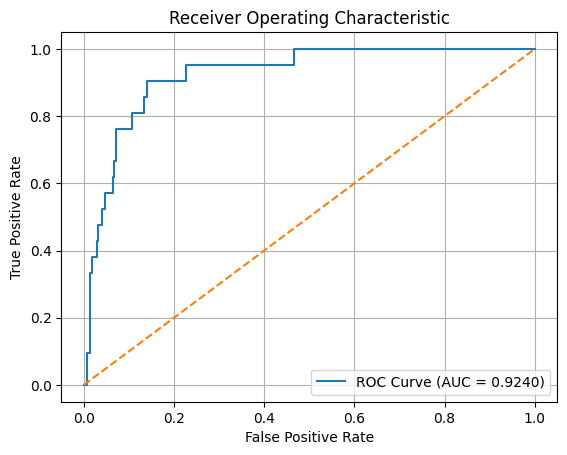

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

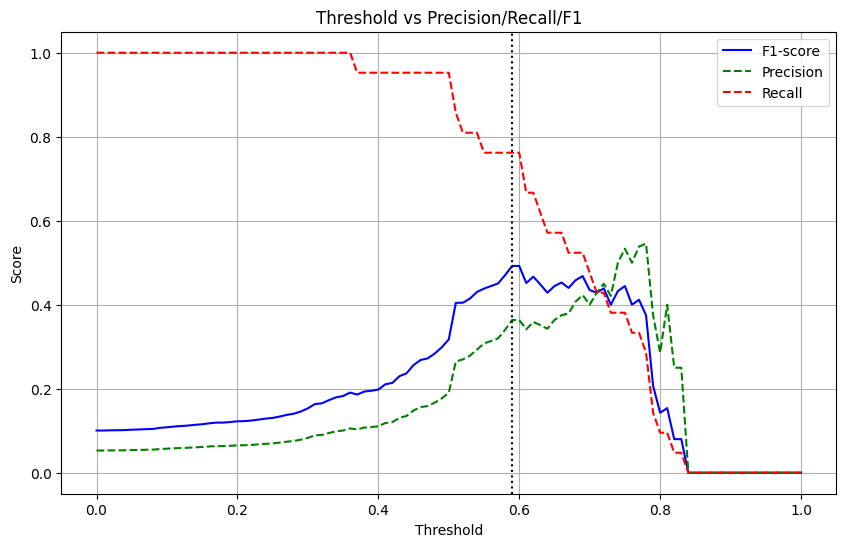

[I 2025-06-11 19:09:23,475] Trial 29 finished with value: 0.9240121580547112 and parameters: {'lstm_hidden_size': 42, 'lstm_num_layers': 3, 'mlp_hidden_1': 205, 'mlp_hidden_2': 93, 'dropout_rate': 0.3927106135624878, 'learning_rate': 0.00012933793131629889, 'weight_decay': 2.388878544475241e-06, 'batch_size': 32, 'epochs': 43}. Best is trial 23 with value: 0.9352836879432624.


Best Threshold: 0.59
Precision: 0.3636, Recall: 0.7619, F1: 0.4923
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 274,518
Trainable parameters: 274,518

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2452, Val Loss: 0.1997
Epoch [2/50], Train Loss

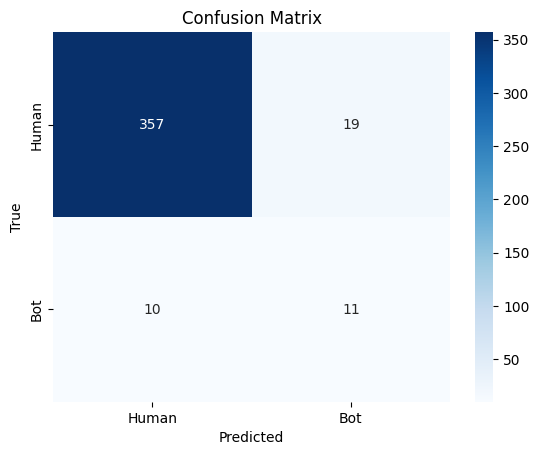


AUC-ROC: 0.9311


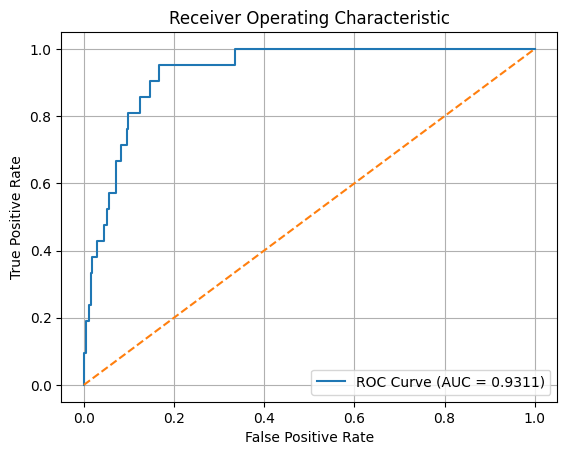

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

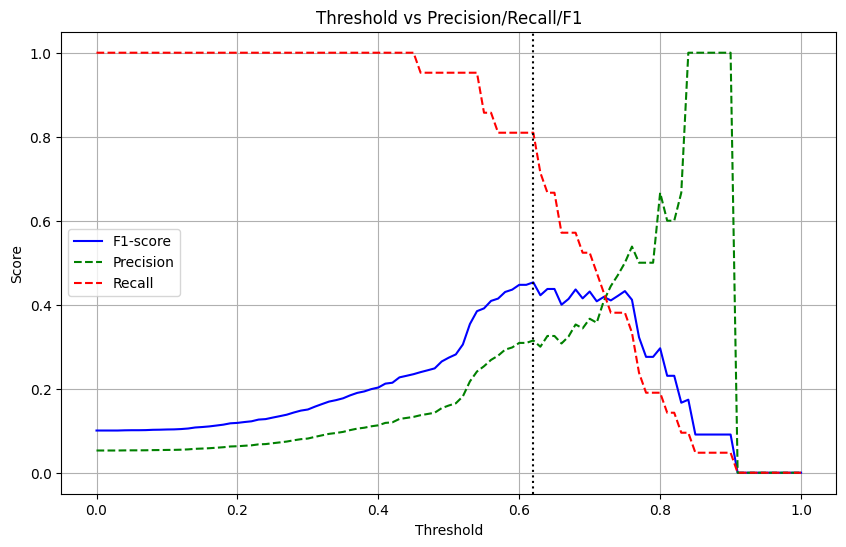

[I 2025-06-11 19:09:38,757] Trial 30 finished with value: 0.9311043566362716 and parameters: {'lstm_hidden_size': 68, 'lstm_num_layers': 2, 'mlp_hidden_1': 242, 'mlp_hidden_2': 32, 'dropout_rate': 0.2694836106332112, 'learning_rate': 0.00010112195635571276, 'weight_decay': 8.23461865598369e-06, 'batch_size': 64, 'epochs': 30}. Best is trial 23 with value: 0.9352836879432624.


Best Threshold: 0.62
Precision: 0.3148, Recall: 0.8095, F1: 0.4533
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 319,256
Trainable parameters: 319,256

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2331, Val Loss: 0.2068
Epoch [2/50], Train Loss

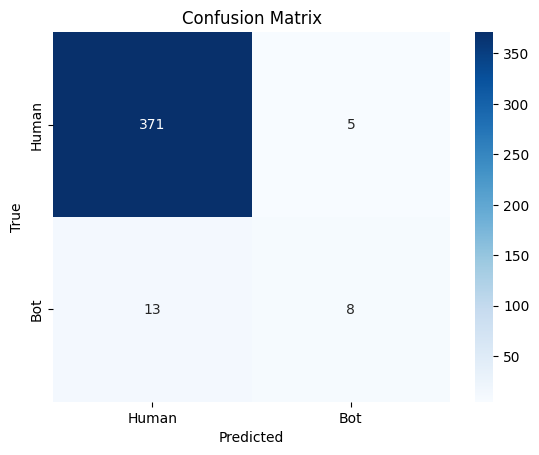


AUC-ROC: 0.9379


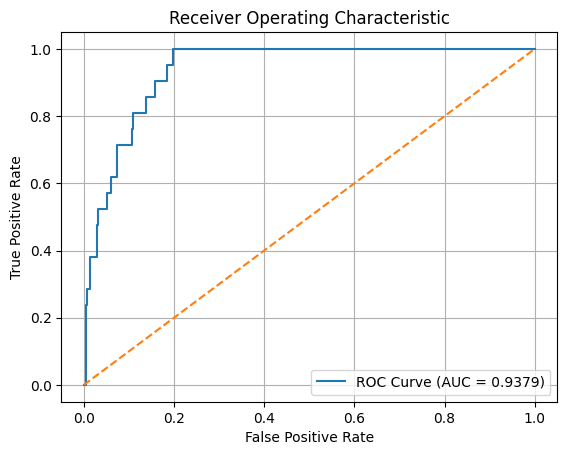

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

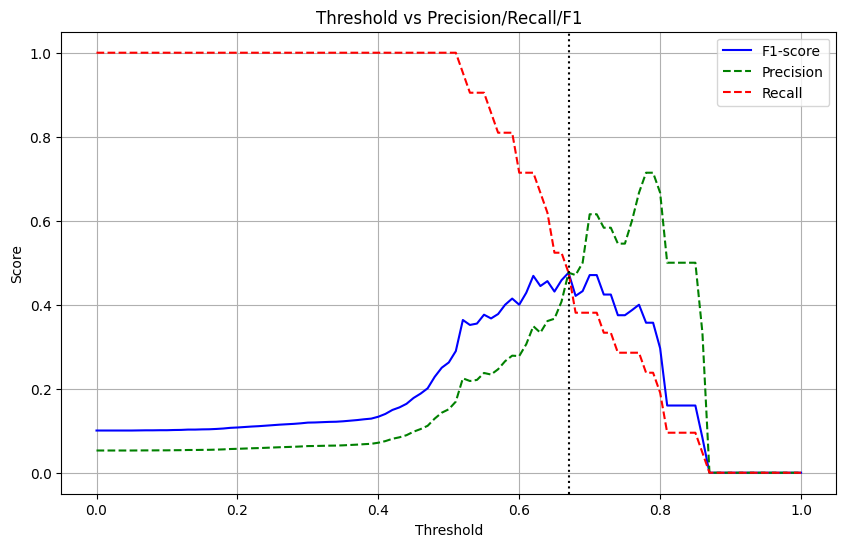

[I 2025-06-11 19:09:45,316] Trial 31 finished with value: 0.9379432624113475 and parameters: {'lstm_hidden_size': 74, 'lstm_num_layers': 2, 'mlp_hidden_1': 256, 'mlp_hidden_2': 34, 'dropout_rate': 0.27259033735139954, 'learning_rate': 0.00010497475973935918, 'weight_decay': 8.492925628623521e-06, 'batch_size': 64, 'epochs': 30}. Best is trial 31 with value: 0.9379432624113475.


Best Threshold: 0.67
Precision: 0.4762, Recall: 0.4762, F1: 0.4762
New best AUC found: 0.9379 (previous: 0.9353)
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 317,728
Trainable parameters: 317,728

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2

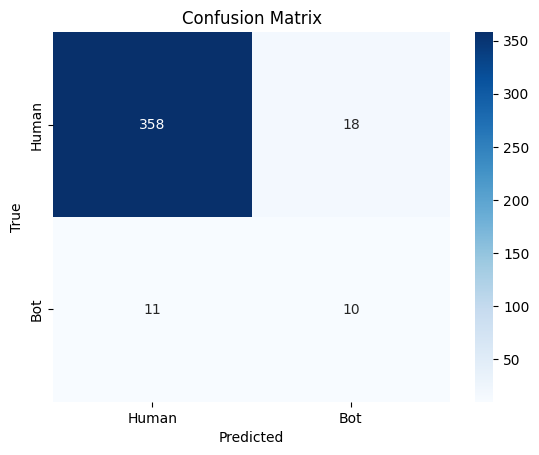


AUC-ROC: 0.9377


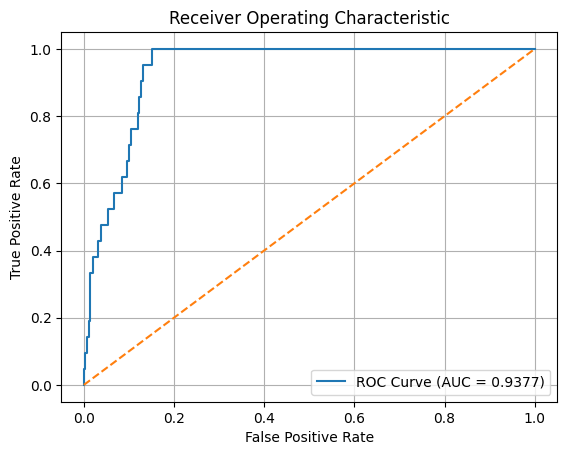

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

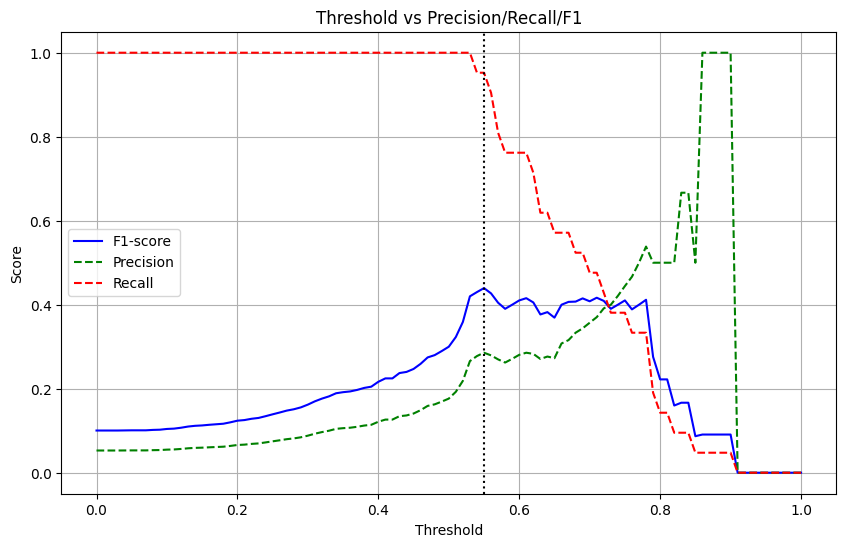

[I 2025-06-11 19:09:58,841] Trial 32 finished with value: 0.9376899696048632 and parameters: {'lstm_hidden_size': 73, 'lstm_num_layers': 2, 'mlp_hidden_1': 243, 'mlp_hidden_2': 32, 'dropout_rate': 0.2576454544311581, 'learning_rate': 0.00010889147507835582, 'weight_decay': 8.850755417428404e-06, 'batch_size': 64, 'epochs': 27}. Best is trial 31 with value: 0.9379432624113475.


Best Threshold: 0.55
Precision: 0.2857, Recall: 0.9524, F1: 0.4396
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 398,056
Trainable parameters: 398,056

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2155, Val Loss: 0.1985
Epoch [2/50], Train Loss

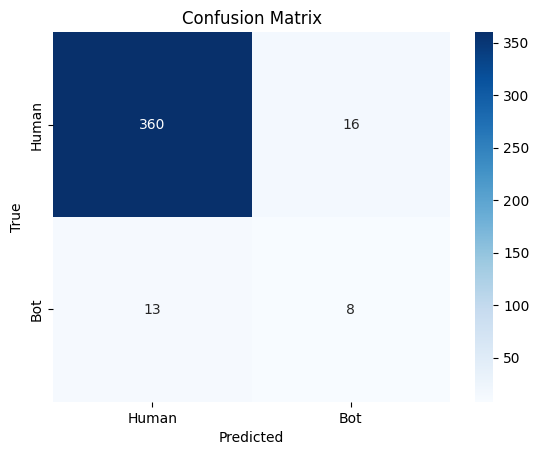


AUC-ROC: 0.9184


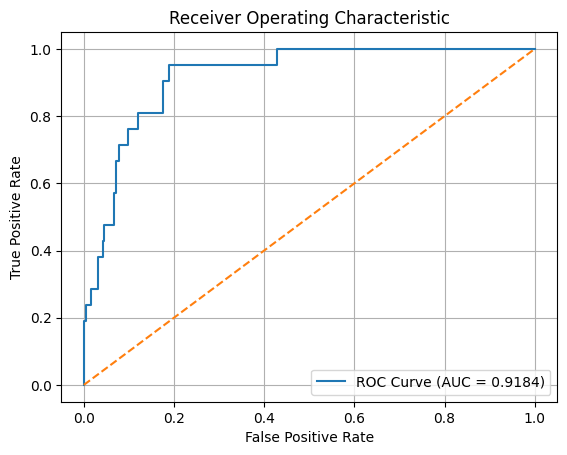

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

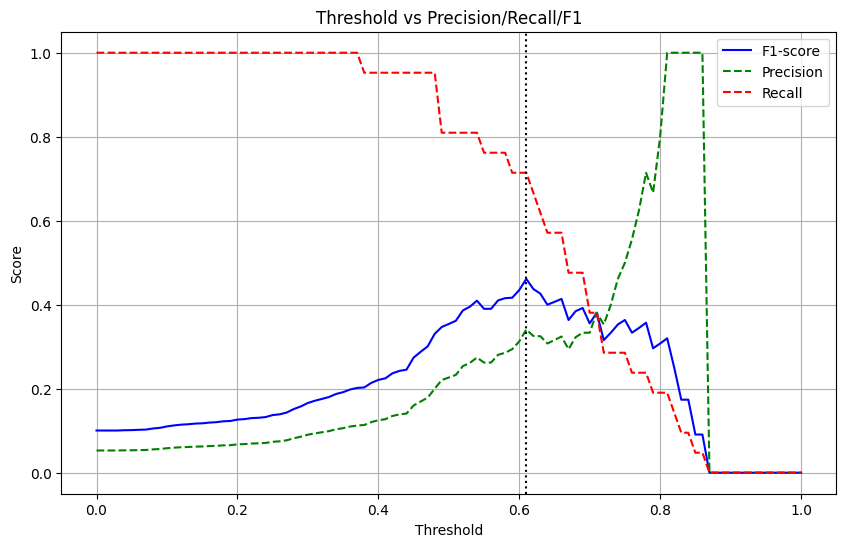

[I 2025-06-11 19:10:09,221] Trial 33 finished with value: 0.9184397163120567 and parameters: {'lstm_hidden_size': 84, 'lstm_num_layers': 2, 'mlp_hidden_1': 249, 'mlp_hidden_2': 33, 'dropout_rate': 0.24455871374673363, 'learning_rate': 0.0001511226935905553, 'weight_decay': 7.21061051352849e-06, 'batch_size': 64, 'epochs': 29}. Best is trial 31 with value: 0.9379432624113475.


Best Threshold: 0.61
Precision: 0.3409, Recall: 0.7143, F1: 0.4615
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 316,044
Trainable parameters: 316,044

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2066, Val Loss: 0.1790
Epoch [2/50], Train Loss

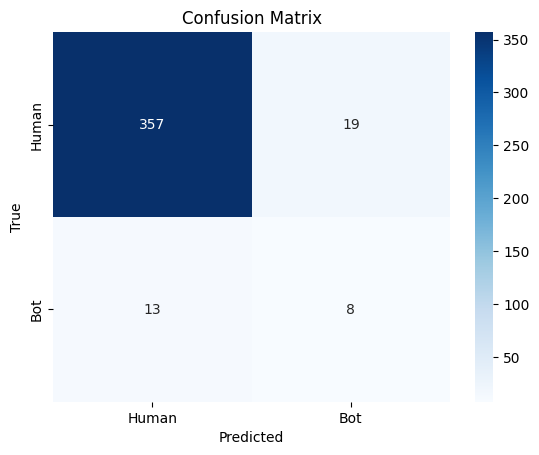


AUC-ROC: 0.8799


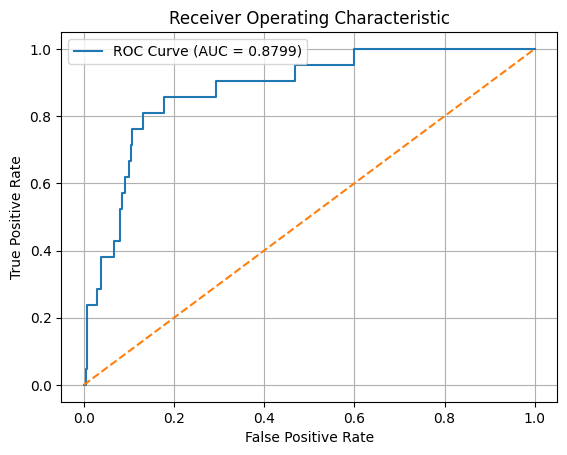

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

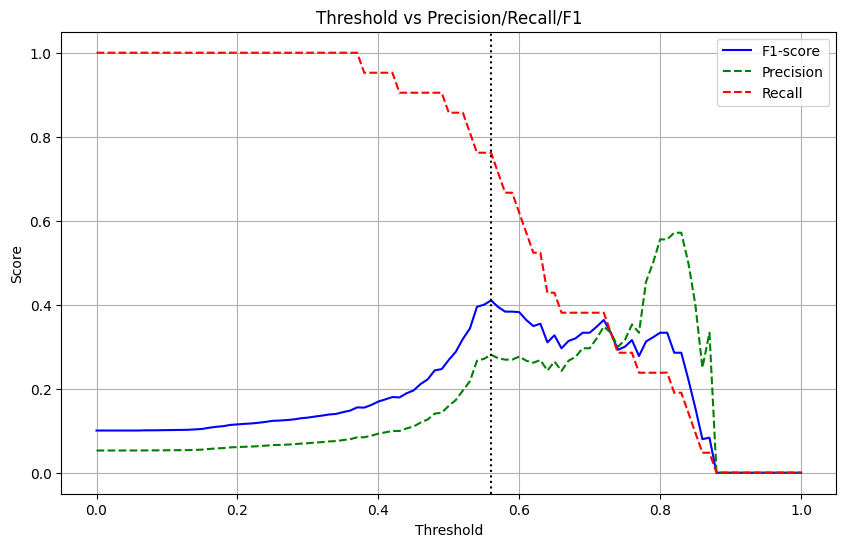

[I 2025-06-11 19:10:19,734] Trial 34 finished with value: 0.8799392097264437 and parameters: {'lstm_hidden_size': 71, 'lstm_num_layers': 2, 'mlp_hidden_1': 352, 'mlp_hidden_2': 46, 'dropout_rate': 0.27199181269399175, 'learning_rate': 0.0002090932193641311, 'weight_decay': 9.83775291109637e-06, 'batch_size': 64, 'epochs': 23}. Best is trial 31 with value: 0.9379432624113475.


Best Threshold: 0.56
Precision: 0.2807, Recall: 0.7619, F1: 0.4103
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 200,700
Trainable parameters: 200,700

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2242, Val Loss: 0.1853
Epoch [2/50], Train Loss

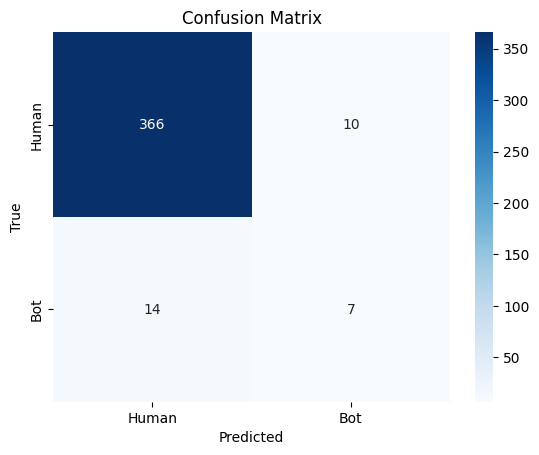


AUC-ROC: 0.9043


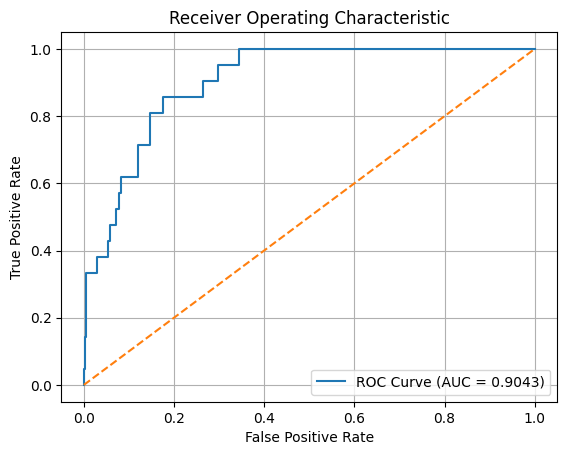

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

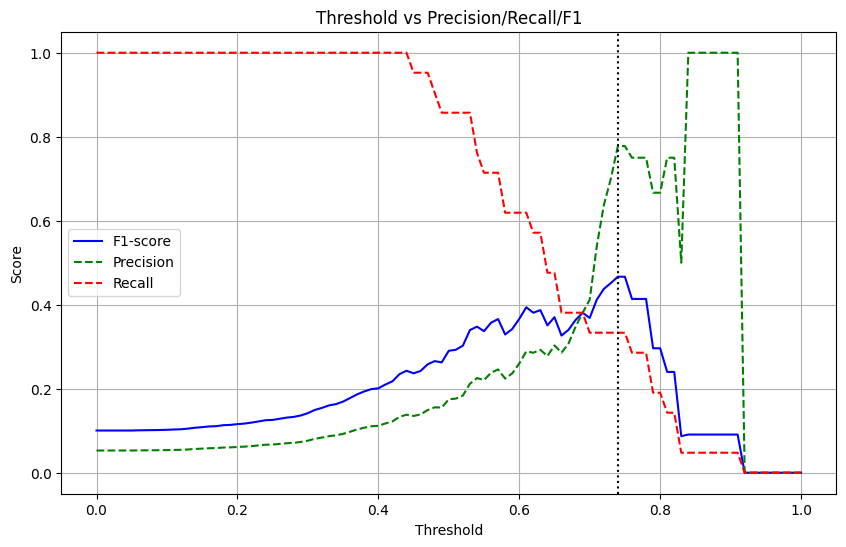

[I 2025-06-11 19:10:27,455] Trial 35 finished with value: 0.9042553191489361 and parameters: {'lstm_hidden_size': 77, 'lstm_num_layers': 1, 'mlp_hidden_1': 229, 'mlp_hidden_2': 33, 'dropout_rate': 0.21159815379215724, 'learning_rate': 0.00013888165845977587, 'weight_decay': 2.490721795469228e-05, 'batch_size': 64, 'epochs': 31}. Best is trial 31 with value: 0.9379432624113475.


Best Threshold: 0.74
Precision: 0.7778, Recall: 0.3333, F1: 0.4667
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 443,134
Trainable parameters: 443,134

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.1907, Val Loss: 0.1558
Epoch [2/50], Train Loss

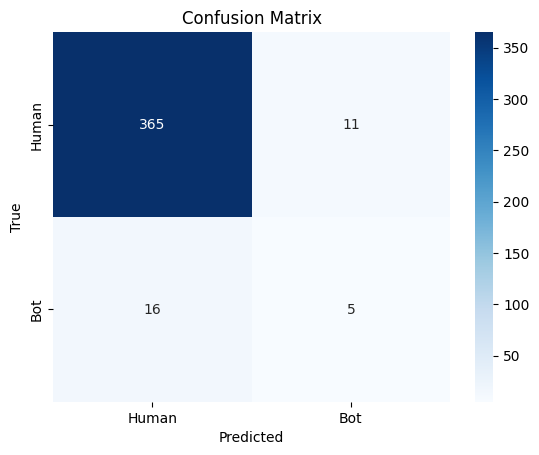


AUC-ROC: 0.8721


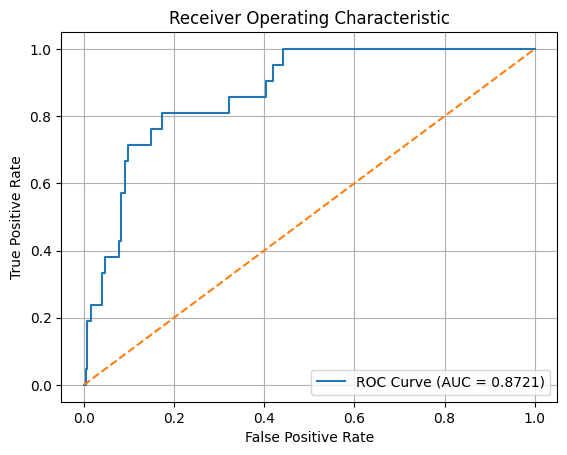

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

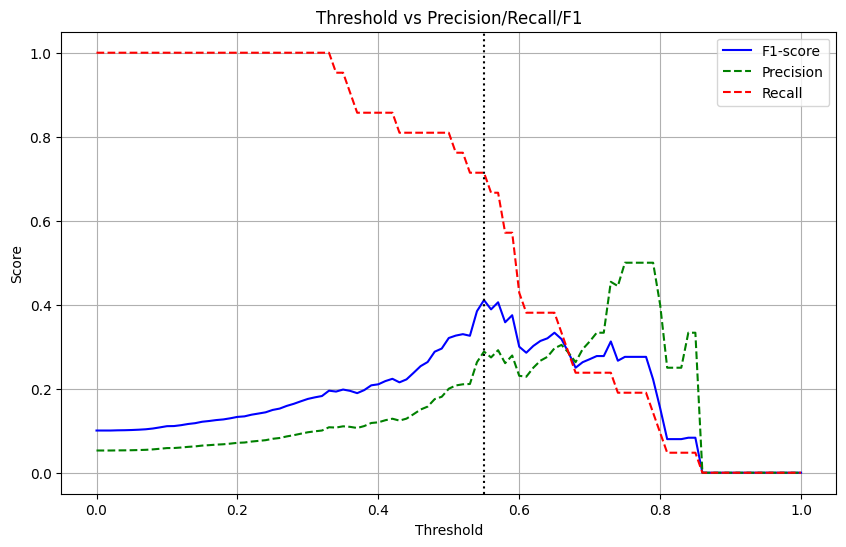

[I 2025-06-11 19:10:34,700] Trial 36 finished with value: 0.8720871327254305 and parameters: {'lstm_hidden_size': 88, 'lstm_num_layers': 2, 'mlp_hidden_1': 340, 'mlp_hidden_2': 44, 'dropout_rate': 0.2184628492586763, 'learning_rate': 0.0002561621187916713, 'weight_decay': 1.1007629648314166e-05, 'batch_size': 64, 'epochs': 29}. Best is trial 31 with value: 0.9379432624113475.


Best Threshold: 0.55
Precision: 0.2885, Recall: 0.7143, F1: 0.4110
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 159,018
Trainable parameters: 159,018

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2878, Val Loss: 0.1883
Epoch [2/50], Train Loss

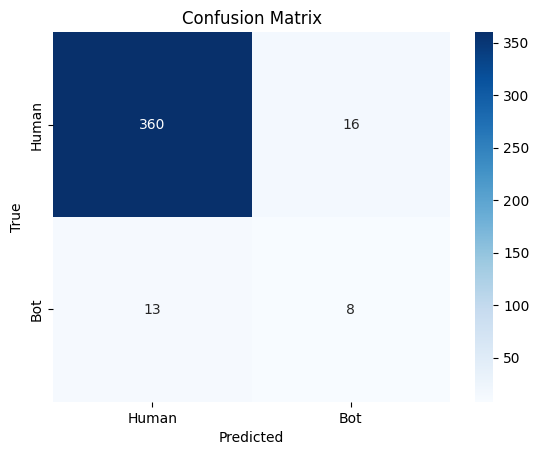


AUC-ROC: 0.9221


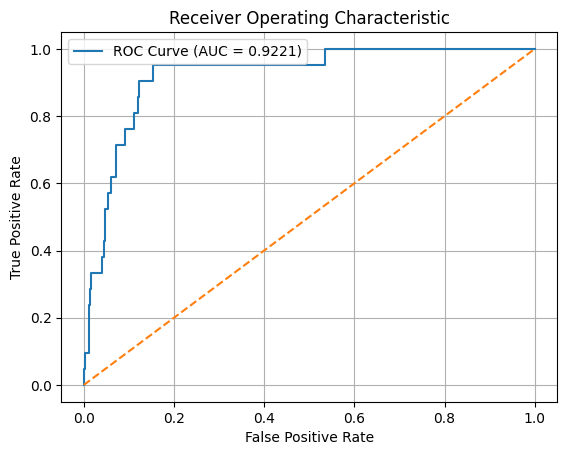

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

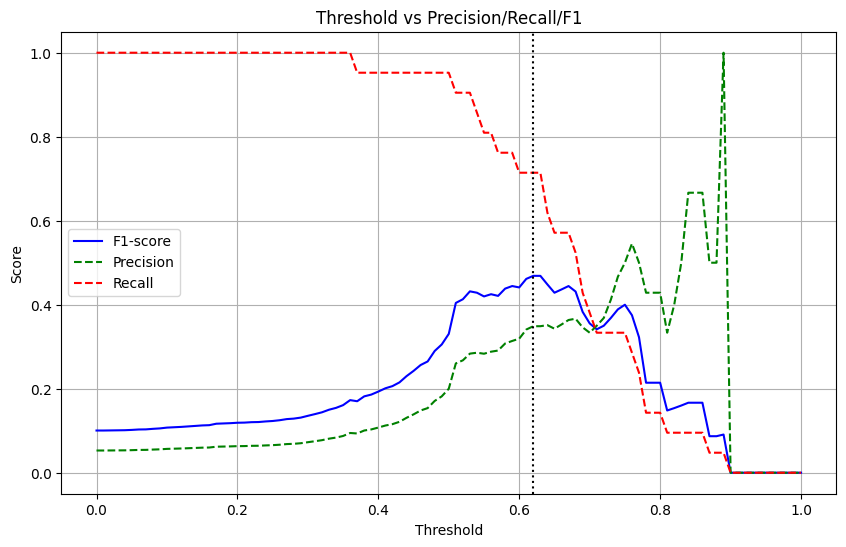

[I 2025-06-11 19:10:46,394] Trial 37 finished with value: 0.922112462006079 and parameters: {'lstm_hidden_size': 65, 'lstm_num_layers': 1, 'mlp_hidden_1': 259, 'mlp_hidden_2': 39, 'dropout_rate': 0.2800056761742004, 'learning_rate': 0.00011056210308506112, 'weight_decay': 3.697234833905071e-06, 'batch_size': 64, 'epochs': 11}. Best is trial 31 with value: 0.9379432624113475.


Best Threshold: 0.62
Precision: 0.3488, Recall: 0.7143, F1: 0.4688
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 242,357
Trainable parameters: 242,357

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2065, Val Loss: 0.1831
Epoch [2/50], Train Loss

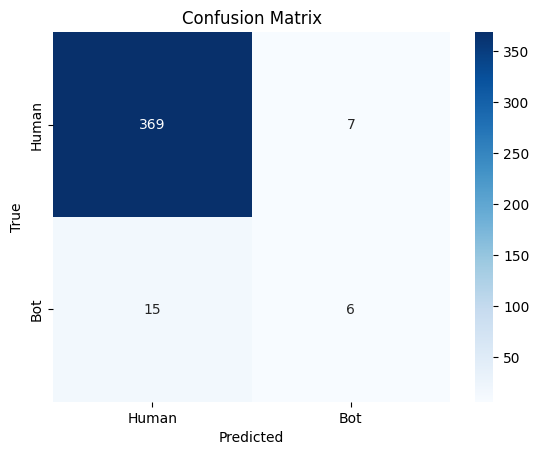


AUC-ROC: 0.8801


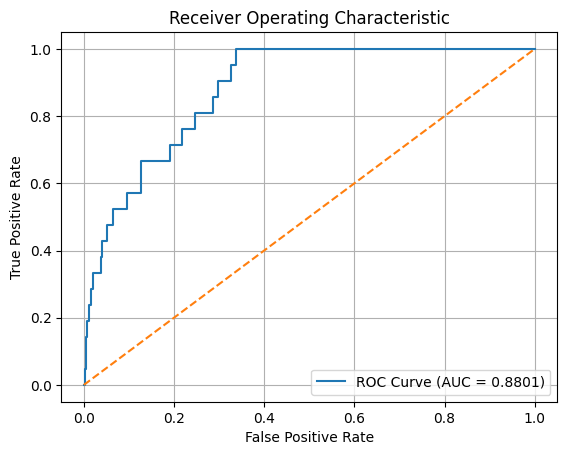

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

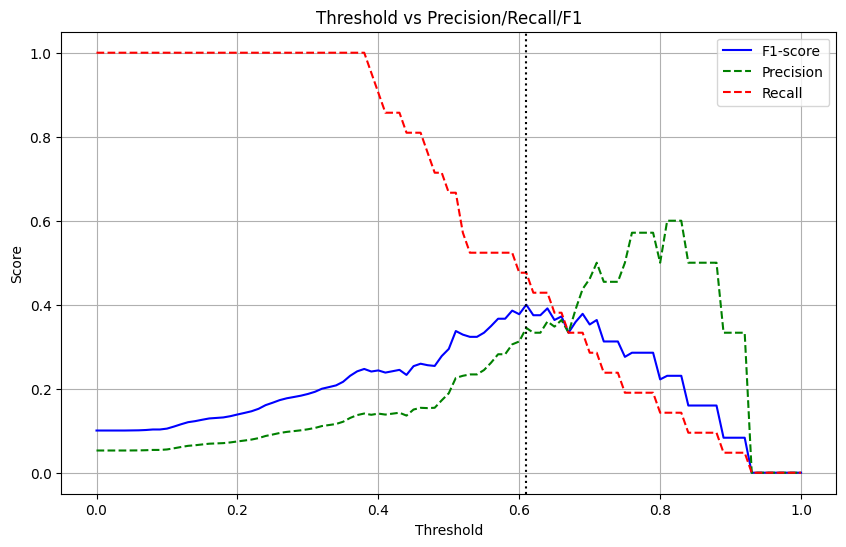

[I 2025-06-11 19:10:58,258] Trial 38 finished with value: 0.8800658561296859 and parameters: {'lstm_hidden_size': 60, 'lstm_num_layers': 2, 'mlp_hidden_1': 396, 'mlp_hidden_2': 53, 'dropout_rate': 0.22337900972656224, 'learning_rate': 0.00016799638541277348, 'weight_decay': 1.9956110457406242e-05, 'batch_size': 32, 'epochs': 23}. Best is trial 31 with value: 0.9379432624113475.


Best Threshold: 0.61
Precision: 0.3448, Recall: 0.4762, F1: 0.4000
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 461,269
Trainable parameters: 461,269

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2256, Val Loss: 0.2032
Epoch [2/50], Train Loss

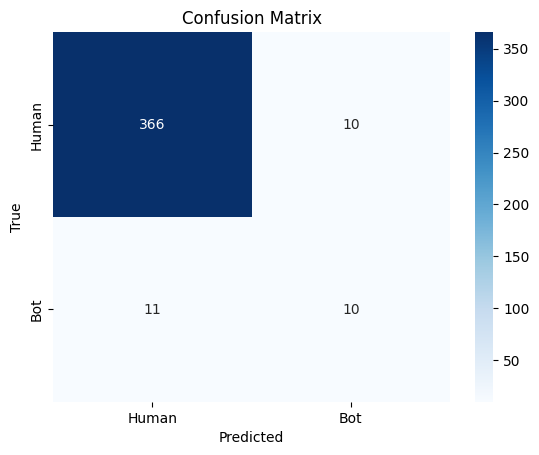


AUC-ROC: 0.9159


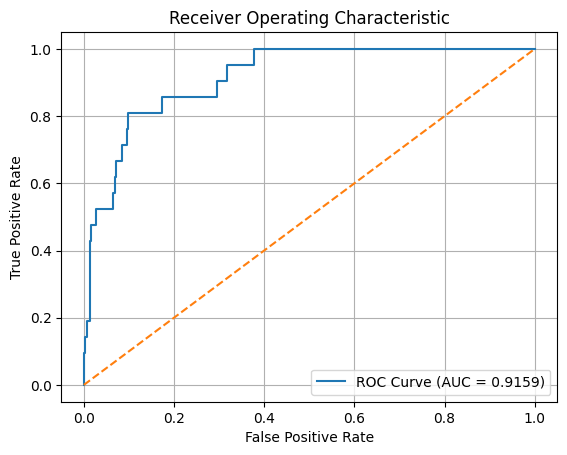

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

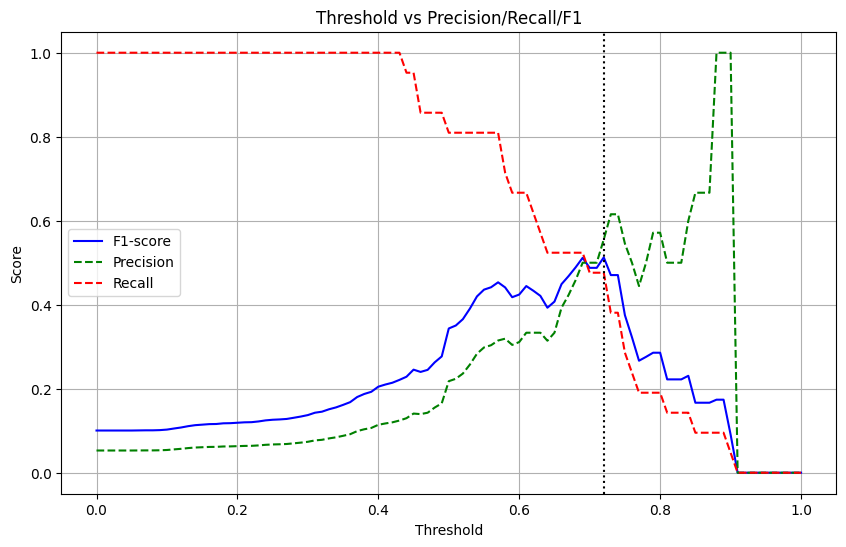

[I 2025-06-11 19:11:10,458] Trial 39 finished with value: 0.9159067882472138 and parameters: {'lstm_hidden_size': 73, 'lstm_num_layers': 3, 'mlp_hidden_1': 304, 'mlp_hidden_2': 49, 'dropout_rate': 0.30127359813521143, 'learning_rate': 0.00012758583901377582, 'weight_decay': 4.0839556698200755e-05, 'batch_size': 64, 'epochs': 20}. Best is trial 31 with value: 0.9379432624113475.


Best Threshold: 0.72
Precision: 0.5556, Recall: 0.4762, F1: 0.5128
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 227,058
Trainable parameters: 227,058

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2223, Val Loss: 0.1632
Epoch [2/50], Train Loss

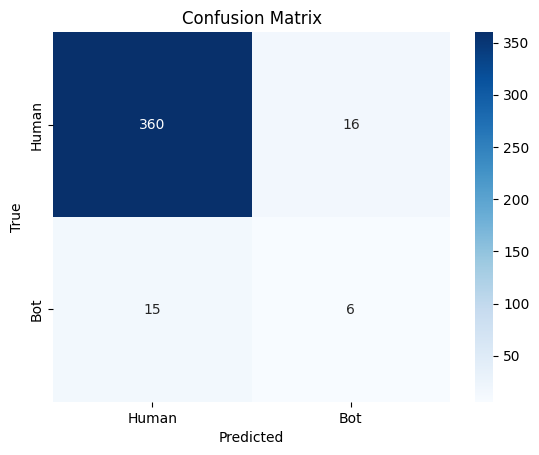


AUC-ROC: 0.8830


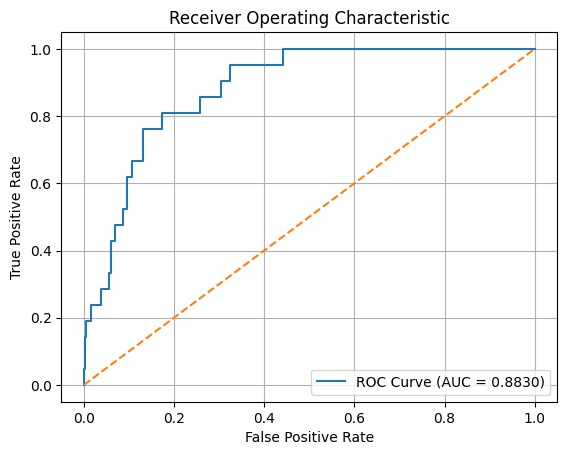

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

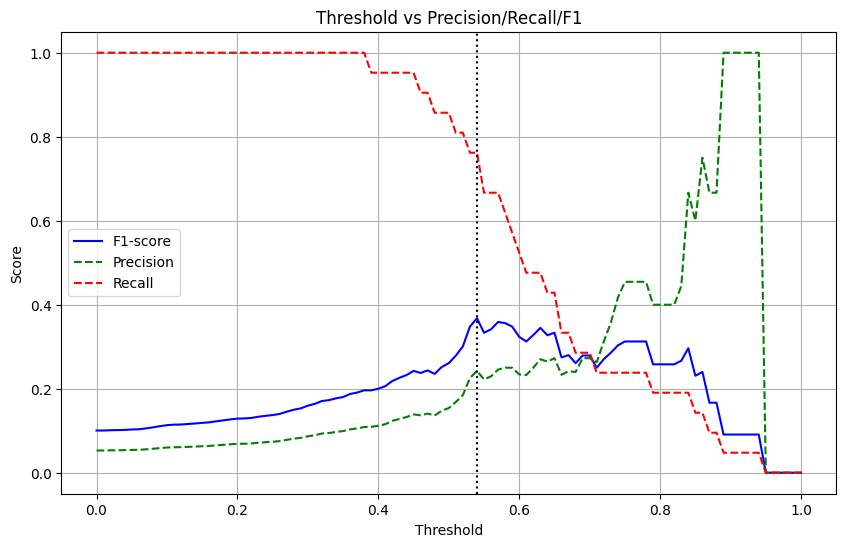

[I 2025-06-11 19:11:22,944] Trial 40 finished with value: 0.8829787234042553 and parameters: {'lstm_hidden_size': 81, 'lstm_num_layers': 1, 'mlp_hidden_1': 223, 'mlp_hidden_2': 61, 'dropout_rate': 0.3300723066526059, 'learning_rate': 0.00019834685472506673, 'weight_decay': 7.118939772014602e-06, 'batch_size': 64, 'epochs': 34}. Best is trial 31 with value: 0.9379432624113475.


Best Threshold: 0.54
Precision: 0.2424, Recall: 0.7619, F1: 0.3678
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 241,876
Trainable parameters: 241,876

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2386, Val Loss: 0.1904
Epoch [2/50], Train Loss

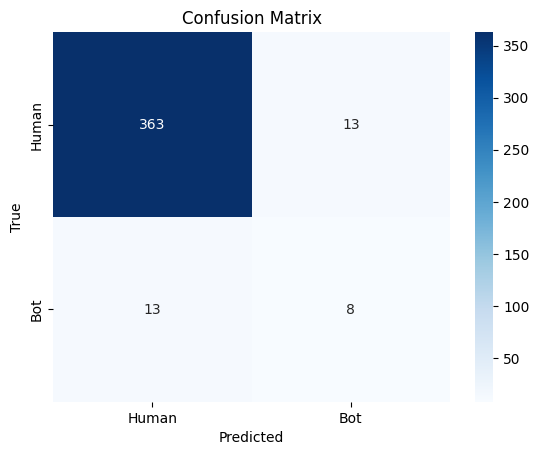


AUC-ROC: 0.9186


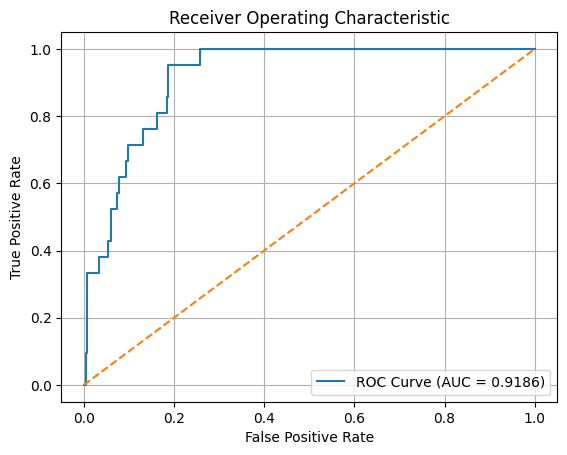

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

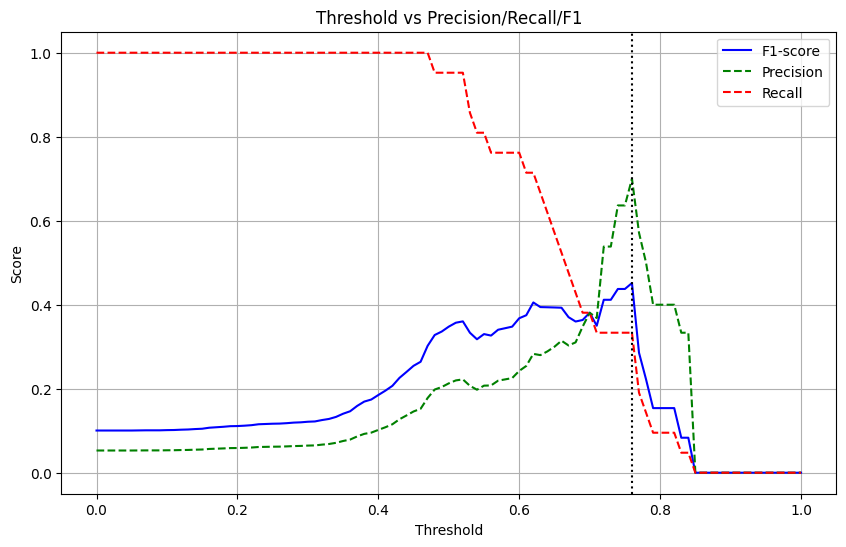

[I 2025-06-11 19:11:29,584] Trial 41 finished with value: 0.9185663627152989 and parameters: {'lstm_hidden_size': 60, 'lstm_num_layers': 2, 'mlp_hidden_1': 512, 'mlp_hidden_2': 38, 'dropout_rate': 0.2584744232282965, 'learning_rate': 0.00010272082363488064, 'weight_decay': 9.03742300052878e-06, 'batch_size': 64, 'epochs': 35}. Best is trial 31 with value: 0.9379432624113475.


Best Threshold: 0.76
Precision: 0.7000, Recall: 0.3333, F1: 0.4516
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 334,446
Trainable parameters: 334,446

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2189, Val Loss: 0.1952
Epoch [2/50], Train Loss

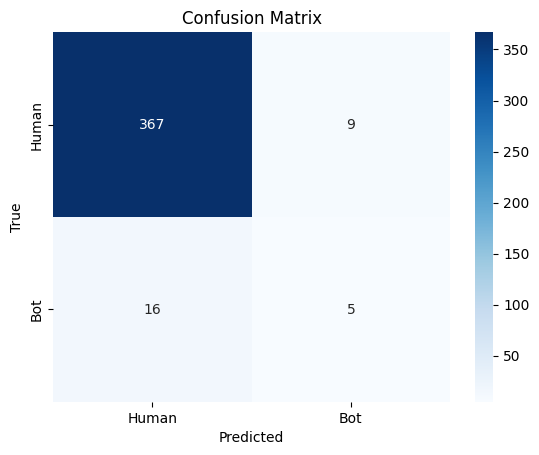


AUC-ROC: 0.9091


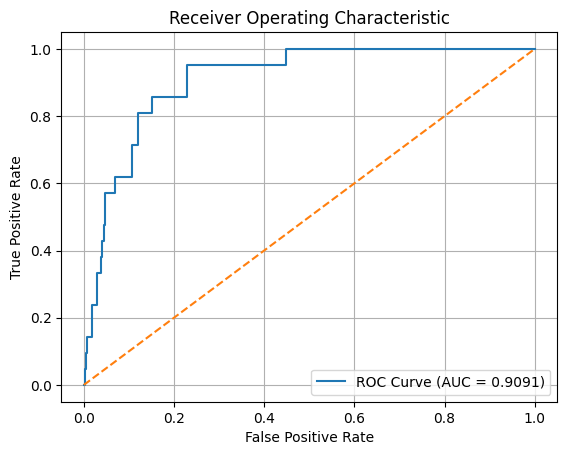

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

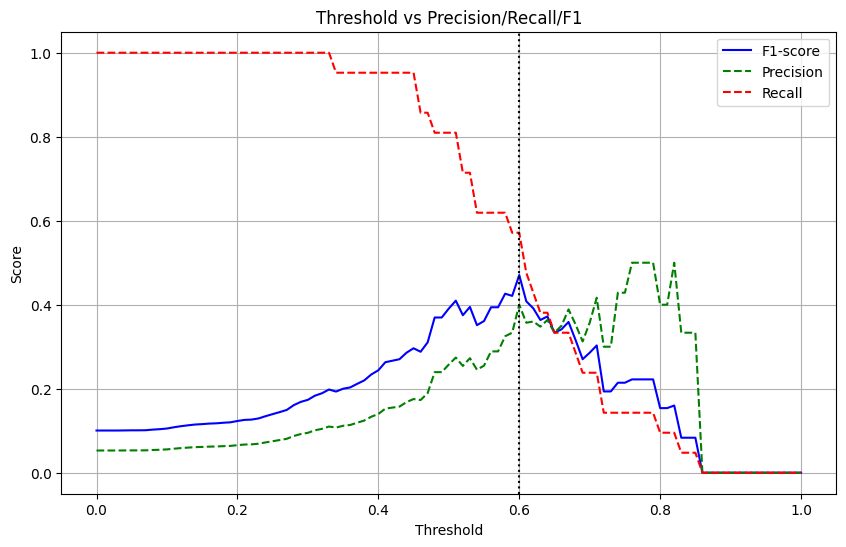

[I 2025-06-11 19:11:40,771] Trial 42 finished with value: 0.9090678824721379 and parameters: {'lstm_hidden_size': 76, 'lstm_num_layers': 2, 'mlp_hidden_1': 270, 'mlp_hidden_2': 32, 'dropout_rate': 0.29023640644280685, 'learning_rate': 0.00012670292194416776, 'weight_decay': 1.3438237650294279e-05, 'batch_size': 64, 'epochs': 31}. Best is trial 31 with value: 0.9379432624113475.


Best Threshold: 0.60
Precision: 0.4000, Recall: 0.5714, F1: 0.4706
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 268,193
Trainable parameters: 268,193

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.1731, Val Loss: 0.1317
Epoch [2/50], Train Loss

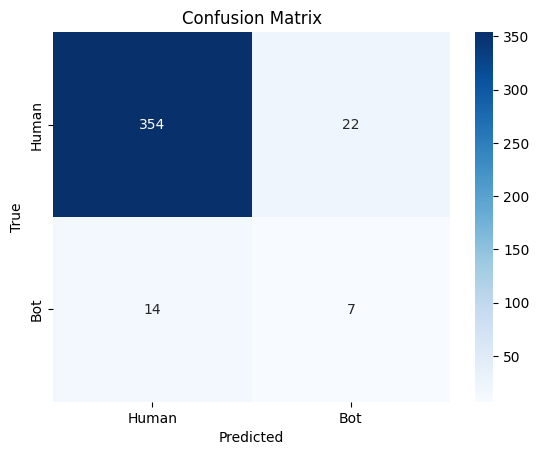


AUC-ROC: 0.8920


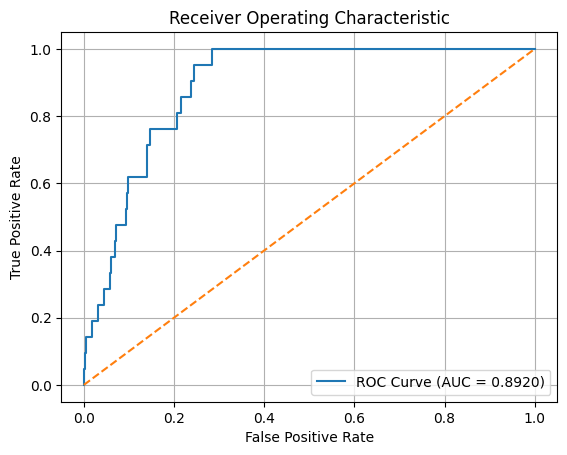

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

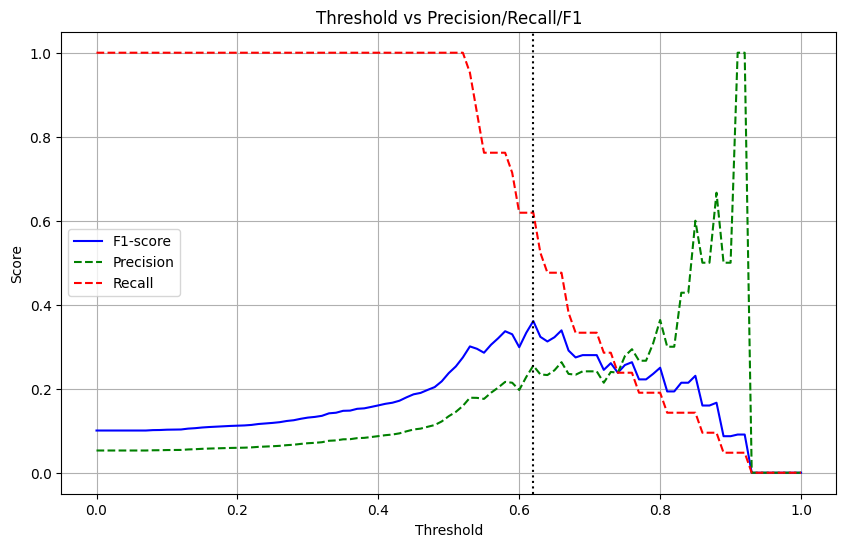

[I 2025-06-11 19:11:48,351] Trial 43 finished with value: 0.8919706180344478 and parameters: {'lstm_hidden_size': 66, 'lstm_num_layers': 2, 'mlp_hidden_1': 194, 'mlp_hidden_2': 63, 'dropout_rate': 0.3095253764043278, 'learning_rate': 0.005230175678335141, 'weight_decay': 4.239317253770421e-06, 'batch_size': 64, 'epochs': 26}. Best is trial 31 with value: 0.9379432624113475.


Best Threshold: 0.62
Precision: 0.2549, Recall: 0.6190, F1: 0.3611
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 205,361
Trainable parameters: 205,361

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2184, Val Loss: 0.1769
Epoch [2/50], Train Loss

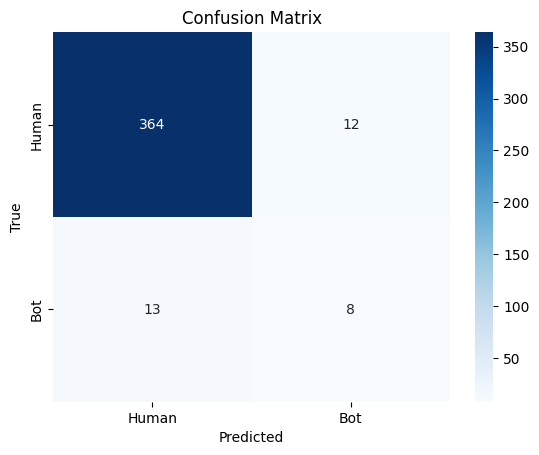


AUC-ROC: 0.8926


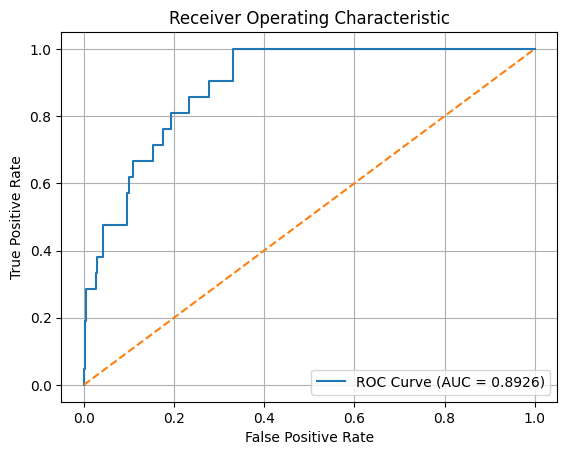

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

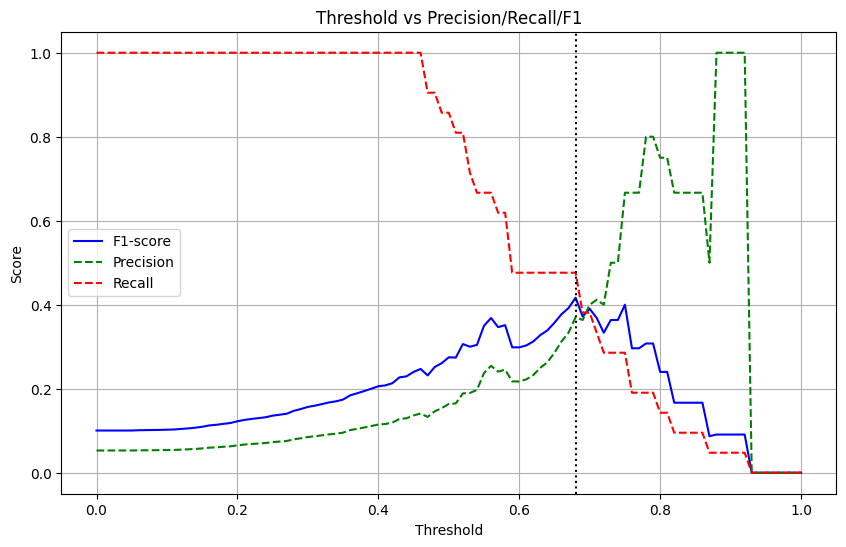

[I 2025-06-11 19:11:56,180] Trial 44 finished with value: 0.8926038500506586 and parameters: {'lstm_hidden_size': 56, 'lstm_num_layers': 2, 'mlp_hidden_1': 320, 'mlp_hidden_2': 37, 'dropout_rate': 0.19792397349769267, 'learning_rate': 0.00015580408455707033, 'weight_decay': 3.100986009816986e-06, 'batch_size': 64, 'epochs': 28}. Best is trial 31 with value: 0.9379432624113475.


Best Threshold: 0.68
Precision: 0.3704, Recall: 0.4762, F1: 0.4167
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 153,955
Trainable parameters: 153,955

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2742, Val Loss: 0.1985
Epoch [2/50], Train Loss

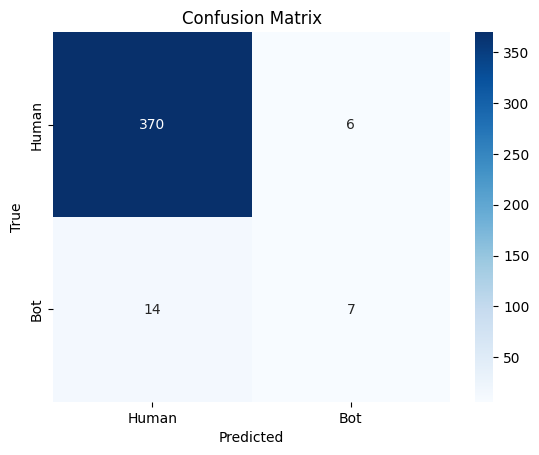


AUC-ROC: 0.9263


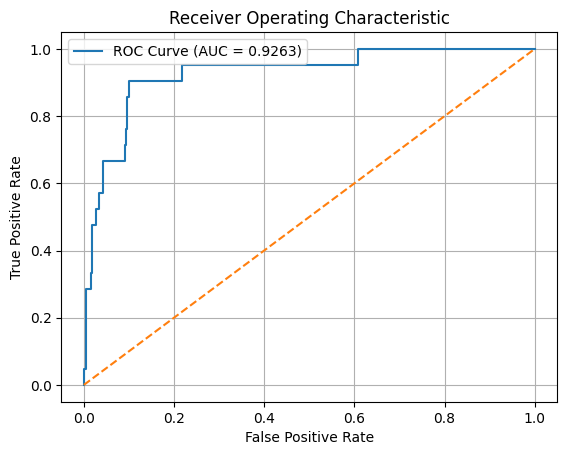

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

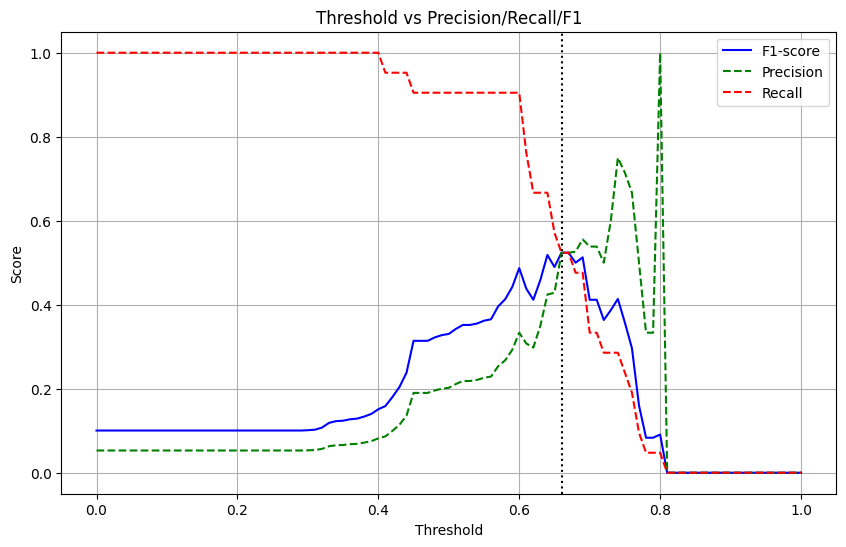

[I 2025-06-11 19:12:08,421] Trial 45 finished with value: 0.9262917933130699 and parameters: {'lstm_hidden_size': 47, 'lstm_num_layers': 2, 'mlp_hidden_1': 150, 'mlp_hidden_2': 45, 'dropout_rate': 0.46162903909821085, 'learning_rate': 0.000110974942795711, 'weight_decay': 5.849164031653031e-06, 'batch_size': 32, 'epochs': 20}. Best is trial 31 with value: 0.9379432624113475.


Best Threshold: 0.66
Precision: 0.5238, Recall: 0.5238, F1: 0.5238
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 149,551
Trainable parameters: 149,551

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.1870, Val Loss: 0.2567
Epoch [2/50], Train Loss

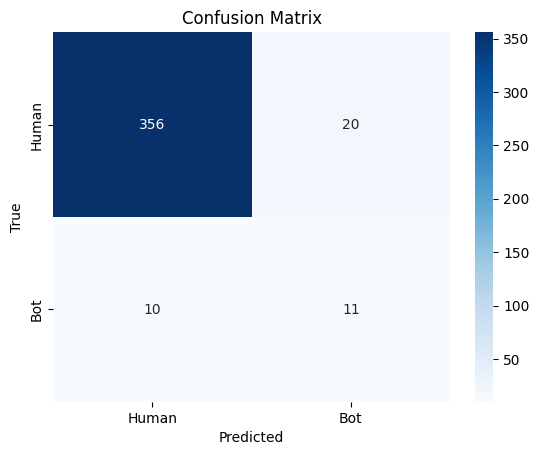


AUC-ROC: 0.9203


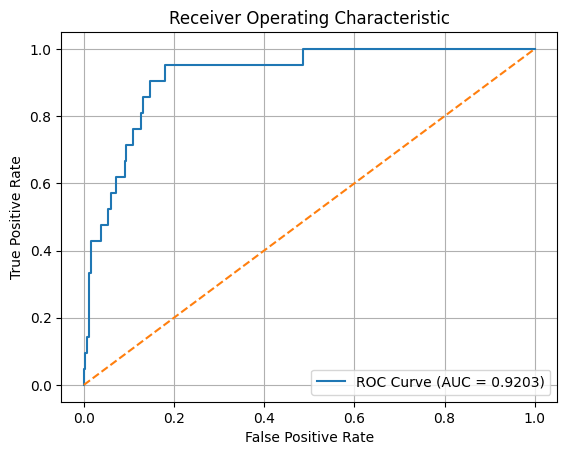

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

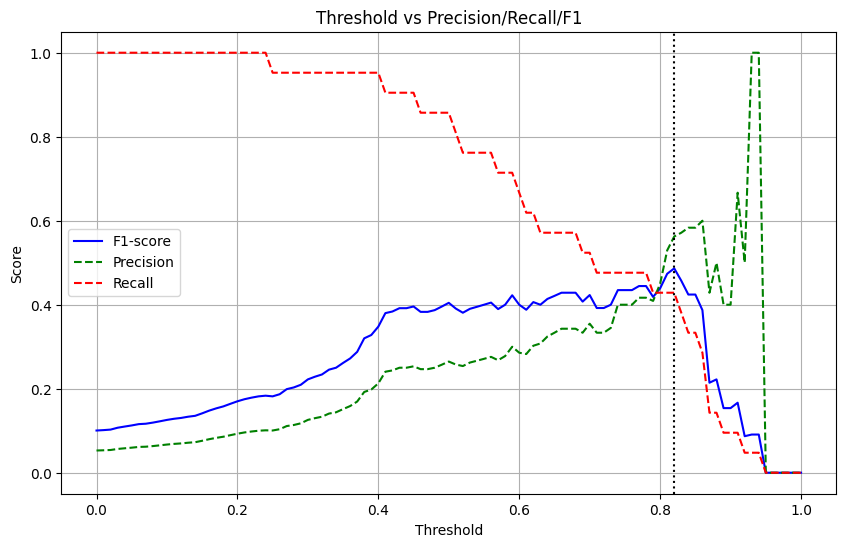

[I 2025-06-11 19:12:17,198] Trial 46 finished with value: 0.9203394123606888 and parameters: {'lstm_hidden_size': 45, 'lstm_num_layers': 2, 'mlp_hidden_1': 236, 'mlp_hidden_2': 43, 'dropout_rate': 0.46175830094942844, 'learning_rate': 0.0023980327846113312, 'weight_decay': 5.421552165561729e-06, 'batch_size': 32, 'epochs': 15}. Best is trial 31 with value: 0.9379432624113475.


Best Threshold: 0.82
Precision: 0.5625, Recall: 0.4286, F1: 0.4865
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 118,940
Trainable parameters: 118,940

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.2601, Val Loss: 0.2034
Epoch [2/50], Train Loss

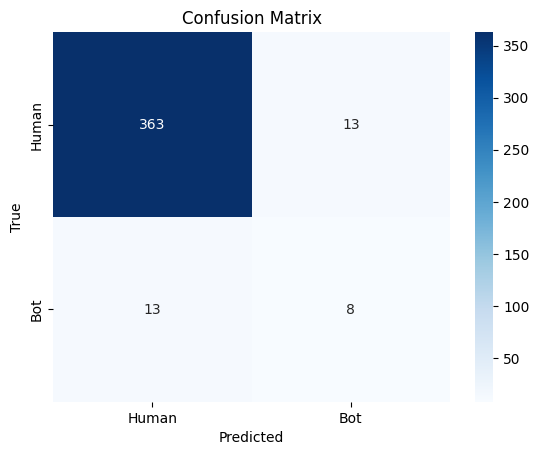


AUC-ROC: 0.9368


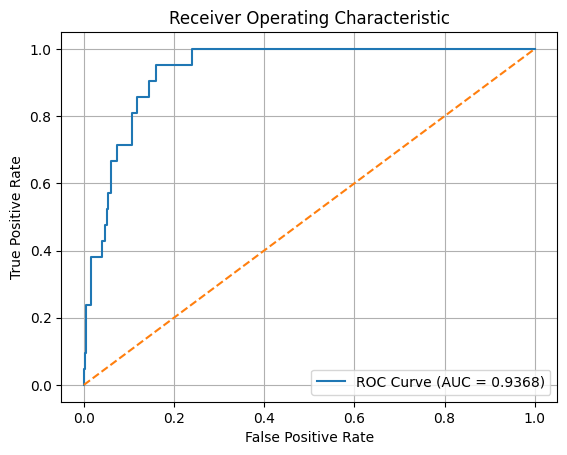

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

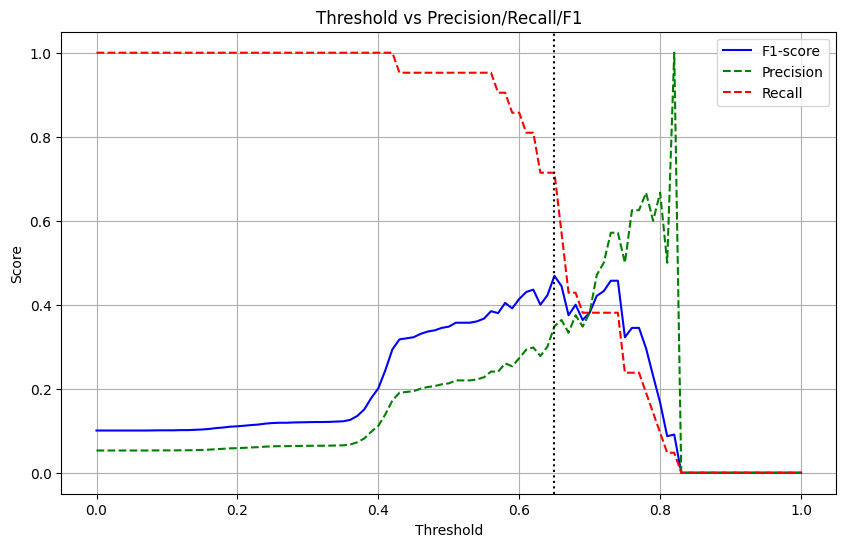

[I 2025-06-11 19:12:29,022] Trial 47 finished with value: 0.9368034447821683 and parameters: {'lstm_hidden_size': 39, 'lstm_num_layers': 2, 'mlp_hidden_1': 155, 'mlp_hidden_2': 50, 'dropout_rate': 0.46854717109625105, 'learning_rate': 0.00016759703065001333, 'weight_decay': 1.694039932761541e-05, 'batch_size': 32, 'epochs': 17}. Best is trial 31 with value: 0.9379432624113475.


Best Threshold: 0.65
Precision: 0.3488, Recall: 0.7143, F1: 0.4688
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 114,158
Trainable parameters: 114,158

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.1964, Val Loss: 0.1661
Epoch [2/50], Train Loss

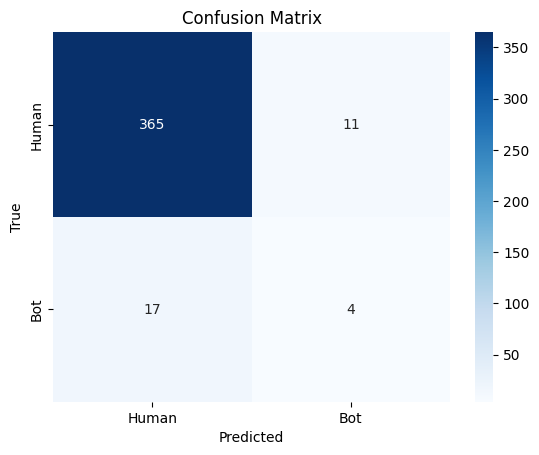


AUC-ROC: 0.8423


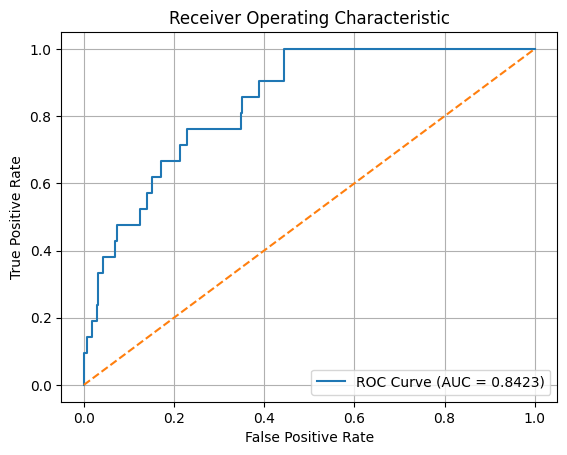

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

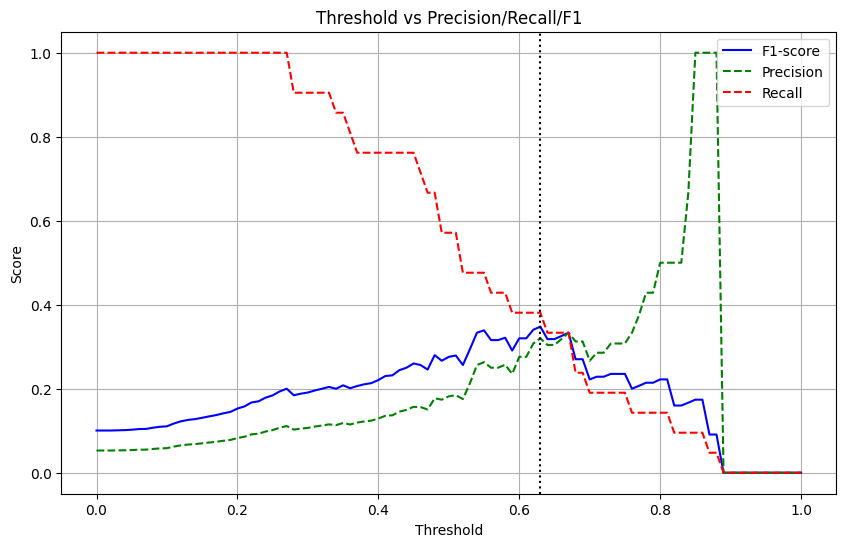

[I 2025-06-11 19:12:39,225] Trial 48 finished with value: 0.8423252279635258 and parameters: {'lstm_hidden_size': 38, 'lstm_num_layers': 2, 'mlp_hidden_1': 192, 'mlp_hidden_2': 52, 'dropout_rate': 0.1757276780873956, 'learning_rate': 0.0002336771111397024, 'weight_decay': 1.6990180369275266e-05, 'batch_size': 32, 'epochs': 12}. Best is trial 31 with value: 0.9379432624113475.


Best Threshold: 0.63
Precision: 0.3200, Recall: 0.3810, F1: 0.3478
=== Bot Detection Pipeline with Imbalance Handling ===
LSTM data shape: (3068523, 12)
MLP features shape: (1983, 25)

1. Preparing LSTM sequences...

2. Preparing MLP features...

3. Aligning datasets...
LSTM dataset has 1983 bidders
MLP dataset has 1983 bidders
Common bidders: 1983
Final aligned dataset size: 1983
Original class distribution: [1880  103]

5. Splitting data...

4. Normalizing features...

6. Applying smote oversampling to training data...
X_seq_train dtype: float64
X_feat_train dtype: float64
y_train dtype: float64
Train size: 2404 (after oversampling)
Validation size: 318
Test size: 397
Train class distribution: [1202 1202]
Validation class distribution: [302  16]
Test class distribution: [376  21]

7. Initializing model...
Total parameters: 252,433
Trainable parameters: 252,433

8. Training model...

Using FocalLoss with alpha
Epoch [1/50], Train Loss: 0.1965, Val Loss: 0.1613
Epoch [2/50], Train Loss

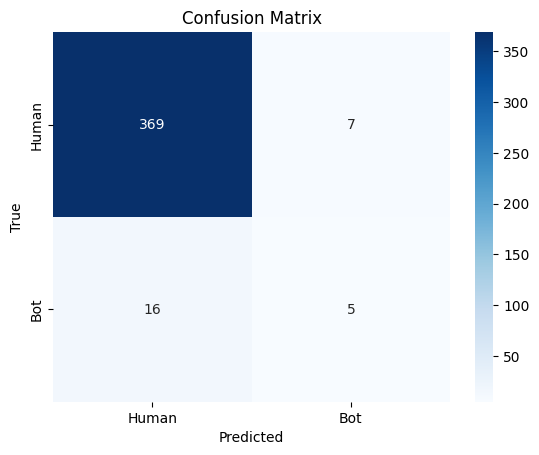


AUC-ROC: 0.8498


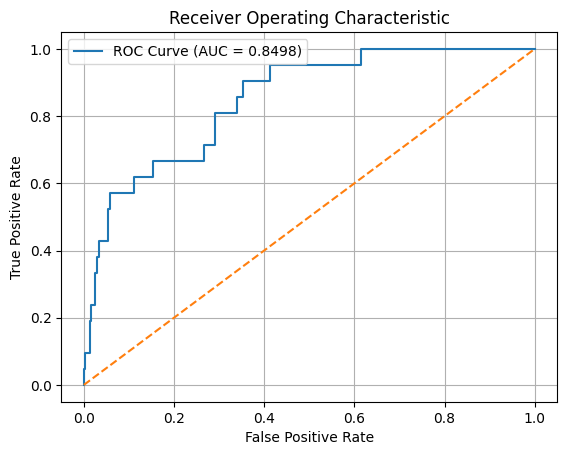

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

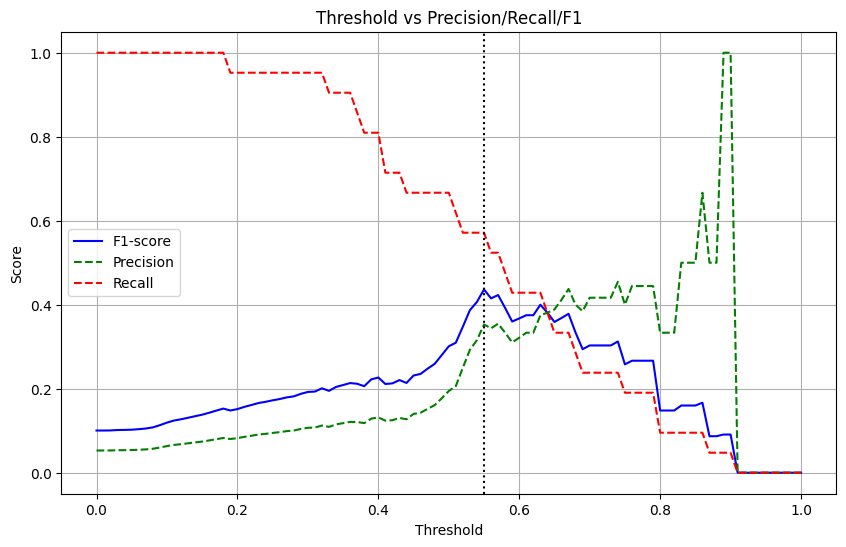

[I 2025-06-11 19:12:50,711] Trial 49 finished with value: 0.8497973657548126 and parameters: {'lstm_hidden_size': 63, 'lstm_num_layers': 2, 'mlp_hidden_1': 288, 'mlp_hidden_2': 37, 'dropout_rate': 0.26765327722263216, 'learning_rate': 0.00037742943535345, 'weight_decay': 3.896413165168492e-05, 'batch_size': 32, 'epochs': 18}. Best is trial 31 with value: 0.9379432624113475.


Best Threshold: 0.55
Precision: 0.3529, Recall: 0.5714, F1: 0.4364

Optimization completed!
Best model saved!
Model: /content/drive/My Drive/Colab Notebooks/DL Data/best_models/best_model_20250611_191250.pth
Scaler: /content/drive/My Drive/Colab Notebooks/DL Data/best_models/best_scaler_20250611_191250.pkl
Results: /content/drive/My Drive/Colab Notebooks/DL Data/best_models/best_results_20250611_191250.pkl
Best AUC: 0.9379
Best parameters: {'lstm_hidden_size': 74, 'lstm_num_layers': 2, 'dropout_rate': 0.27259033735139954, 'mlp_hidden_1': 256, 'mlp_hidden_2': 34, 'learning_rate': 0.00010497475973935918, 'batch_size': 64, 'epochs': 30}


In [ ]:
study, best_info = run_optimization(n_trials=50)

In [ ]:
result_path = '/content/drive/My Drive/Colab Notebooks/DL Data/best_models/best_results_hybrid.pkl'

with open(result_path, 'rb') as f:
    result = pickle.load(f)

print(type(result))

if isinstance(result, dict):
    print("Keys:", result.keys())


<class 'dict'>
Keys: dict_keys(['auc_score', 'params', 'test_predictions', 'test_labels', 'test_probabilities', 'train_losses', 'val_losses'])


In [ ]:
y_true = result['test_labels']
y_probs = result['test_probabilities']
y_pred =  (np.array(y_probs) >= 0.67).astype(int)

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       376
           1       0.48      0.48      0.48        21

    accuracy                           0.94       397
   macro avg       0.72      0.72      0.72       397
weighted avg       0.94      0.94      0.94       397



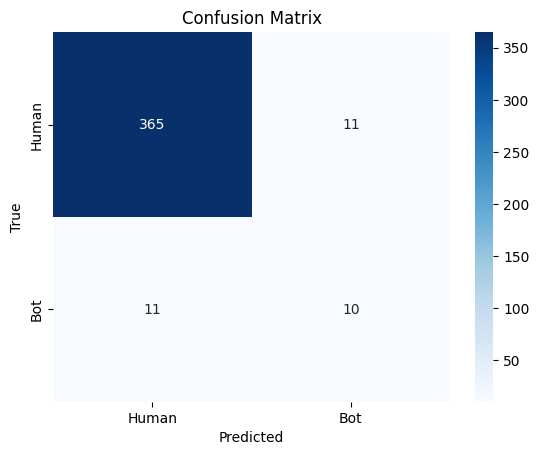

In [ ]:
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'Bot'], yticklabels=['Human', 'Bot'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


AUC-ROC: 0.9379


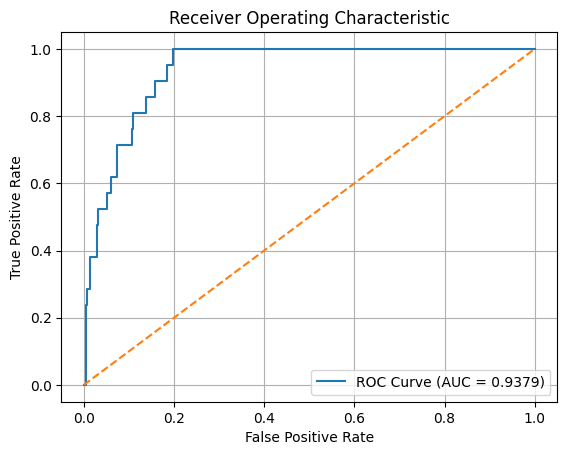

In [ ]:
fpr, tpr, thresholds = roc_curve(y_true, y_probs)
auc_score = roc_auc_score(y_true, y_probs)

print(f"\nAUC-ROC: {auc_score:.4f}")
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.grid(True)
plt.show()

AUC Score: 0.9379432624113475
Best Hyperparameters: {'lstm_hidden_size': 74, 'lstm_num_layers': 2, 'dropout_rate': 0.27259033735139954, 'mlp_hidden_1': 256, 'mlp_hidden_2': 34, 'learning_rate': 0.00010497475973935918, 'batch_size': 64, 'epochs': 30}


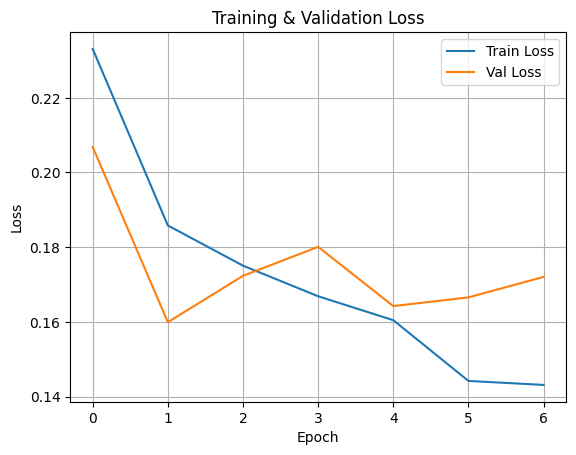

In [ ]:
print("AUC Score:", result['auc_score'])
print("Best Hyperparameters:", result['params'])

plt.plot(result['train_losses'], label='Train Loss')
plt.plot(result['val_losses'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.grid()
plt.show()


# Final Prediction

In [ ]:
model_path = '/content/drive/My Drive/Colab Notebooks/DL Data/best_models/best_model_hybrid.pth'
scaler_path = '/content/drive/My Drive/Colab Notebooks/DL Data/best_models/best_scaler_hybrid.pkl'

seq_input_dim = 10
stat_input_dim = 23

hybrid_model, scaler, best_auc, best_params = load_best_model(model_path, scaler_path, HybridMLP_LSTM, seq_input_dim, stat_input_dim)


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/DL Data/lstm_features_test.csv'
lstm_data_test = pd.read_csv(file_path)

file_path = '/content/drive/My Drive/Colab Notebooks/DL Data/mlp_features_test.csv'
features_mlp_test = pd.read_csv(file_path)

In [ ]:
lstm_seq, lstm_ids, lstm_labels = prepare_lstm_sequences(lstm_data_test, max_sequence_length=100, is_test=True)
mlp_feat, mlp_ids, mlp_labels = prepare_mlp_features(features_mlp_test, is_test=True)

In [ ]:
seq_aligned, stat_aligned, labels_aligned, bidder_ids  = align_datasets(
    lstm_seq, lstm_ids, lstm_labels,
    mlp_feat, mlp_ids, mlp_labels
)

stat_scaled = scaler.transform(stat_aligned)

Found 4700 common bidders between LSTM and MLP datasets.


In [ ]:
test_dataset = AuctionDataset(seq_aligned, stat_scaled, labels_aligned)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
# Predict
print("Generating predictions...")
hybrid_model.eval()
probabilities = []
with torch.no_grad():
    for seq_input, stat_input in test_loader:
        output = hybrid_model(seq_input, stat_input)
        probs = torch.softmax(output, dim=1)[:, 1]
        probabilities.extend(probs.cpu().numpy())

# Output DataFrame
result_df = pd.DataFrame({
    "bidder_id": bidder_ids,
    "prediction": probabilities
})

Generating predictions...


In [ ]:
result_df.to_csv("bot_predictions.csv", index=False)
result_df.head()

bidder_id  prediction
0  002d229ffb247009810828f648afc2ef593rb    0.425314
1  003180b29c6a5f8f1d84a6b7b6f7be57tjj1o    0.124922
2  00486a11dff552c4bd7696265724ff81yeo9v    0.259125
3  0051aef3fdeacdadba664b9b3b07e04e4coc6    0.466266
4  0053b78cde37c4384a20d2da9aa4272aym4pb    0.576862